In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'online-donation:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1881563%2F3074913%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240224%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240224T091544Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D00739c5627e315fdaae59c63ac0dc94631f2722b6e87ef788693ceda20b69b2ac313d981657c573d2f0398190dc94e8b5883084a297108f184b685f1e557aa91c7a43fd9455d47dda352b5041fdee6df856124cb7bf2cb83bca8a015a5bedb4d24d06c25b292ccd52ea5e2eaac82cfa2f94aebd34076783a5917d0cf0b9ff1b9cd9b7dacf6e55f61507a259796bfbb722461dc5a79218f02fc047fa34bcbd8c11bc4a68f2591999b56d387aa77ec877d855a86f241d0d5d82f7a8cb73d32ef221d60d24e2ee3a8d2a6dd28769f51e3ea8e693a58e54528b49358da52d8cddb0ea60e7f4ef1b1ca361092539dc8e19159f59f5e560f836c1a940d7de9f5ca711c'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1396815 bytes downloaded
Downloaded and uncompressed: online-donation
Data source import complete.


In [ ]:
!pip install prophet

In [ ]:

import prophet
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt

plt.style.use('fivethirtyeight')

# READ CSV

In [ ]:
#Gabungin CSV - Pakai Glob
path = r'../input/online-donation/Online Donation/Guest/Donasi/'
all_files_guest_donasi = glob.glob(path + "/*guest.csv")
print(all_files_guest_donasi)
print(len(all_files_guest_donasi))

['../input/online-donation/Online Donation/Guest/Donasi/Agustus-donasi-guest.csv', '../input/online-donation/Online Donation/Guest/Donasi/Maret-donasi-guest.csv', '../input/online-donation/Online Donation/Guest/Donasi/Mei-donasi-guest.csv', '../input/online-donation/Online Donation/Guest/Donasi/Oktober-donasi-guest.csv', '../input/online-donation/Online Donation/Guest/Donasi/Desember-donasi-guest.csv', '../input/online-donation/Online Donation/Guest/Donasi/April-donasi-guest.csv', '../input/online-donation/Online Donation/Guest/Donasi/Juli-donasi-guest.csv', '../input/online-donation/Online Donation/Guest/Donasi/Januari-donasi-guest.csv', '../input/online-donation/Online Donation/Guest/Donasi/Februari-donasi-guest.csv', '../input/online-donation/Online Donation/Guest/Donasi/November-donasi-guest.csv', '../input/online-donation/Online Donation/Guest/Donasi/Juni-donasi-guest.csv', '../input/online-donation/Online Donation/Guest/Donasi/September-donasi-guest.csv']
12


In [ ]:
#Gabungin CSV - Pakai Glob
path = r'../input/online-donation/Online Donation/Users/Donasi/'
all_files_users_donasi = glob.glob(path + "/*users.csv")
print(all_files_users_donasi)
print(len(all_files_users_donasi))

['../input/online-donation/Online Donation/Users/Donasi/Mei-donasi-users.csv', '../input/online-donation/Online Donation/Users/Donasi/Januari-donasi-users.csv', '../input/online-donation/Online Donation/Users/Donasi/September-donasi-users.csv', '../input/online-donation/Online Donation/Users/Donasi/Juli-donasi-users.csv', '../input/online-donation/Online Donation/Users/Donasi/Agustus-donasi-users.csv', '../input/online-donation/Online Donation/Users/Donasi/Maret-donasi-users.csv', '../input/online-donation/Online Donation/Users/Donasi/Oktober-donasi-users.csv', '../input/online-donation/Online Donation/Users/Donasi/November-donasi-users.csv', '../input/online-donation/Online Donation/Users/Donasi/Juni-donasi-users.csv', '../input/online-donation/Online Donation/Users/Donasi/Desember-donasi-users.csv', '../input/online-donation/Online Donation/Users/Donasi/April-donasi-users.csv', '../input/online-donation/Online Donation/Users/Donasi/Februari-donasi-users.csv']
12


In [ ]:
#Gabungin CSV - Pakai Glob
path = r'../input/online-donation/Online Donation/Users/Zakat/'
all_files_users_zakat = glob.glob(path + "/*users.csv")
print(all_files_users_zakat)
print(len(all_files_users_zakat))

['../input/online-donation/Online Donation/Users/Zakat/Februari-zakat-users.csv', '../input/online-donation/Online Donation/Users/Zakat/November-zakat-users.csv', '../input/online-donation/Online Donation/Users/Zakat/April-zakat-users.csv', '../input/online-donation/Online Donation/Users/Zakat/September-zakat-users.csv', '../input/online-donation/Online Donation/Users/Zakat/Juni-zakat-users.csv', '../input/online-donation/Online Donation/Users/Zakat/Agustus-zakat-users.csv', '../input/online-donation/Online Donation/Users/Zakat/Januari-zakat-users.csv', '../input/online-donation/Online Donation/Users/Zakat/Juli-zakat-users.csv', '../input/online-donation/Online Donation/Users/Zakat/Oktober-zakat-users.csv', '../input/online-donation/Online Donation/Users/Zakat/Mei-zakat-users.csv', '../input/online-donation/Online Donation/Users/Zakat/Desember-zakat-users.csv', '../input/online-donation/Online Donation/Users/Zakat/Maret-zakat-users.csv']
12


In [ ]:
df_guest_zakat = pd.read_csv('../input/online-donation/Online Donation/Guest/Zakat/Januari-sampai-desember-zakat-guest.csv')
df_guest_zakat

ID                nama_lengkap platform           category  \
0    2702  Muhammad Ramadhan Alkausar      Web  Zakat Penghasilan   
1    2704         Muhamad Haris Yahya      PWA  Zakat Penghasilan   
2    2710       Karunia Erldi Abraham      Web  Zakat Penghasilan   
3    2718                Irma Suryati      PWA  Zakat Penghasilan   
4    2739     Arriman Maulana Makmoen      Web  Zakat Penghasilan   
..    ...                         ...      ...                ...   
333  4019           Fraskatia Syahrin   CFD v2  Zakat Penghasilan   
334  4028       Dinar Swastika Ardias   CFD v2  Zakat Penghasilan   
335  4029                 Hamba Allah   CFD v2  Zakat Penghasilan   
336  4030                 Hamba Allah   CFD v2  Zakat Penghasilan   
337  4033                       ninis   CFD v2  Zakat Penghasilan   

                 tanggal  total_zakat      status metode_pembayaran  
0    2021-01-05 08:41:38     150000.0  settlement             gopay  
1    2021-01-06 06:22:17     100000.0  settlement     bank_transfer  
2    2021-01-07 12:24:06    1070000.0  settlement     bank_transfer  
3    2021-01-09 09:14:30    1000000.0  settlement          echannel  
4    2021-01-18 23:07:35    5000000.0  settlement     bank_transfer  
..                   ...          ...         ...               ...  
333  2021-11-30 13:10:03     150000.0  settlement           MANDIRI  
334  2021-12-02 21:06:24     345000.0  settlement     bank_transfer  
335  2021-12-02 23:12:32     350000.0  settlement     bank_transfer  
336  2021-12-02 23:16:33     480000.0  settlement     bank_transfer  
337  2021-12-03 13:53:49     213000.0  settlement           MANDIRI  

[338 rows x 8 columns]

In [ ]:
df_guest_donasi = pd.concat((pd.read_csv(f, index_col=None, header=0) for f in all_files_guest_donasi),
               axis = 0, ignore_index=True)

In [ ]:
df_guest_donasi

ID                    nama_lengkap    platform  \
0     38449  Kel Bp Maja siregar & noriesta  Web Mobile   
1     38458                  Aisyah Assyifa         IOS   
2     38461                    Mizan Amanah  Web Mobile   
3     38467         shanashanaa18@gmail.com     Android   
4     38473                             rzk     Android   
...     ...                             ...         ...   
2868  40410                         Yuliani  Web Mobile   
2869  40413             Latif aji Pamungkas  Web Mobile   
2870  40415                   Dian Srikandi  Web Mobile   
2871  40422                     Rosyad gani  Web Mobile   
2872  40424                   Aga dan lilis  Web Mobile   

                                              judul              tanggal  \
0                         Zakat Emas Perak dan Uang  2021-08-01 16:52:36   
1                Kebutuhan Saling Jaga Untuk Sesama  2021-08-01 20:46:09   
2                             Berkah Dengan Sedekah  2021-08-01 23:09:50   
3              PANTI ASUHAN YATIM DAN DHUAFA CAKUNG  2021-08-02 06:53:56   
4     BANTU BIAYA MAKAN UNTUK 47 PANTI YATIM DHUAFA  2021-08-02 08:38:08   
...                                             ...                  ...   
2868                                  Zakat Profesi  2021-09-30 15:24:06   
2869                          Berkah Dengan Sedekah  2021-09-30 15:46:30   
2870                          Berkah Dengan Sedekah  2021-09-30 16:04:38   
2871                          Berkah Dengan Sedekah  2021-09-30 17:14:22   
2872                                  Infaq Sedekah  2021-09-30 18:43:58   

      total_donasi      status                           metode_pembayaran  
0         250000.0  settlement                               bank_transfer  
1          20000.0  settlement                                       gopay  
2         250000.0  settlement                                     MANDIRI  
3         100000.0  settlement                               bank_transfer  
4          10000.0  settlement                               bank_transfer  
...            ...         ...                                         ...  
2868       75003.0  settlement  Transfer Bank Mandiri Syariah - 7277777775  
2869      215000.0  settlement                               bank_transfer  
2870      500000.0  settlement                                         BRI  
2871      100000.0  settlement                                       gopay  
2872      150000.0  settlement                                         BNI  

[2873 rows x 8 columns]

In [ ]:
df_users_donasi = pd.concat((pd.read_csv(f, index_col=None, header=0) for f in all_files_users_donasi),
               axis = 0, ignore_index=True)

In [ ]:
df_users_donasi

ID                    name    platform  \
0     34485        Alvandha Adindra         Web   
1     34486                     Oji     Android   
2     34487             Hamba Allah  Web Mobile   
3     34488                     Ari  Web Mobile   
4     34490          Nikky Ramadhan     Android   
...     ...                     ...         ...   
6203  31302              Pa Baihaki         WEB   
6204  31303  Mochammad Irsan sofyan         WEB   
6205  31304  Mochammad Irsan sofyan         WEB   
6206  31310    Muhamad Veri Anggoro         Web   
6207  31318        Nasyeilla Adelia         PWA   

                                                  judul              tanggal  \
0     Urgent! Balita Kanker Mata Perlu Pengobatan Se...  2021-05-01 00:05:30   
1                 PANTI ASUHAN YATIM DAN DHUAFA CIDODOL  2021-05-01 04:31:31   
2           10.000 Paket Berbuka Puasa untuk Anak Yatim  2021-05-01 05:06:23   
3     Baju Lebaran utk 1975 Anak Yatim Dhuafa Indonesia  2021-05-01 05:08:34   
4                                         Zakat Profesi  2021-05-01 08:51:50   
...                                                 ...                  ...   
6203                              Berkah Dengan Sedekah  2021-02-28 15:13:08   
6204                              Berkah Dengan Sedekah  2021-02-28 15:34:22   
6205                              Berkah Dengan Sedekah  2021-02-28 15:36:18   
6206     PANTI ASUHAN YATIM DAN DHUAFA CITEUREUP CIMAHI  2021-02-28 18:42:49   
6207                                      Infaq Sedekah  2021-02-28 21:35:52   

      total_donasi             status             metode_pembayaran  
0          50000.0         settlement                       PERMATA  
1        1000000.0         settlement                 bank_transfer  
2         200000.0         settlement                 bank_transfer  
3          50000.0         settlement                 bank_transfer  
4         400000.0         settlement                 bank_transfer  
...            ...                ...                           ...  
6203      200000.0         settlement  Mandiri Yayasan Mizan Amanah  
6204      500000.0         settlement      BCA Yayasan Mizan Amanah  
6205      250000.0         settlement      BCA Yayasan Mizan Amanah  
6206      250000.0  SUCCESS_COMPLETED                       LINKAJA  
6207      100000.0         settlement                 bank_transfer  

[6208 rows x 8 columns]

In [ ]:
df_users_zakat = pd.concat((pd.read_csv(f, index_col=None, header=0) for f in all_files_users_zakat),
               axis = 0, ignore_index=True)

In [ ]:
df_users_zakat

ID                      name platform           category  \
0    2772     Nurhalimah Sari Lubis      WEB  Zakat Penghasilan   
1    2773                      didi      WEB  Zakat Penghasilan   
2    2801             Regi Komariah      WEB  Zakat Penghasilan   
3    2809               Bpk.Mulyono      WEB  Zakat Penghasilan   
4    2810                    Novias      WEB  Zakat Penghasilan   
..    ...                       ...      ...                ...   
332  2988  karina nur rahmi lestari      Web  Zakat Penghasilan   
333  2989               Hamba Allah  Android  Zakat Penghasilan   
334  2990                      Rico      PWA  Zakat Penghasilan   
335  2994                 Sri anisa      PWA  Zakat Penghasilan   
336  2995               Endar Yanti      Web  Zakat Penghasilan   

                 tanggal  total_zakat      status        metode_pembayaran  
0    2021-02-01 10:29:40      40000.0  settlement         BCA - 1393040002  
1    2021-02-01 11:19:53     300000.0  settlement         BCA - 1393040002  
2    2021-02-01 17:14:54     100000.0  settlement         BCA - 1393040002  
3    2021-02-02 09:38:37     100000.0  settlement  Mandiri - 1320505050519  
4    2021-02-02 13:50:01      55000.0  settlement         BCA - 1393040002  
..                   ...          ...         ...                      ...  
332  2021-03-25 14:58:52     350000.0  settlement            bank_transfer  
333  2021-03-27 00:42:00     250000.0   COMPLETED                      OVO  
334  2021-03-27 10:37:01     111200.0  settlement            bank_transfer  
335  2021-03-31 09:56:53     200000.0  settlement            bank_transfer  
336  2021-03-31 10:26:23     500000.0  settlement                    gopay  

[337 rows x 8 columns]

# SAVE CSV

In [ ]:
df_users_zakat.to_csv("./users_zakat.csv")
df_users_donasi.to_csv("./users_donasi.csv")
df_guest_zakat.to_csv("./guest_zakat.csv")
df_guest_donasi.to_csv("./guest_donasi.csv")

# PRE-PROCESSING

In [ ]:
print(df_users_zakat.tanggal.dtype)
print(df_users_donasi.tanggal.dtype)
print(df_guest_zakat.tanggal.dtype)
print(df_guest_donasi.tanggal.dtype)

object
object
object
object


In [ ]:
df_users_zakat.tanggal = pd.to_datetime(df_users_zakat.tanggal, format="%Y-%m-%d %H:%M:%S")
df_users_donasi.tanggal = pd.to_datetime(df_users_donasi.tanggal, format="%Y-%m-%d %H:%M:%S")
df_guest_zakat.tanggal = pd.to_datetime(df_guest_zakat.tanggal, format="%Y-%m-%d %H:%M:%S")
df_guest_donasi.tanggal = pd.to_datetime(df_guest_donasi.tanggal, format="%Y-%m-%d %H:%M:%S")

In [ ]:
print(df_users_zakat.tanggal.dtype)
print(df_users_donasi.tanggal.dtype)
print(df_guest_zakat.tanggal.dtype)
print(df_guest_donasi.tanggal.dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


In [ ]:
df_users_zakat.tanggal

0     2021-02-01 10:29:40
1     2021-02-01 11:19:53
2     2021-02-01 17:14:54
3     2021-02-02 09:38:37
4     2021-02-02 13:50:01
              ...        
332   2021-03-25 14:58:52
333   2021-03-27 00:42:00
334   2021-03-27 10:37:01
335   2021-03-31 09:56:53
336   2021-03-31 10:26:23
Name: tanggal, Length: 337, dtype: datetime64[ns]

In [ ]:
df_users_zakat.sort_values(by=['tanggal'], inplace = True,  ignore_index=True)
df_users_donasi.sort_values(by=['tanggal'], inplace = True,  ignore_index=True)
df_guest_zakat.sort_values(by=['tanggal'], inplace = True,  ignore_index=True)
df_guest_donasi.sort_values(by=['tanggal'], inplace = True,  ignore_index=True)


In [ ]:
df_guest_donasi

ID        nama_lengkap platform  \
0     27022    PUTU DARMA PUTRA      IOS   
1     27045         Hamba Allah      PWA   
2     27055         Evi Wirawan      PWA   
3     27061             Achmadi      PWA   
4     27083          Lia Soraya      PWA   
...     ...                 ...      ...   
2868  43371            Prajitno   CFD v2   
2869  43372                Yudi   CFD v2   
2870  43373              Taufik   CFD v2   
2871  43374  Fajar sovin namiya   CFD v2   
2872  43378  Mawaddah khairiyah   CFD v2   

                                                  judul             tanggal  \
0                                 Berkah Dengan Sedekah 2021-01-05 05:32:07   
1                PANTI ASUHAN YATIM DAN DHUAFA SALIHARA 2021-01-05 14:28:26   
2                                         Infaq Sedekah 2021-01-05 19:22:49   
3              PANTI ASUHAN YATIM DAN DHUAFA BALIKPAPAN 2021-01-05 21:11:39   
4         BANTU BIAYA MAKAN UNTUK 47 PANTI YATIM DHUAFA 2021-01-06 00:30:37   
...                                                 ...                 ...   
2868     Tak ada lagi Orangtua, Nur Ingin Tetap Sekolah 2021-12-06 03:31:41   
2869  Ingin Jadi Pramugari, Yatim ini Berusaha Bahag... 2021-12-06 04:25:45   
2870     Tak ada lagi Orangtua, Nur Ingin Tetap Sekolah 2021-12-06 04:45:15   
2871  Jika Tidak Direnovasi Dengan Segera! Musholla ... 2021-12-06 04:51:17   
2872     Tak ada lagi Orangtua, Nur Ingin Tetap Sekolah 2021-12-06 06:27:39   

      total_donasi      status                      metode_pembayaran  
0          20000.0  settlement                                  gopay  
1         130662.0  settlement  Transfer Bank Mandiri - 1320505050535  
2          25000.0  settlement                          bank_transfer  
3         100140.0  settlement  Transfer Bank Mandiri - 1320505050535  
4          50000.0  settlement                          bank_transfer  
...            ...         ...                                    ...  
2868       20000.0  settlement                                  gopay  
2869       20000.0  settlement                                  gopay  
2870       20000.0  settlement                                MANDIRI  
2871       20000.0  settlement                          bank_transfer  
2872       20000.0  settlement                                  gopay  

[2873 rows x 8 columns]

In [ ]:
df_users_zakat.describe()

ID   total_zakat
count   337.000000  3.370000e+02
mean   3388.264095  5.802936e+05
std     501.750328  1.389357e+06
min    2689.000000  1.000000e+00
25%    2846.000000  1.500000e+05
50%    3698.000000  2.500000e+05
75%    3837.000000  5.000000e+05
max    4036.000000  1.162500e+07

In [ ]:
df_users_donasi.describe()

ID  total_donasi
count   6208.000000  6.208000e+03
mean   34943.644008  2.125779e+05
std     4781.814263  4.823703e+05
min    26790.000000  1.000000e+00
25%    30622.750000  2.500000e+04
50%    35062.000000  1.000000e+05
75%    38905.250000  2.000000e+05
max    43384.000000  1.000000e+07

In [ ]:
df_guest_zakat.describe()

ID   total_zakat
count   338.000000  3.380000e+02
mean   3407.393491  2.960036e+05
std     275.155002  9.613494e+05
min    2702.000000  1.000000e+04
25%    3201.250000  4.000000e+04
50%    3413.500000  7.000000e+04
75%    3585.750000  2.000000e+05
max    4033.000000  1.000000e+07

In [ ]:
df_guest_donasi.describe()

ID  total_donasi
count   2873.000000  2.873000e+03
mean   36470.638705  2.364189e+05
std     4615.058652  6.531753e+05
min    27022.000000  7.500000e+02
25%    32734.000000  3.000000e+04
50%    36402.000000  1.000000e+05
75%    40556.000000  2.000000e+05
max    43378.000000  2.000063e+07

In [ ]:
missing_values_count = df_guest_donasi.isnull().sum()
missing_values_count[0:]

ID                    0
nama_lengkap         12
platform              4
judul                 0
tanggal               0
total_donasi          0
status                0
metode_pembayaran     0
dtype: int64

In [ ]:
missing_values_count = df_guest_zakat.isnull().sum()
missing_values_count[0:]

ID                   0
nama_lengkap         0
platform             0
category             0
tanggal              0
total_zakat          0
status               0
metode_pembayaran    0
dtype: int64

In [ ]:
missing_values_count = df_users_donasi.isnull().sum()
missing_values_count[0:]

ID                   0
name                 2
platform             0
judul                0
tanggal              0
total_donasi         0
status               0
metode_pembayaran    0
dtype: int64

In [ ]:
missing_values_count = df_users_zakat.isnull().sum()
missing_values_count[0:]

ID                   0
name                 0
platform             1
category             0
tanggal              0
total_zakat          0
status               0
metode_pembayaran    0
dtype: int64

<Axes: title={'center': 'All Guest Donasi in 2021'}, xlabel='tanggal', ylabel='total_donasi'>

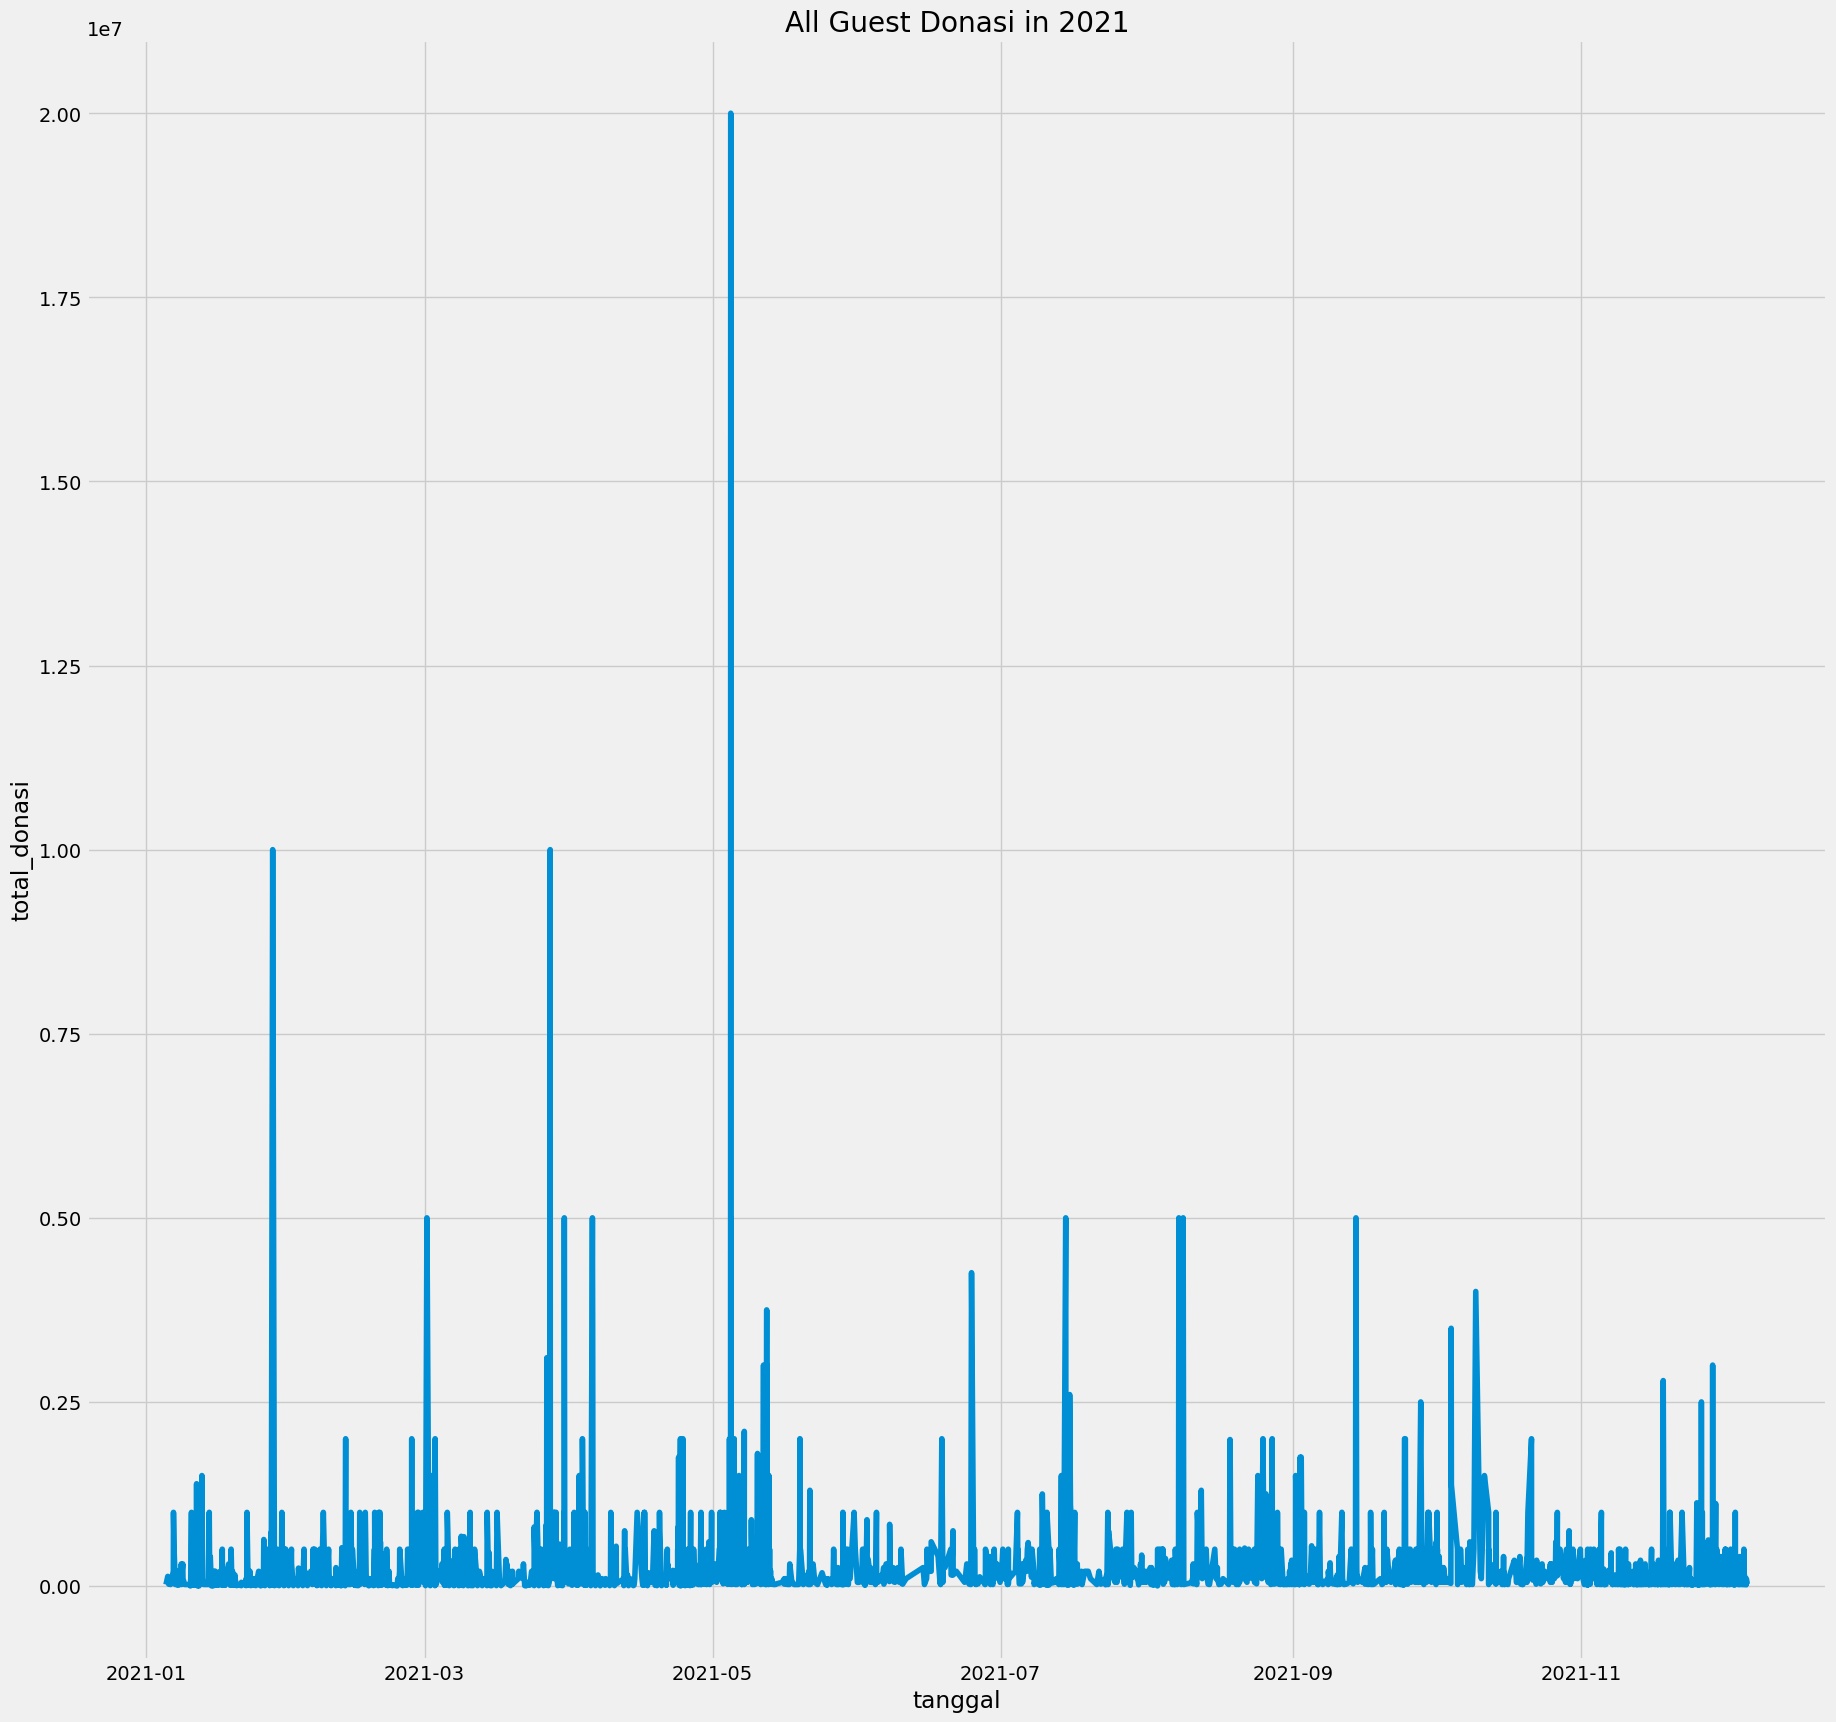

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,20))

# Add title
plt.title("All Guest Donasi in 2021")

# Line chart showing Sales over Date mapped by Category
sns.lineplot(x='tanggal',y='total_donasi', data=df_guest_donasi)

In [ ]:
df_guest_donasi.total_donasi.max()

20000628.0

<Axes: title={'center': 'All Guest Zakat in 2021'}, xlabel='tanggal', ylabel='total_zakat'>

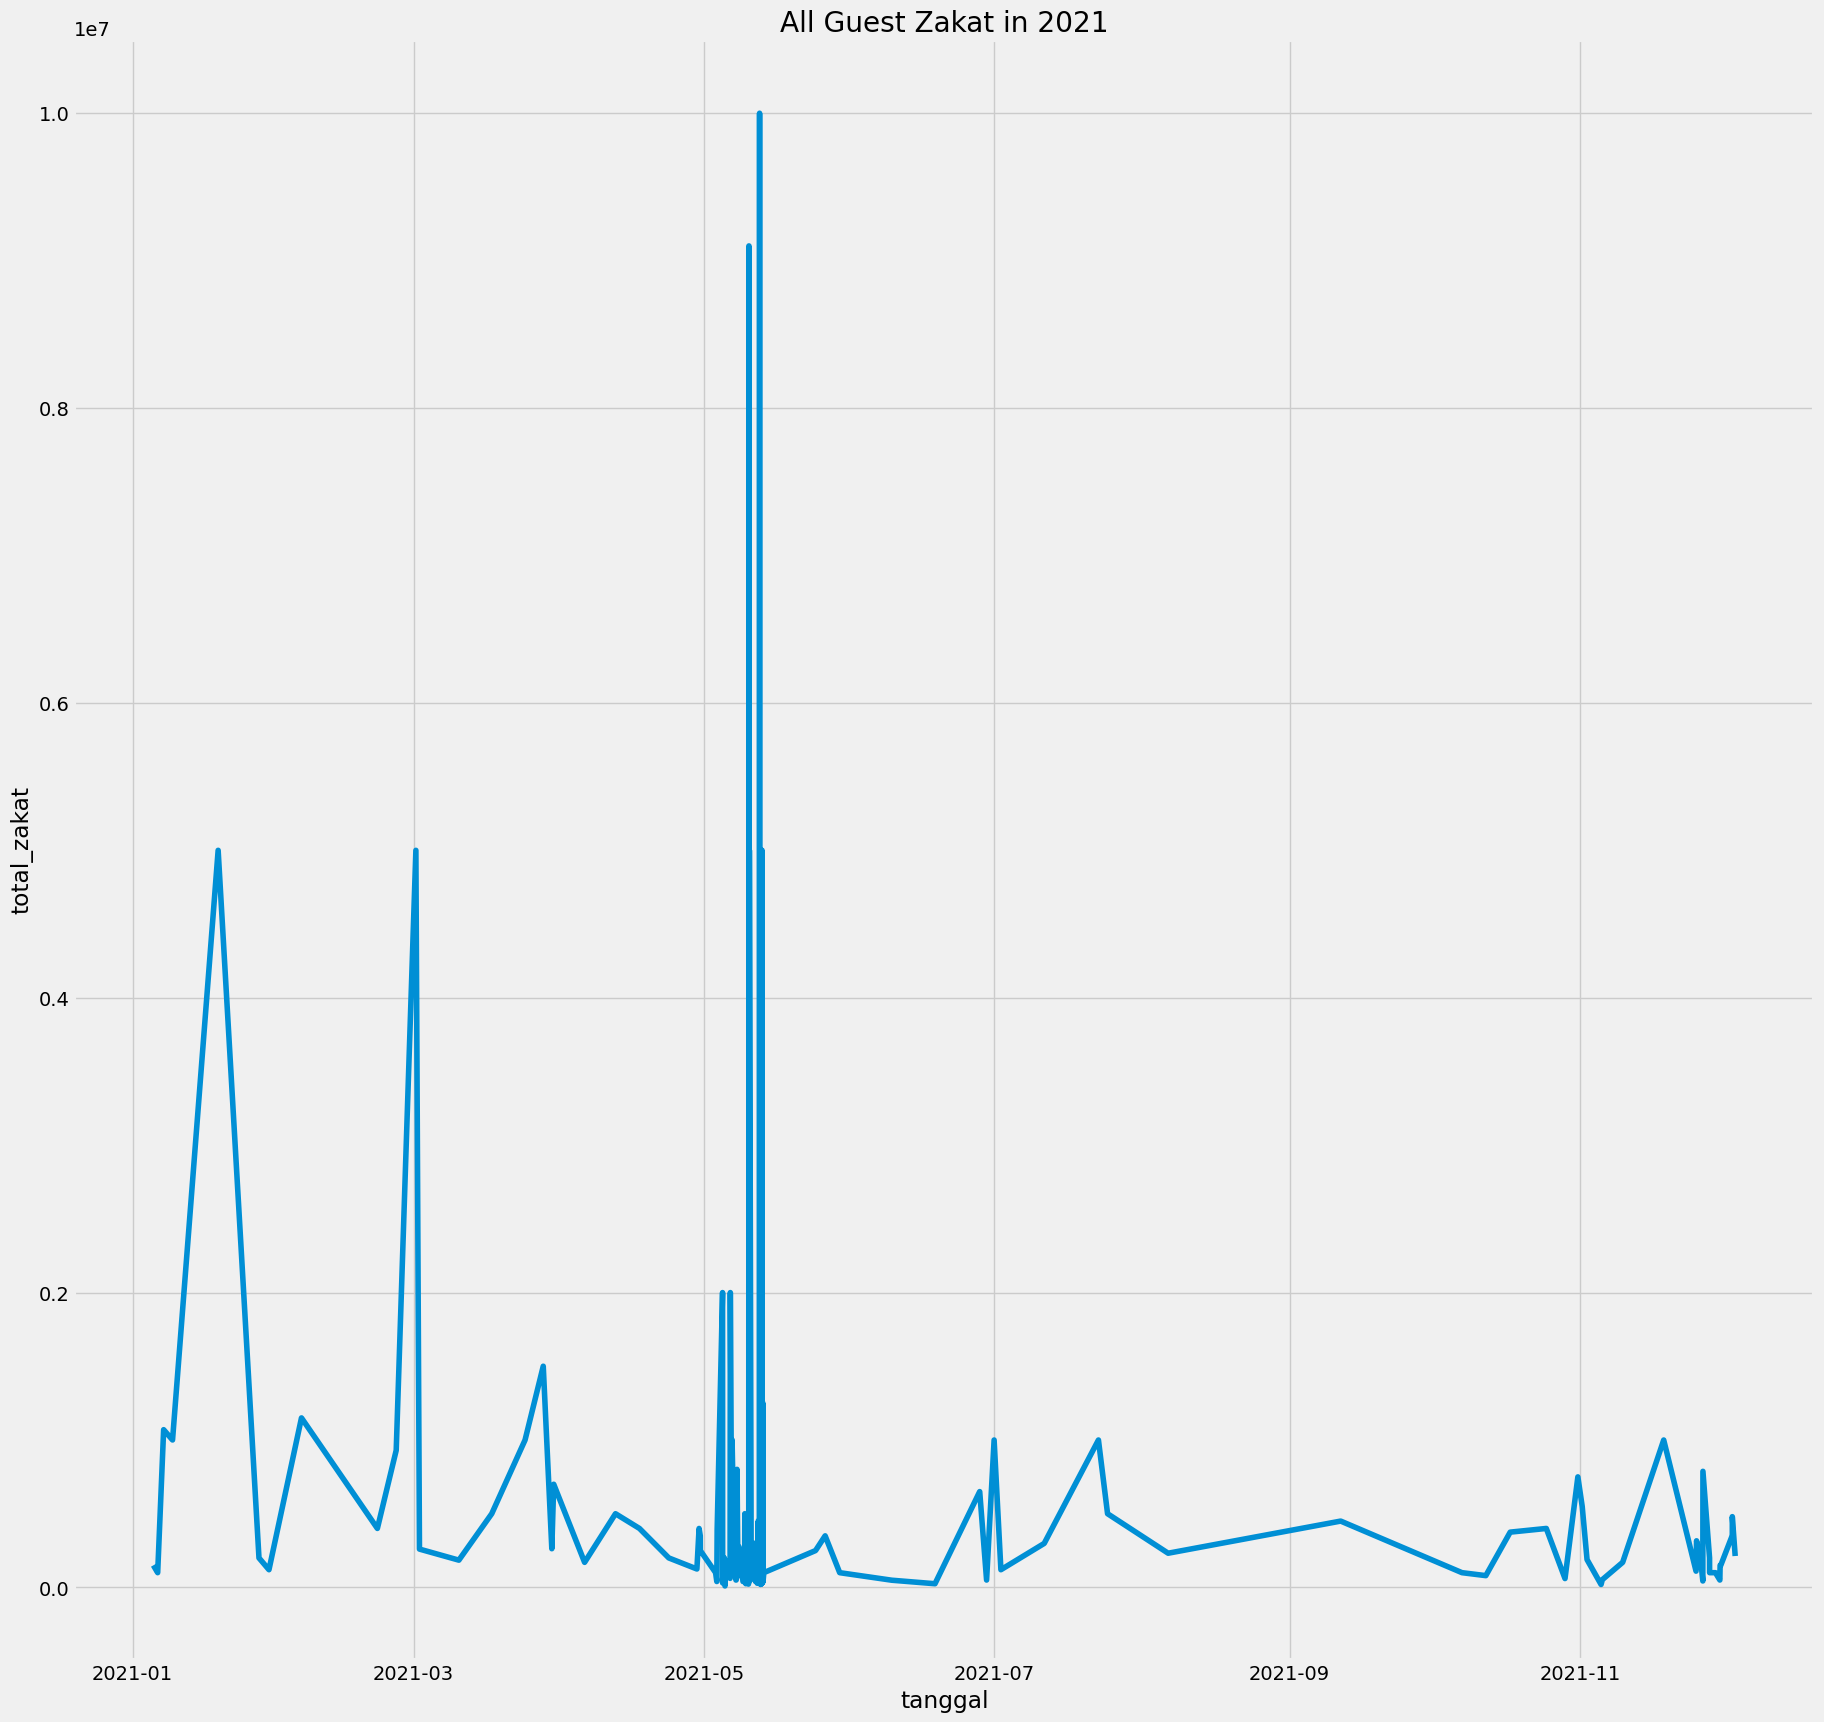

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,20))

# Add title
plt.title("All Guest Zakat in 2021")

# Line chart showing Sales over Date mapped by Category
sns.lineplot(x='tanggal',y='total_zakat', data=df_guest_zakat)

In [ ]:
df_guest_zakat.total_zakat.max()

10000000.0

<Axes: title={'center': 'All Users Donasi in 2021'}, xlabel='tanggal', ylabel='total_donasi'>

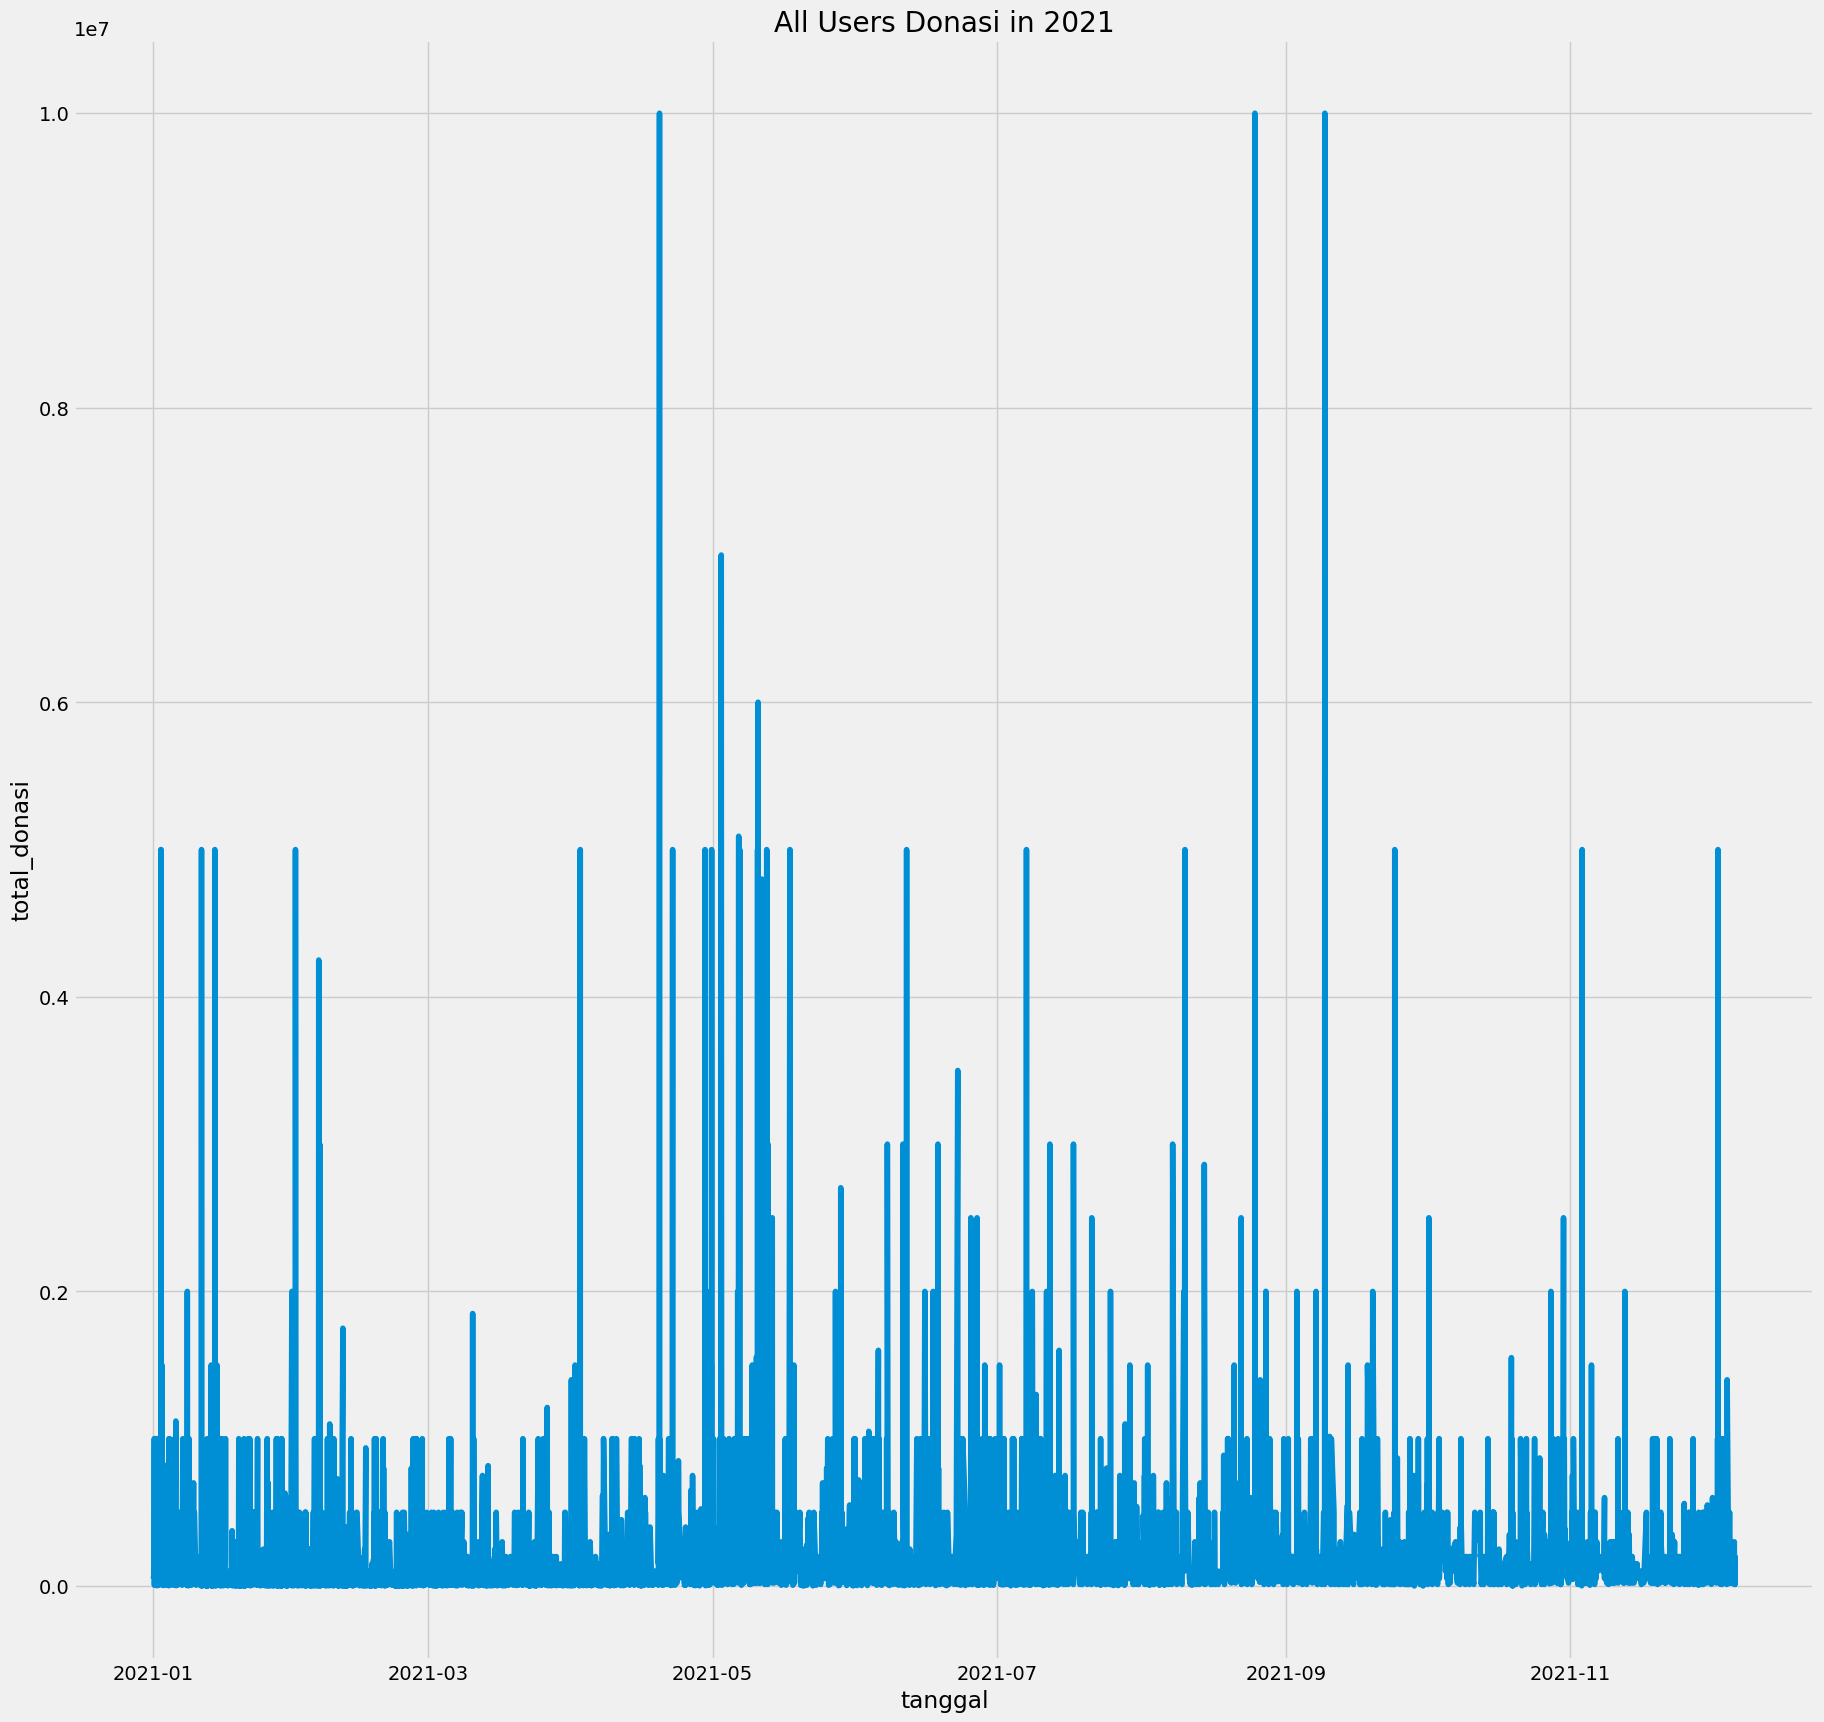

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,20))

# Add title
plt.title("All Users Donasi in 2021")

# Line chart showing Sales over Date mapped by Category
sns.lineplot(x='tanggal',y='total_donasi', data=df_users_donasi)

In [ ]:
df_users_donasi.total_donasi.max()

10000000.0

<Axes: title={'center': 'All Users Zakat in 2021'}, xlabel='tanggal', ylabel='total_zakat'>

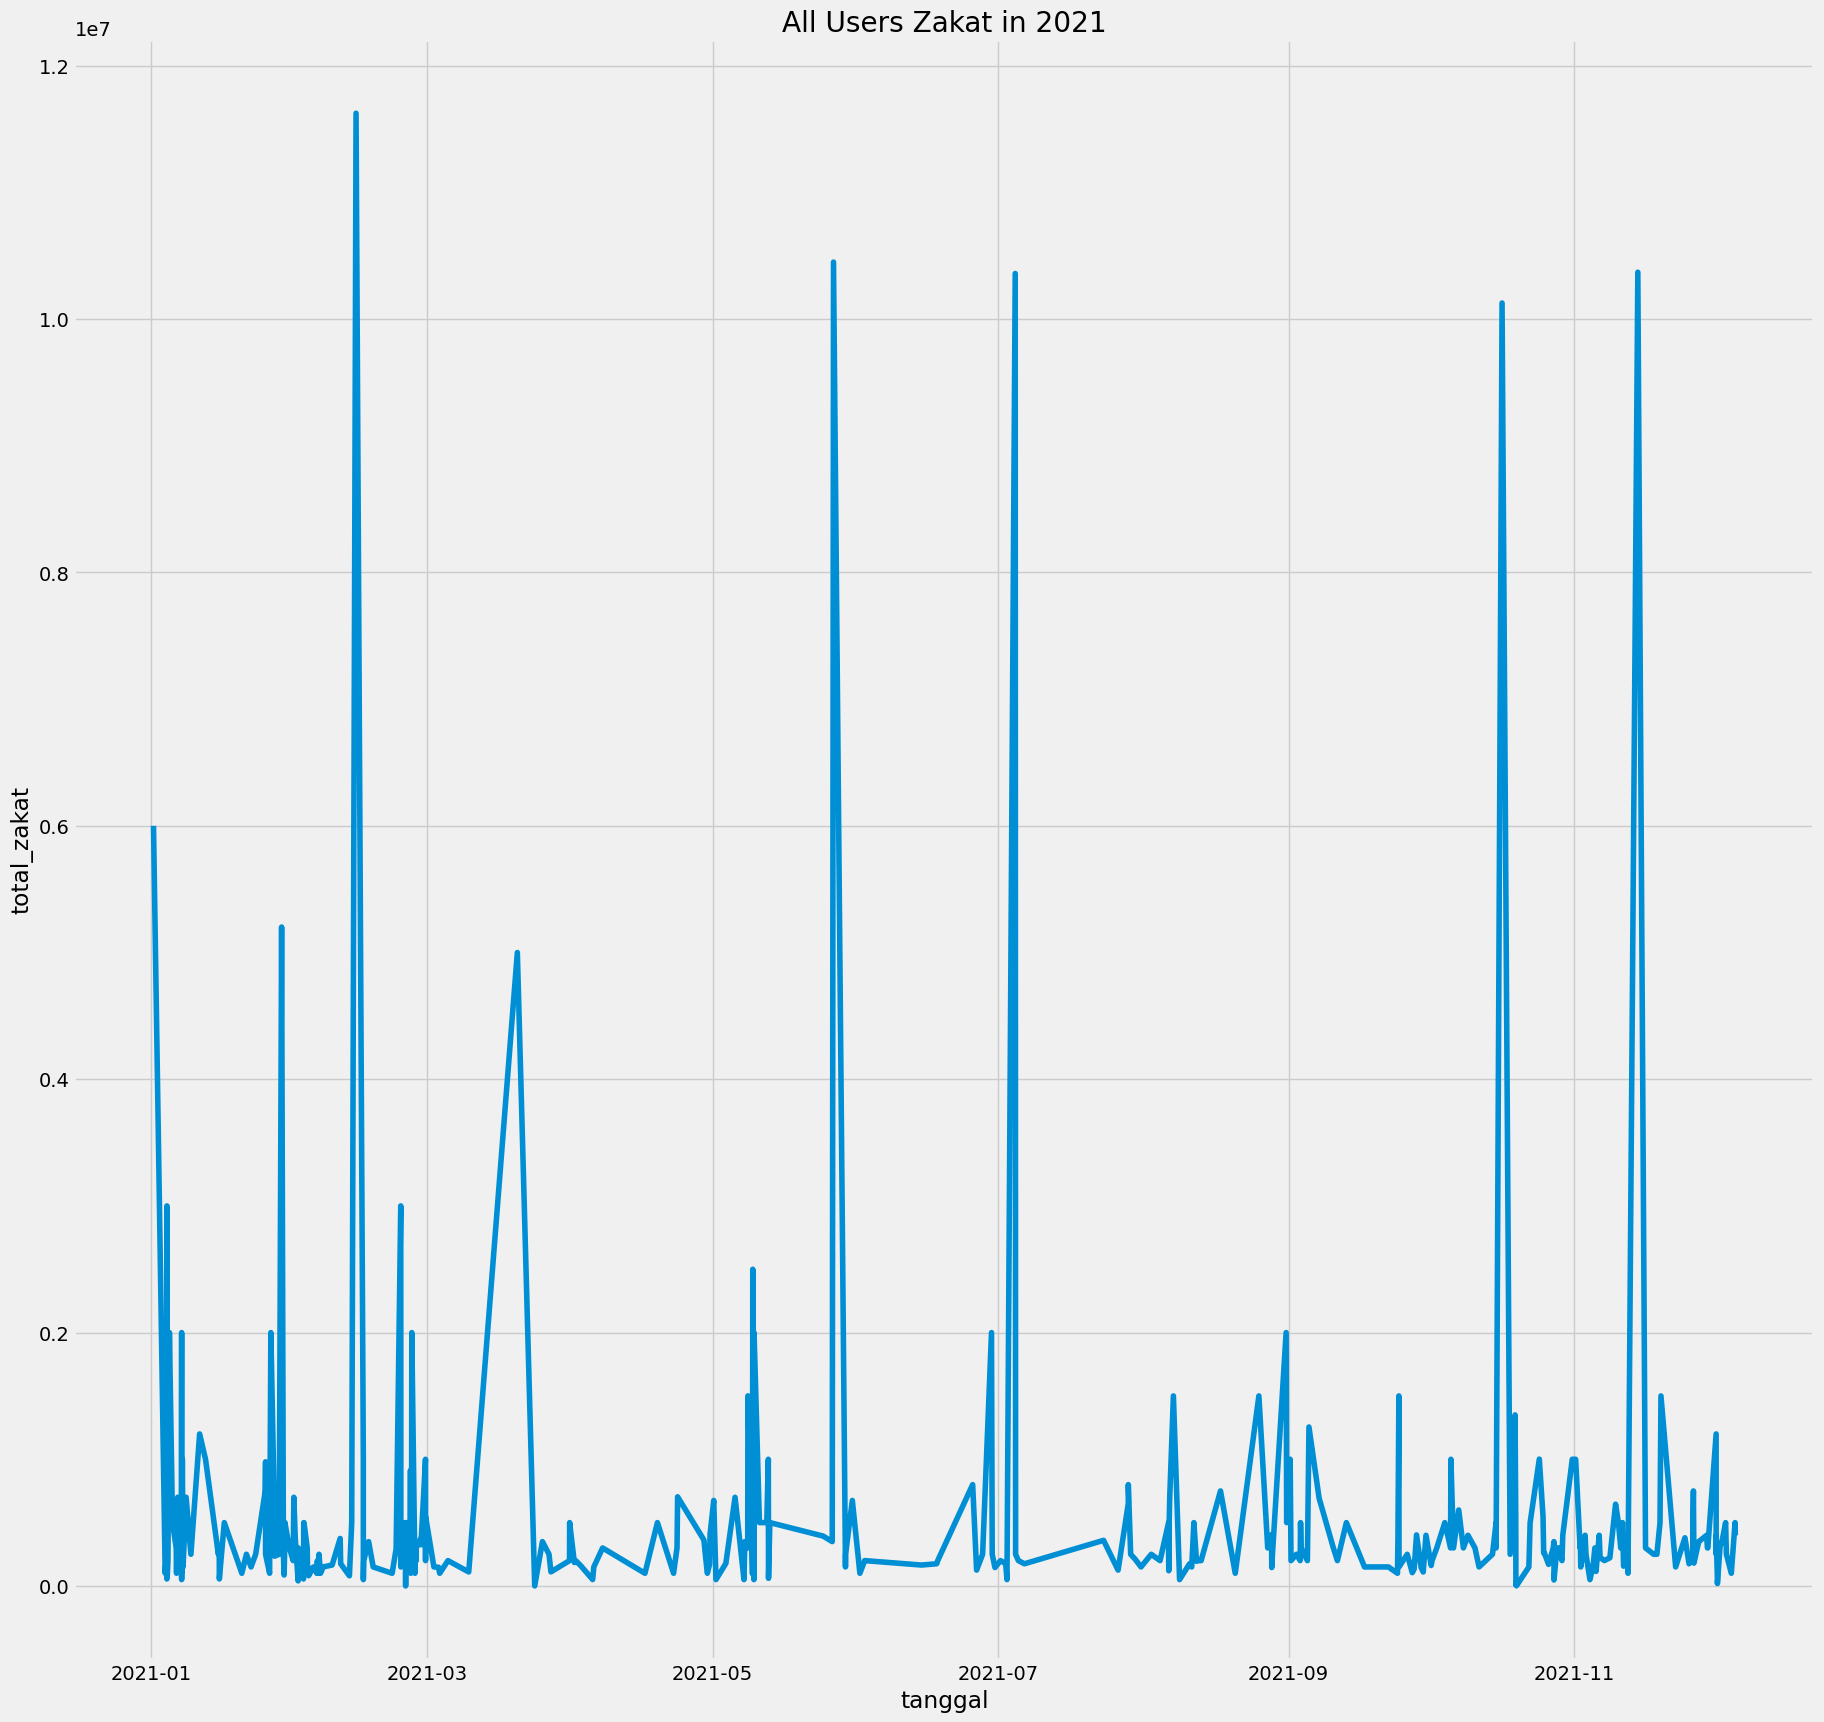

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,20))

# Add title
plt.title("All Users Zakat in 2021")

# Line chart showing Sales over Date mapped by Category
sns.lineplot(x='tanggal',y='total_zakat', data=df_users_zakat)

In [ ]:
df_users_zakat.total_zakat.max()

11625000.0

In [ ]:
users_zakat = df_users_zakat[['tanggal','total_zakat']]
users_zakat.set_index('tanggal', inplace = True)

users_donasi = df_users_donasi[['tanggal','total_donasi']]
users_donasi.set_index('tanggal', inplace = True)

guest_zakat = df_guest_zakat[['tanggal','total_zakat']]
guest_zakat.set_index('tanggal', inplace = True)

guest_donasi = df_guest_donasi[['tanggal','total_donasi']]
guest_donasi.set_index('tanggal', inplace = True)

In [ ]:
users_zakat

total_zakat
tanggal                         
2021-01-01 13:03:30    6000000.0
2021-01-04 00:55:12     100000.0
2021-01-04 08:43:51     300000.0
2021-01-04 08:50:12    1000000.0
2021-01-04 09:41:49      55000.0
...                          ...
2021-12-03 08:58:22     500000.0
2021-12-03 12:58:54     250000.0
2021-12-04 14:04:49     100000.0
2021-12-05 09:24:00     500000.0
2021-12-05 10:43:14     400000.0

[337 rows x 1 columns]

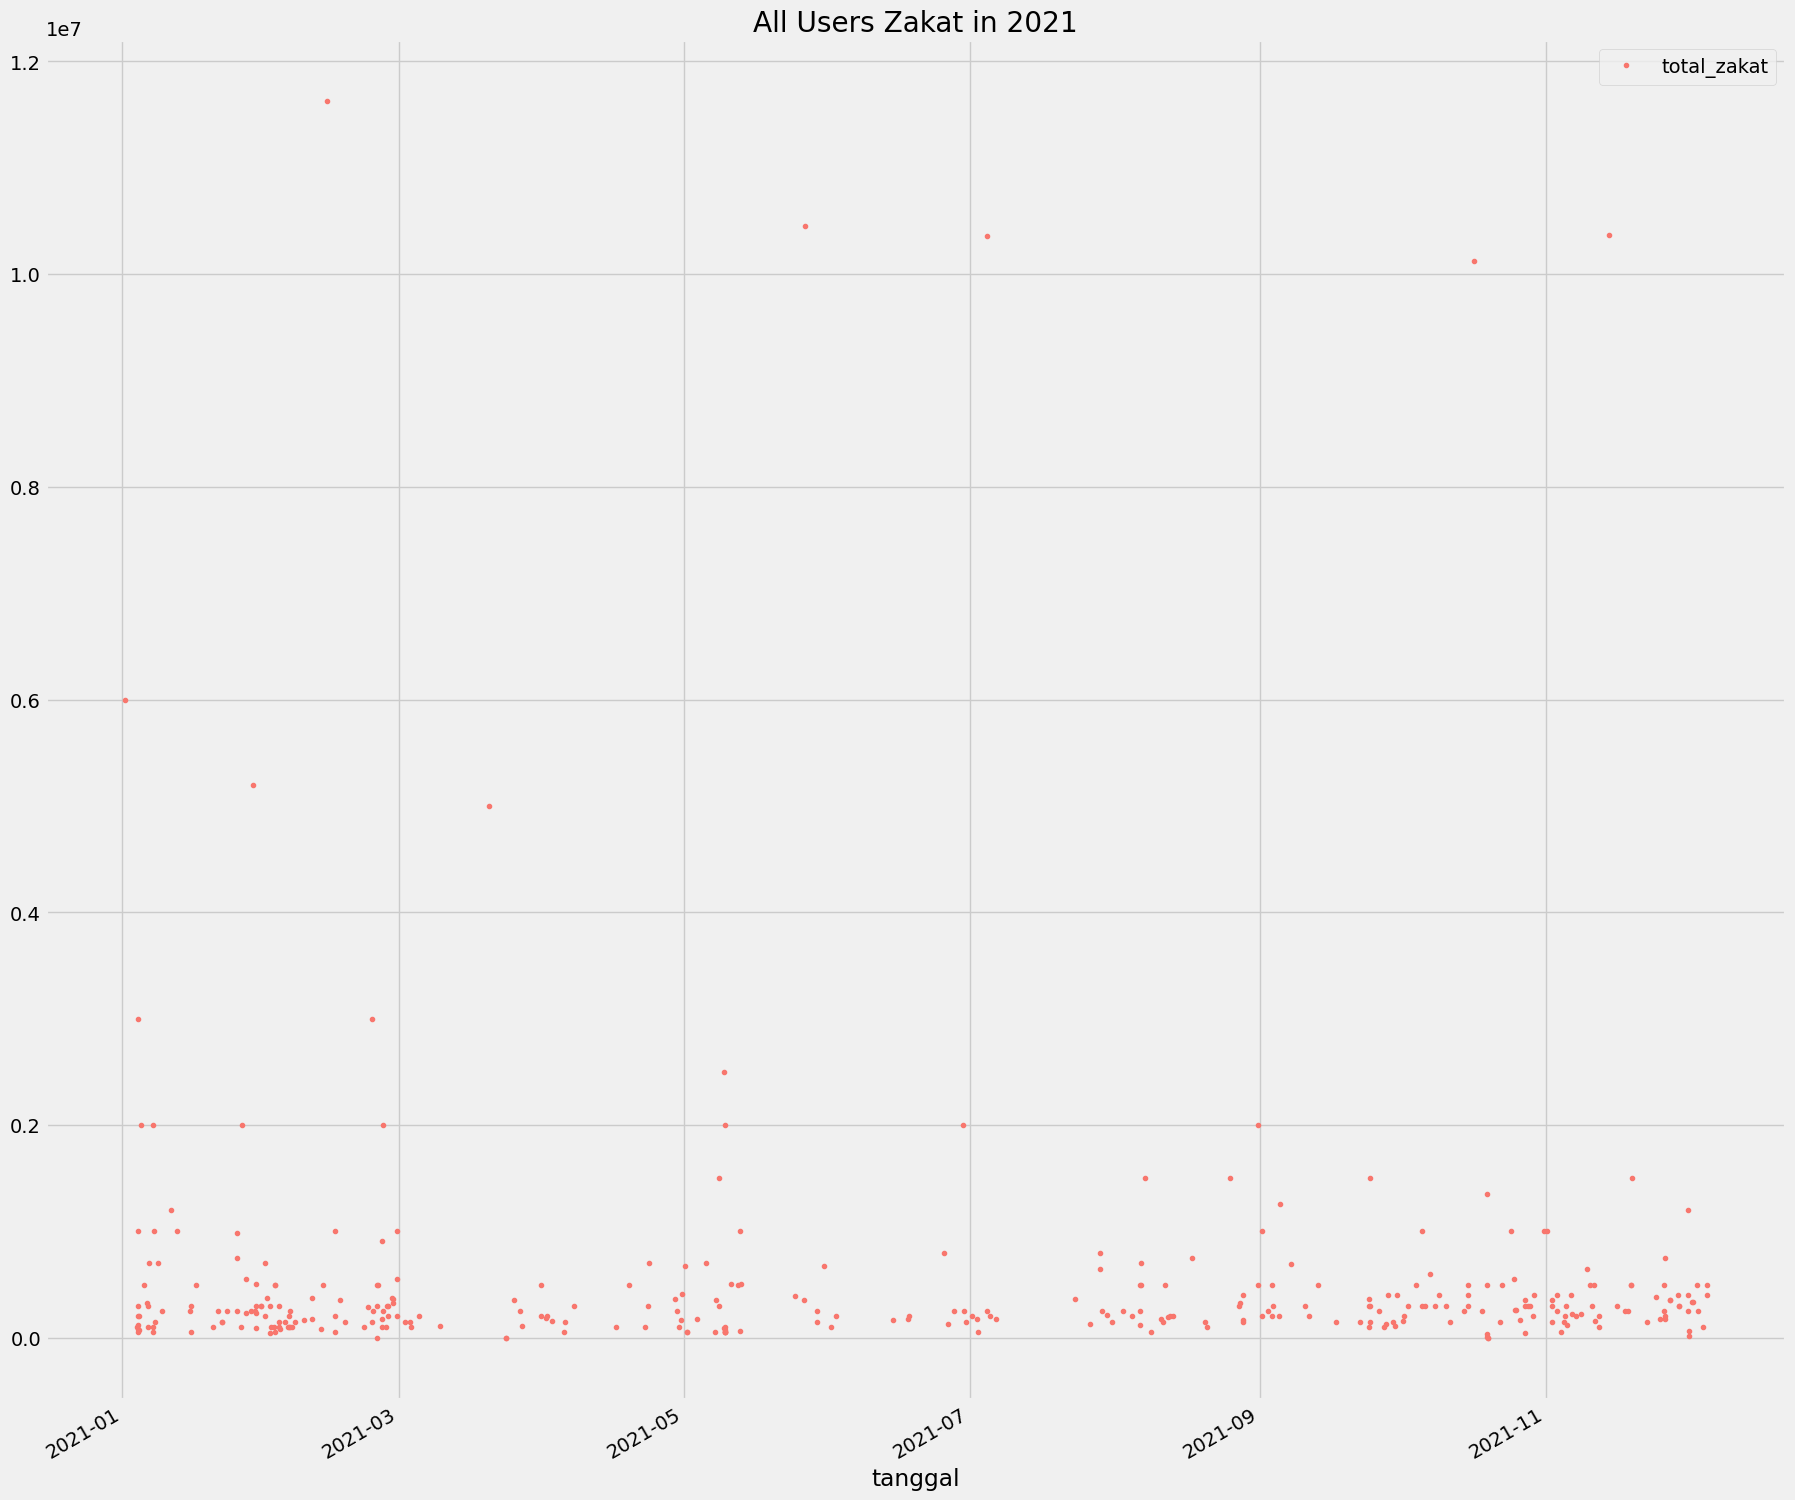

In [ ]:
# Color pallete for plotting
color_pal = ["#F8766D", "#D39200", "#93AA00",
             "#00BA38", "#00C19F", "#00B9E3",
             "#619CFF", "#DB72FB"]
users_zakat.plot(style='.', figsize=(20,20), color=color_pal[0], title="All Users Zakat in 2021")
plt.show()

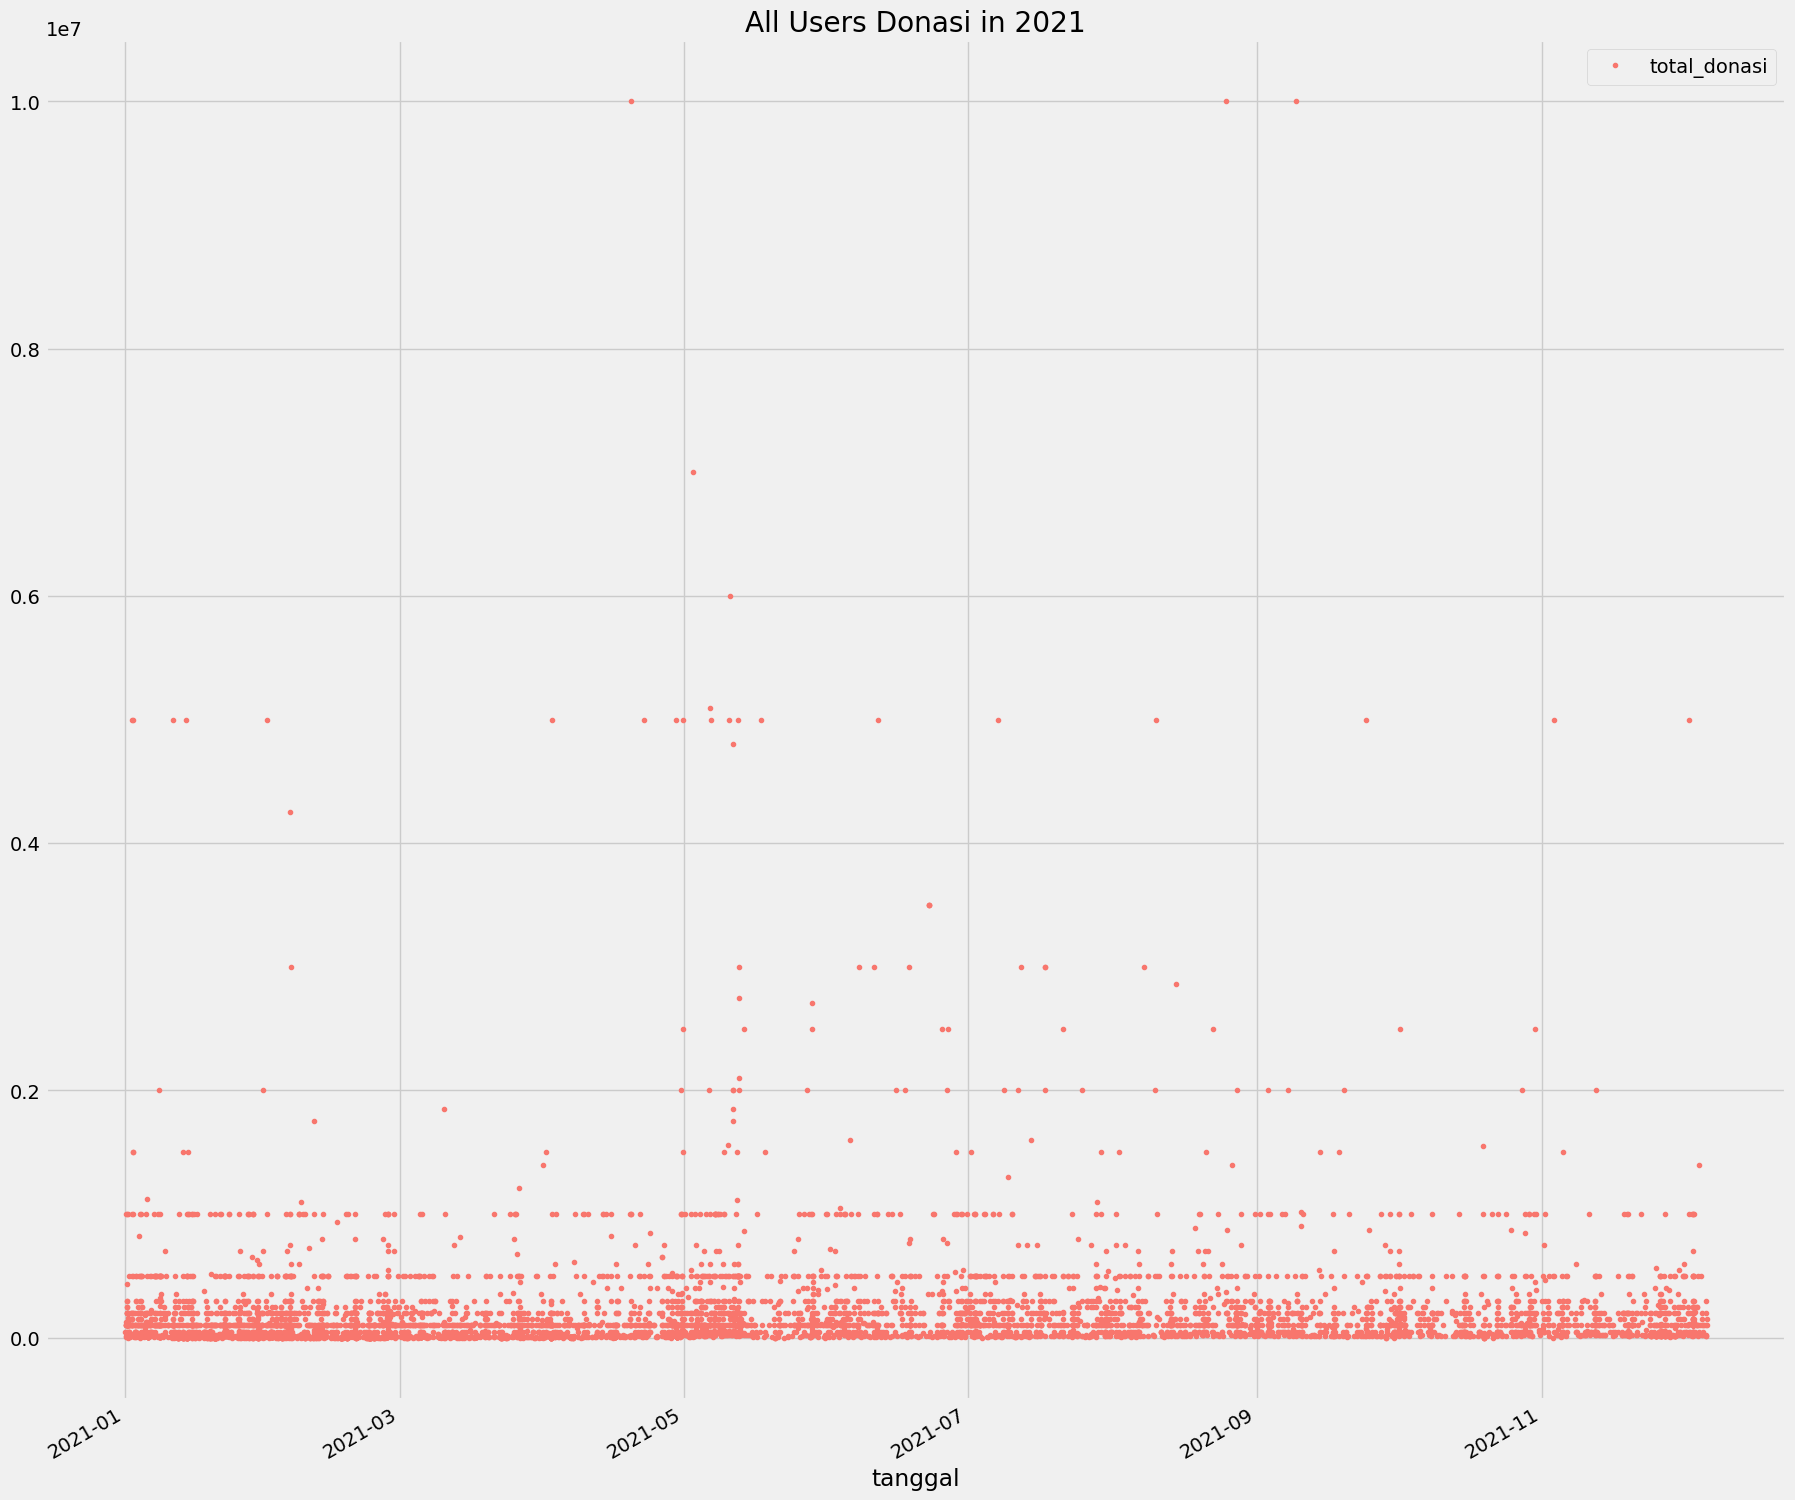

In [ ]:
# Color pallete for plotting
color_pal = ["#F8766D", "#D39200", "#93AA00",
             "#00BA38", "#00C19F", "#00B9E3",
             "#619CFF", "#DB72FB"]
users_donasi.plot(style='.', figsize=(20,20), color=color_pal[0], title="All Users Donasi in 2021")
plt.show()

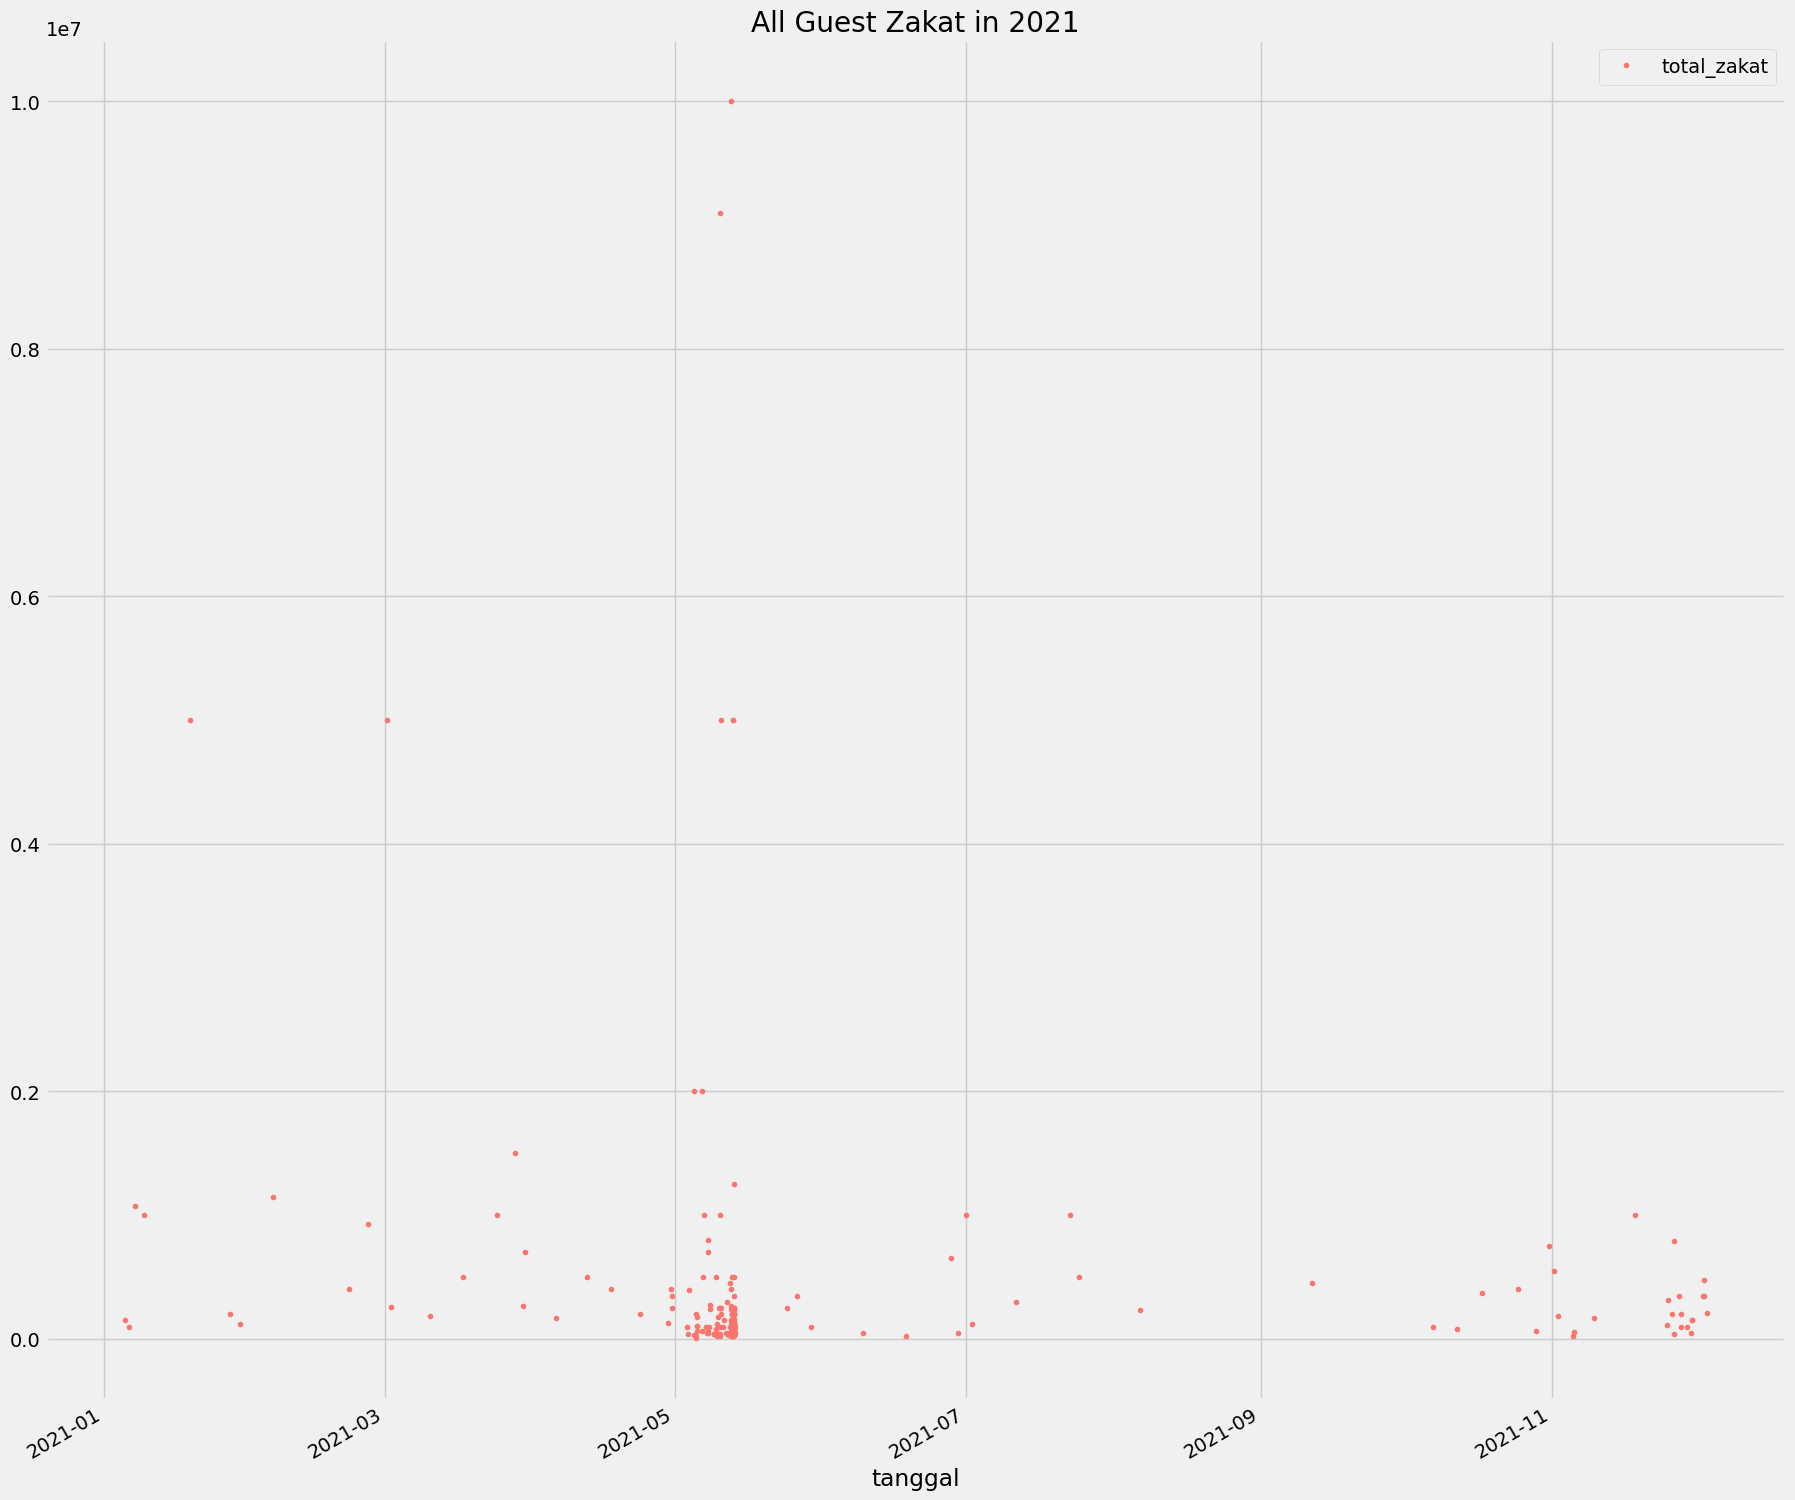

In [ ]:
# Color pallete for plotting
color_pal = ["#F8766D", "#D39200", "#93AA00",
             "#00BA38", "#00C19F", "#00B9E3",
             "#619CFF", "#DB72FB"]
guest_zakat.plot(style='.', figsize=(20,20), color=color_pal[0], title="All Guest Zakat in 2021")
plt.show()

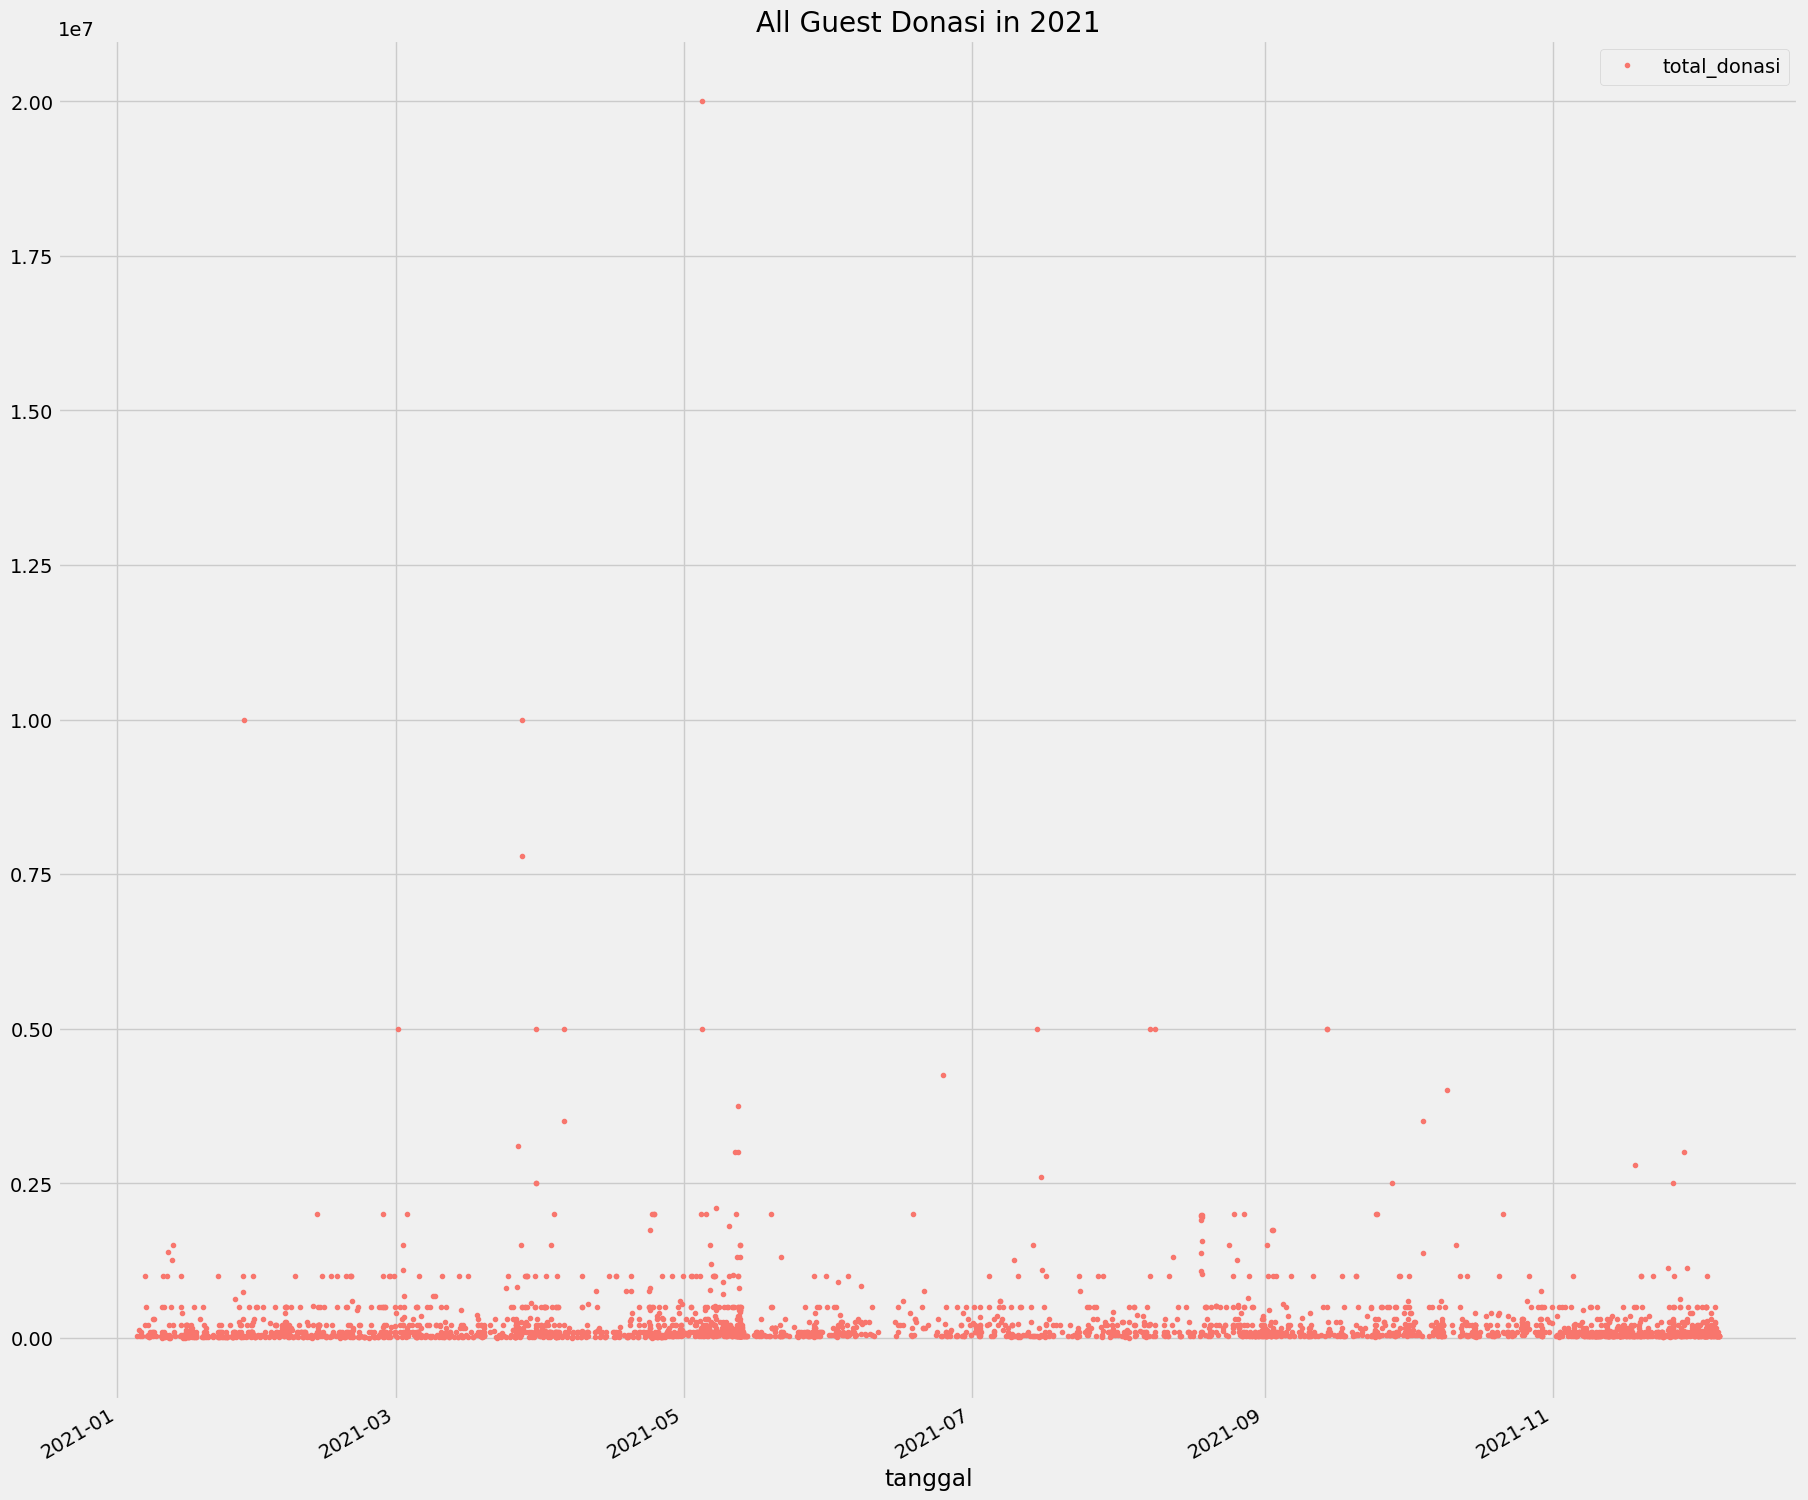

In [ ]:
# Color pallete for plotting
color_pal = ["#F8766D", "#D39200", "#93AA00",
             "#00BA38", "#00C19F", "#00B9E3",
             "#619CFF", "#DB72FB"]
guest_donasi.plot(style='.', figsize=(20,20), color=color_pal[0], title="All Guest Donasi in 2021")
plt.show()

In [ ]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week

    X = df[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [ ]:
type(guest_donasi)

pandas.core.frame.DataFrame

In [ ]:
guest_donasi

total_donasi
tanggal                          
2021-01-05 05:32:07       20000.0
2021-01-05 14:28:26      130662.0
2021-01-05 19:22:49       25000.0
2021-01-05 21:11:39      100140.0
2021-01-06 00:30:37       50000.0
...                           ...
2021-12-06 03:31:41       20000.0
2021-12-06 04:25:45       20000.0
2021-12-06 04:45:15       20000.0
2021-12-06 04:51:17       20000.0
2021-12-06 06:27:39       20000.0

[2873 rows x 1 columns]

In [ ]:
list_of_online_sumbangan = [guest_donasi, guest_zakat, users_donasi, users_zakat]
list_of_name = ['Guest Donasi', 'Guest Zakat', 'Users Donasi', 'Users Zakat']

In [ ]:
list_of_online_sumbangan[0].columns[0]

'total_donasi'

In [ ]:
list_of_features = [None]*4

In [ ]:
list_of_features

[None, None, None, None]

In [ ]:
for idx, sumbangan in enumerate(list_of_online_sumbangan):
    list_of_features[idx] = create_features(sumbangan)
    list_of_features[idx][sumbangan.columns[0]] = sumbangan[sumbangan.columns[0]]

In [ ]:
list_of_features[0].head()

dayofweek  quarter  month  year  dayofyear  dayofmonth  \
tanggal                                                                       
2021-01-05 05:32:07          1        1      1  2021          5           5   
2021-01-05 14:28:26          1        1      1  2021          5           5   
2021-01-05 19:22:49          1        1      1  2021          5           5   
2021-01-05 21:11:39          1        1      1  2021          5           5   
2021-01-06 00:30:37          2        1      1  2021          6           6   

                     weekofyear  total_donasi  
tanggal                                        
2021-01-05 05:32:07           1       20000.0  
2021-01-05 14:28:26           1      130662.0  
2021-01-05 19:22:49           1       25000.0  
2021-01-05 21:11:39           1      100140.0  
2021-01-06 00:30:37           1       50000.0

In [ ]:
list_of_features[0]

dayofweek  quarter  month  year  dayofyear  dayofmonth  \
tanggal                                                                       
2021-01-05 05:32:07          1        1      1  2021          5           5   
2021-01-05 14:28:26          1        1      1  2021          5           5   
2021-01-05 19:22:49          1        1      1  2021          5           5   
2021-01-05 21:11:39          1        1      1  2021          5           5   
2021-01-06 00:30:37          2        1      1  2021          6           6   
...                        ...      ...    ...   ...        ...         ...   
2021-12-06 03:31:41          0        4     12  2021        340           6   
2021-12-06 04:25:45          0        4     12  2021        340           6   
2021-12-06 04:45:15          0        4     12  2021        340           6   
2021-12-06 04:51:17          0        4     12  2021        340           6   
2021-12-06 06:27:39          0        4     12  2021        340           6   

                     weekofyear  total_donasi  
tanggal                                        
2021-01-05 05:32:07           1       20000.0  
2021-01-05 14:28:26           1      130662.0  
2021-01-05 19:22:49           1       25000.0  
2021-01-05 21:11:39           1      100140.0  
2021-01-06 00:30:37           1       50000.0  
...                         ...           ...  
2021-12-06 03:31:41          49       20000.0  
2021-12-06 04:25:45          49       20000.0  
2021-12-06 04:45:15          49       20000.0  
2021-12-06 04:51:17          49       20000.0  
2021-12-06 06:27:39          49       20000.0  

[2873 rows x 8 columns]

In [ ]:
for sumbangan in list_of_online_sumbangan:
    sumbangan['hari'] = sumbangan.index.strftime("%A")

<ipython-input-259-4af8e250ba8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sumbangan['hari'] = sumbangan.index.strftime("%A")
<ipython-input-259-4af8e250ba8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sumbangan['hari'] = sumbangan.index.strftime("%A")
<ipython-input-259-4af8e250ba8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [ ]:
for i in range(len(list_of_online_sumbangan)):
    print(list_of_online_sumbangan[i].groupby('hari').hari.count())

hari
Friday       806
Monday       304
Saturday     278
Sunday       316
Thursday     367
Tuesday      350
Wednesday    452
Name: hari, dtype: int64
hari
Friday        21
Monday        25
Saturday       9
Sunday        24
Thursday     109
Tuesday       17
Wednesday    133
Name: hari, dtype: int64
hari
Friday       1995
Monday        789
Saturday      618
Sunday        467
Thursday      791
Tuesday       746
Wednesday     802
Name: hari, dtype: int64
hari
Friday       85
Monday       48
Saturday     36
Sunday       31
Thursday     41
Tuesday      40
Wednesday    56
Name: hari, dtype: int64


In [ ]:
list_of_features[0]

dayofweek  quarter  month  year  dayofyear  dayofmonth  \
tanggal                                                                       
2021-01-05 05:32:07          1        1      1  2021          5           5   
2021-01-05 14:28:26          1        1      1  2021          5           5   
2021-01-05 19:22:49          1        1      1  2021          5           5   
2021-01-05 21:11:39          1        1      1  2021          5           5   
2021-01-06 00:30:37          2        1      1  2021          6           6   
...                        ...      ...    ...   ...        ...         ...   
2021-12-06 03:31:41          0        4     12  2021        340           6   
2021-12-06 04:25:45          0        4     12  2021        340           6   
2021-12-06 04:45:15          0        4     12  2021        340           6   
2021-12-06 04:51:17          0        4     12  2021        340           6   
2021-12-06 06:27:39          0        4     12  2021        340           6   

                     weekofyear  total_donasi  
tanggal                                        
2021-01-05 05:32:07           1       20000.0  
2021-01-05 14:28:26           1      130662.0  
2021-01-05 19:22:49           1       25000.0  
2021-01-05 21:11:39           1      100140.0  
2021-01-06 00:30:37           1       50000.0  
...                         ...           ...  
2021-12-06 03:31:41          49       20000.0  
2021-12-06 04:25:45          49       20000.0  
2021-12-06 04:45:15          49       20000.0  
2021-12-06 04:51:17          49       20000.0  
2021-12-06 06:27:39          49       20000.0  

[2873 rows x 8 columns]

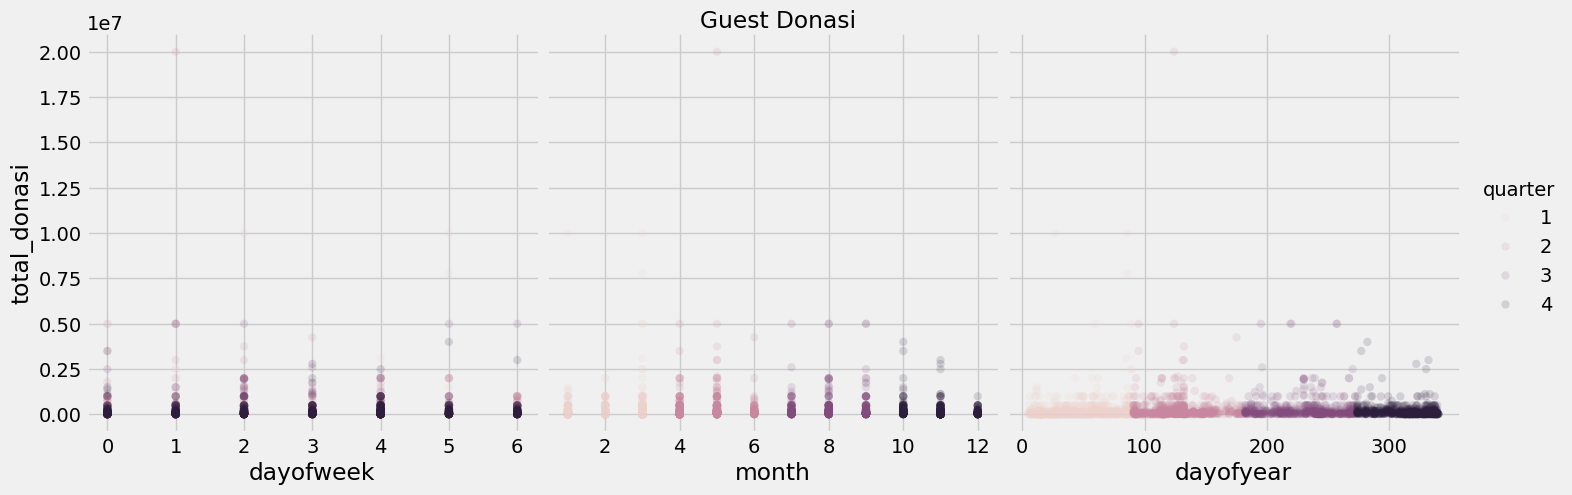

In [ ]:
sns.pairplot(list_of_features[0],
             hue='quarter',
             x_vars=['dayofweek','month','dayofyear'],
             y_vars=list_of_features[0].columns[-1],
             height=5,
             plot_kws={'alpha':0.15, 'linewidth':0}
            )
plt.suptitle(list_of_name[0])
plt.show()

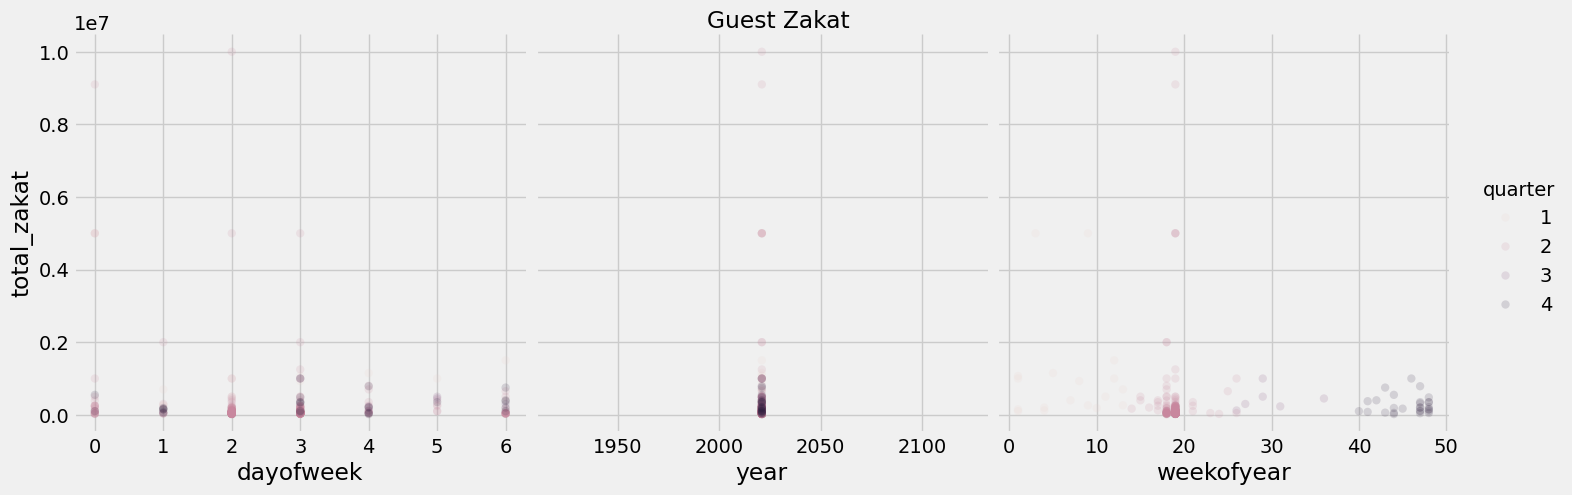

In [ ]:
sns.pairplot(list_of_features[1],
             hue='quarter',
             x_vars=['dayofweek','year','weekofyear'],
             y_vars=list_of_features[1].columns[-1],
             height=5,
             plot_kws={'alpha':0.15, 'linewidth':0}
            )
plt.suptitle(list_of_name[1])
plt.show()

In [ ]:
for sumbangan in list_of_online_sumbangan:
    sumbangan.drop(columns='hari', inplace = True)

<ipython-input-261-d6f7c0ea3e20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sumbangan.drop(columns='hari', inplace = True)
<ipython-input-261-d6f7c0ea3e20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sumbangan.drop(columns='hari', inplace = True)
<ipython-input-261-d6f7c0ea3e20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sumbangan.drop(columns='hari', inplace = True)
<ipython-input-261-d6f7c0ea3e20>:2: SettingWithCopyW

In [ ]:
list_of_online_sumbangan[0]

total_donasi
tanggal                          
2021-01-05 05:32:07       20000.0
2021-01-05 14:28:26      130662.0
2021-01-05 19:22:49       25000.0
2021-01-05 21:11:39      100140.0
2021-01-06 00:30:37       50000.0
...                           ...
2021-12-06 03:31:41       20000.0
2021-12-06 04:25:45       20000.0
2021-12-06 04:45:15       20000.0
2021-12-06 04:51:17       20000.0
2021-12-06 06:27:39       20000.0

[2873 rows x 1 columns]

In [ ]:
for i in range(4):
    list_of_online_sumbangan[i]= list_of_online_sumbangan[i].resample('D').sum()
    list_of_online_sumbangan[i]

<Axes: title={'center': 'All Users Zakat in 2021'}, xlabel='tanggal', ylabel='total_zakat'>

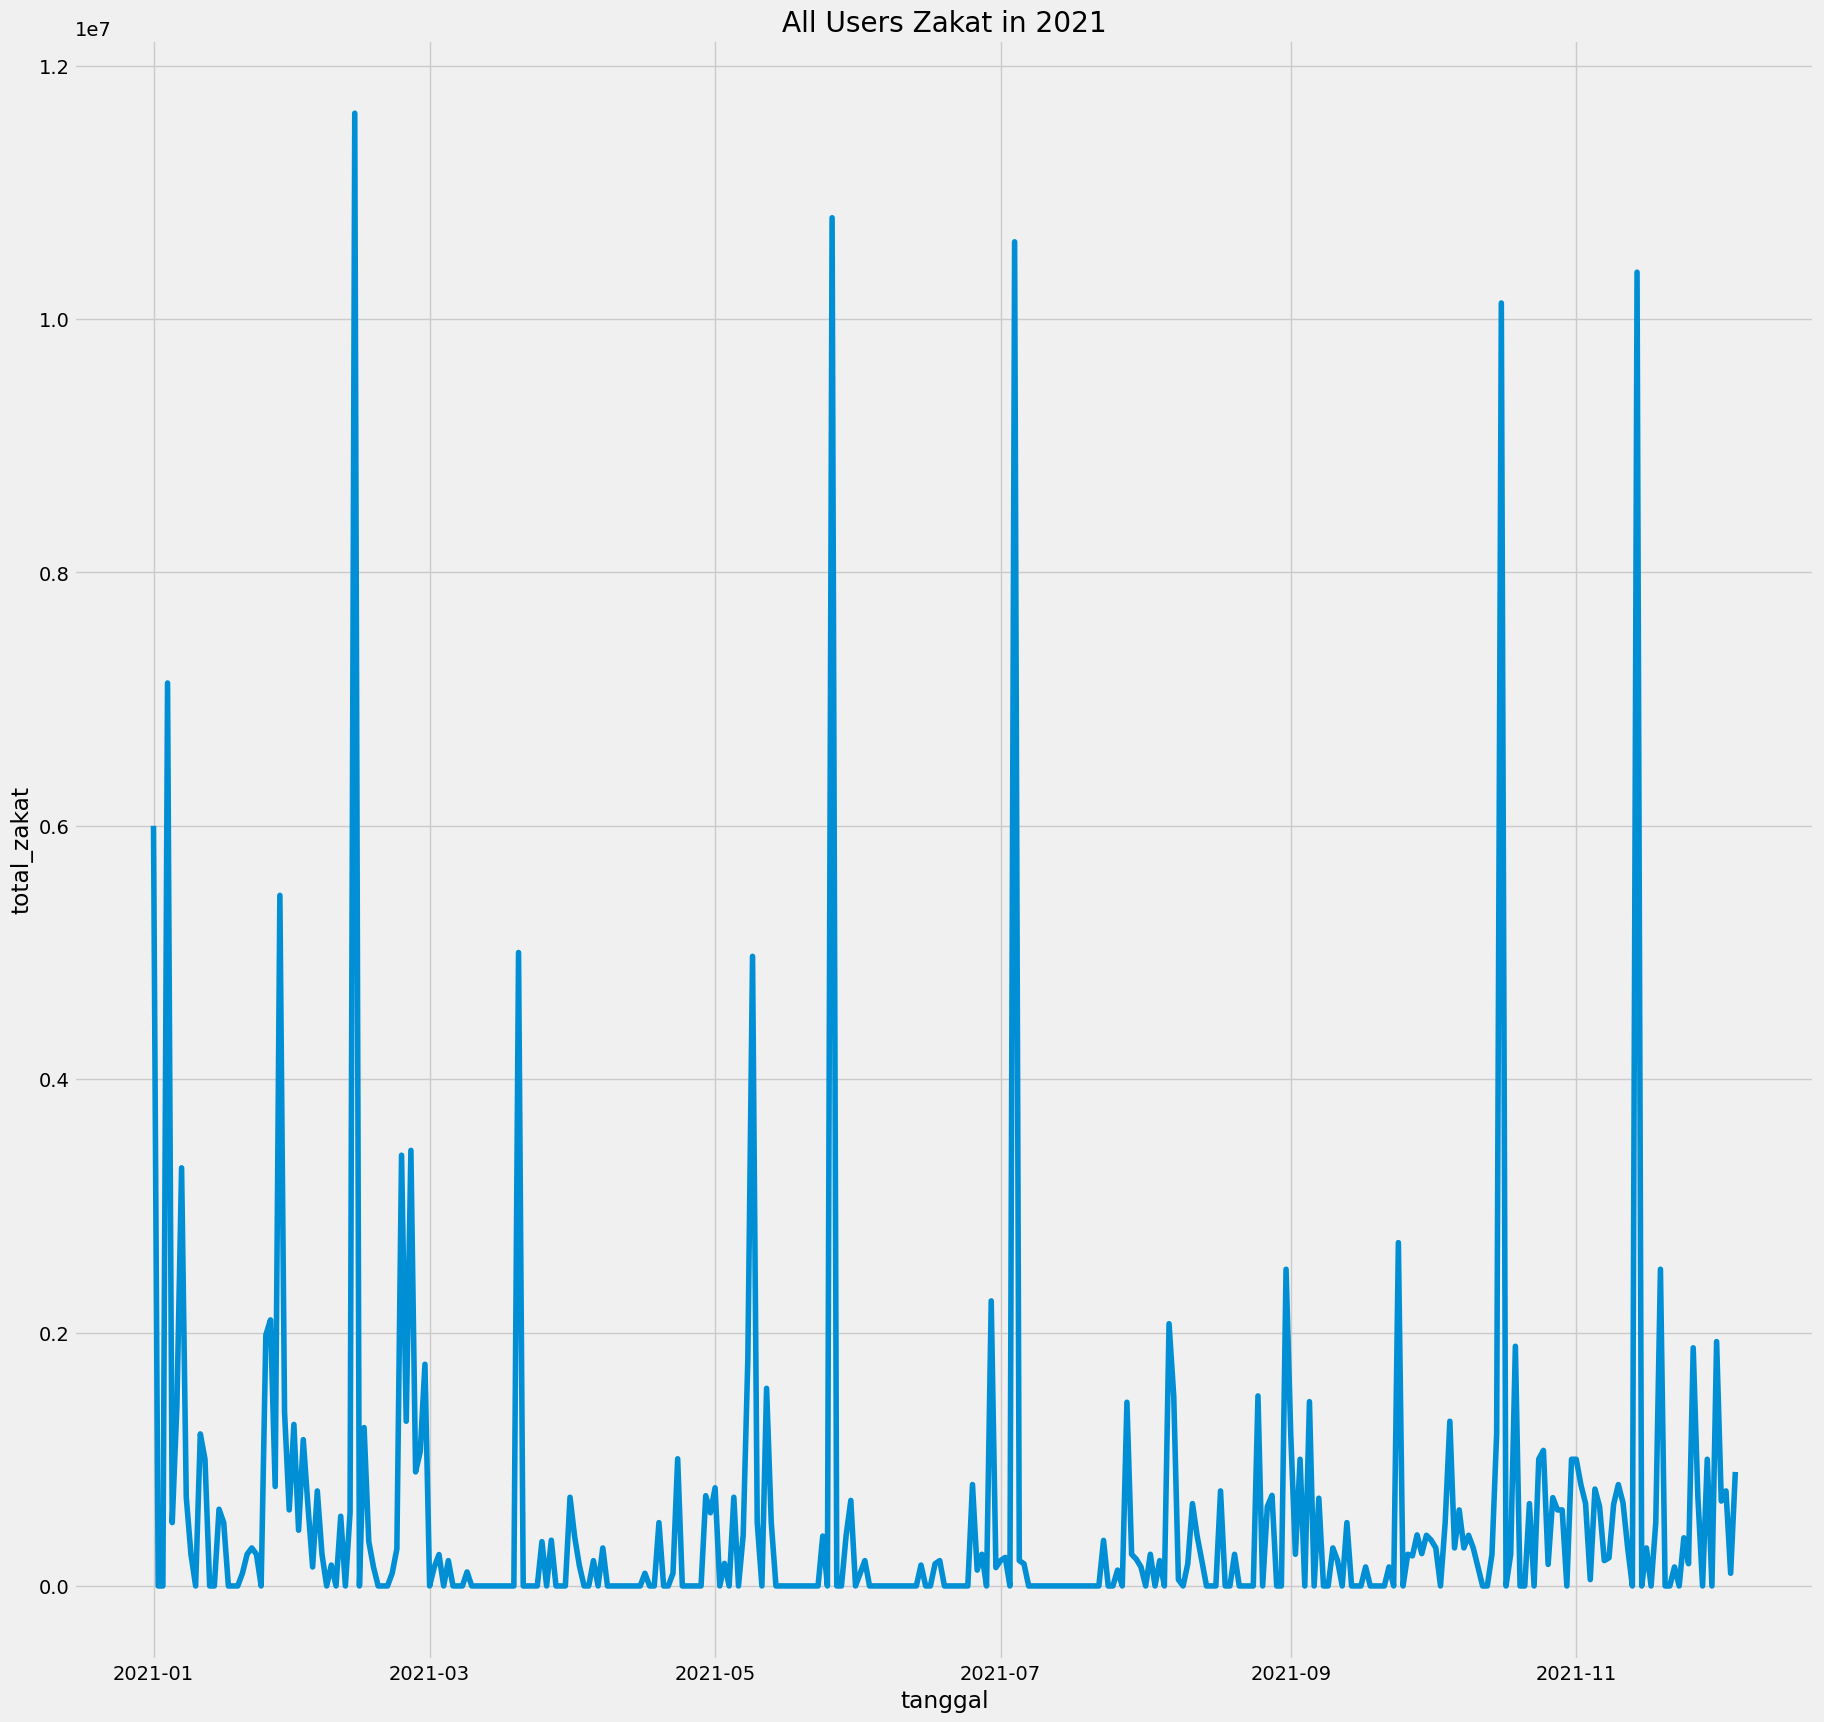

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,20))

# Add title
plt.title("All Users Zakat in 2021")

# Line chart showing Sales over Date mapped by Category
sns.lineplot(x='tanggal',y='total_zakat', data=list_of_online_sumbangan[3])

<Axes: title={'center': 'All Users Donasi in 2021'}, xlabel='tanggal', ylabel='total_donasi'>

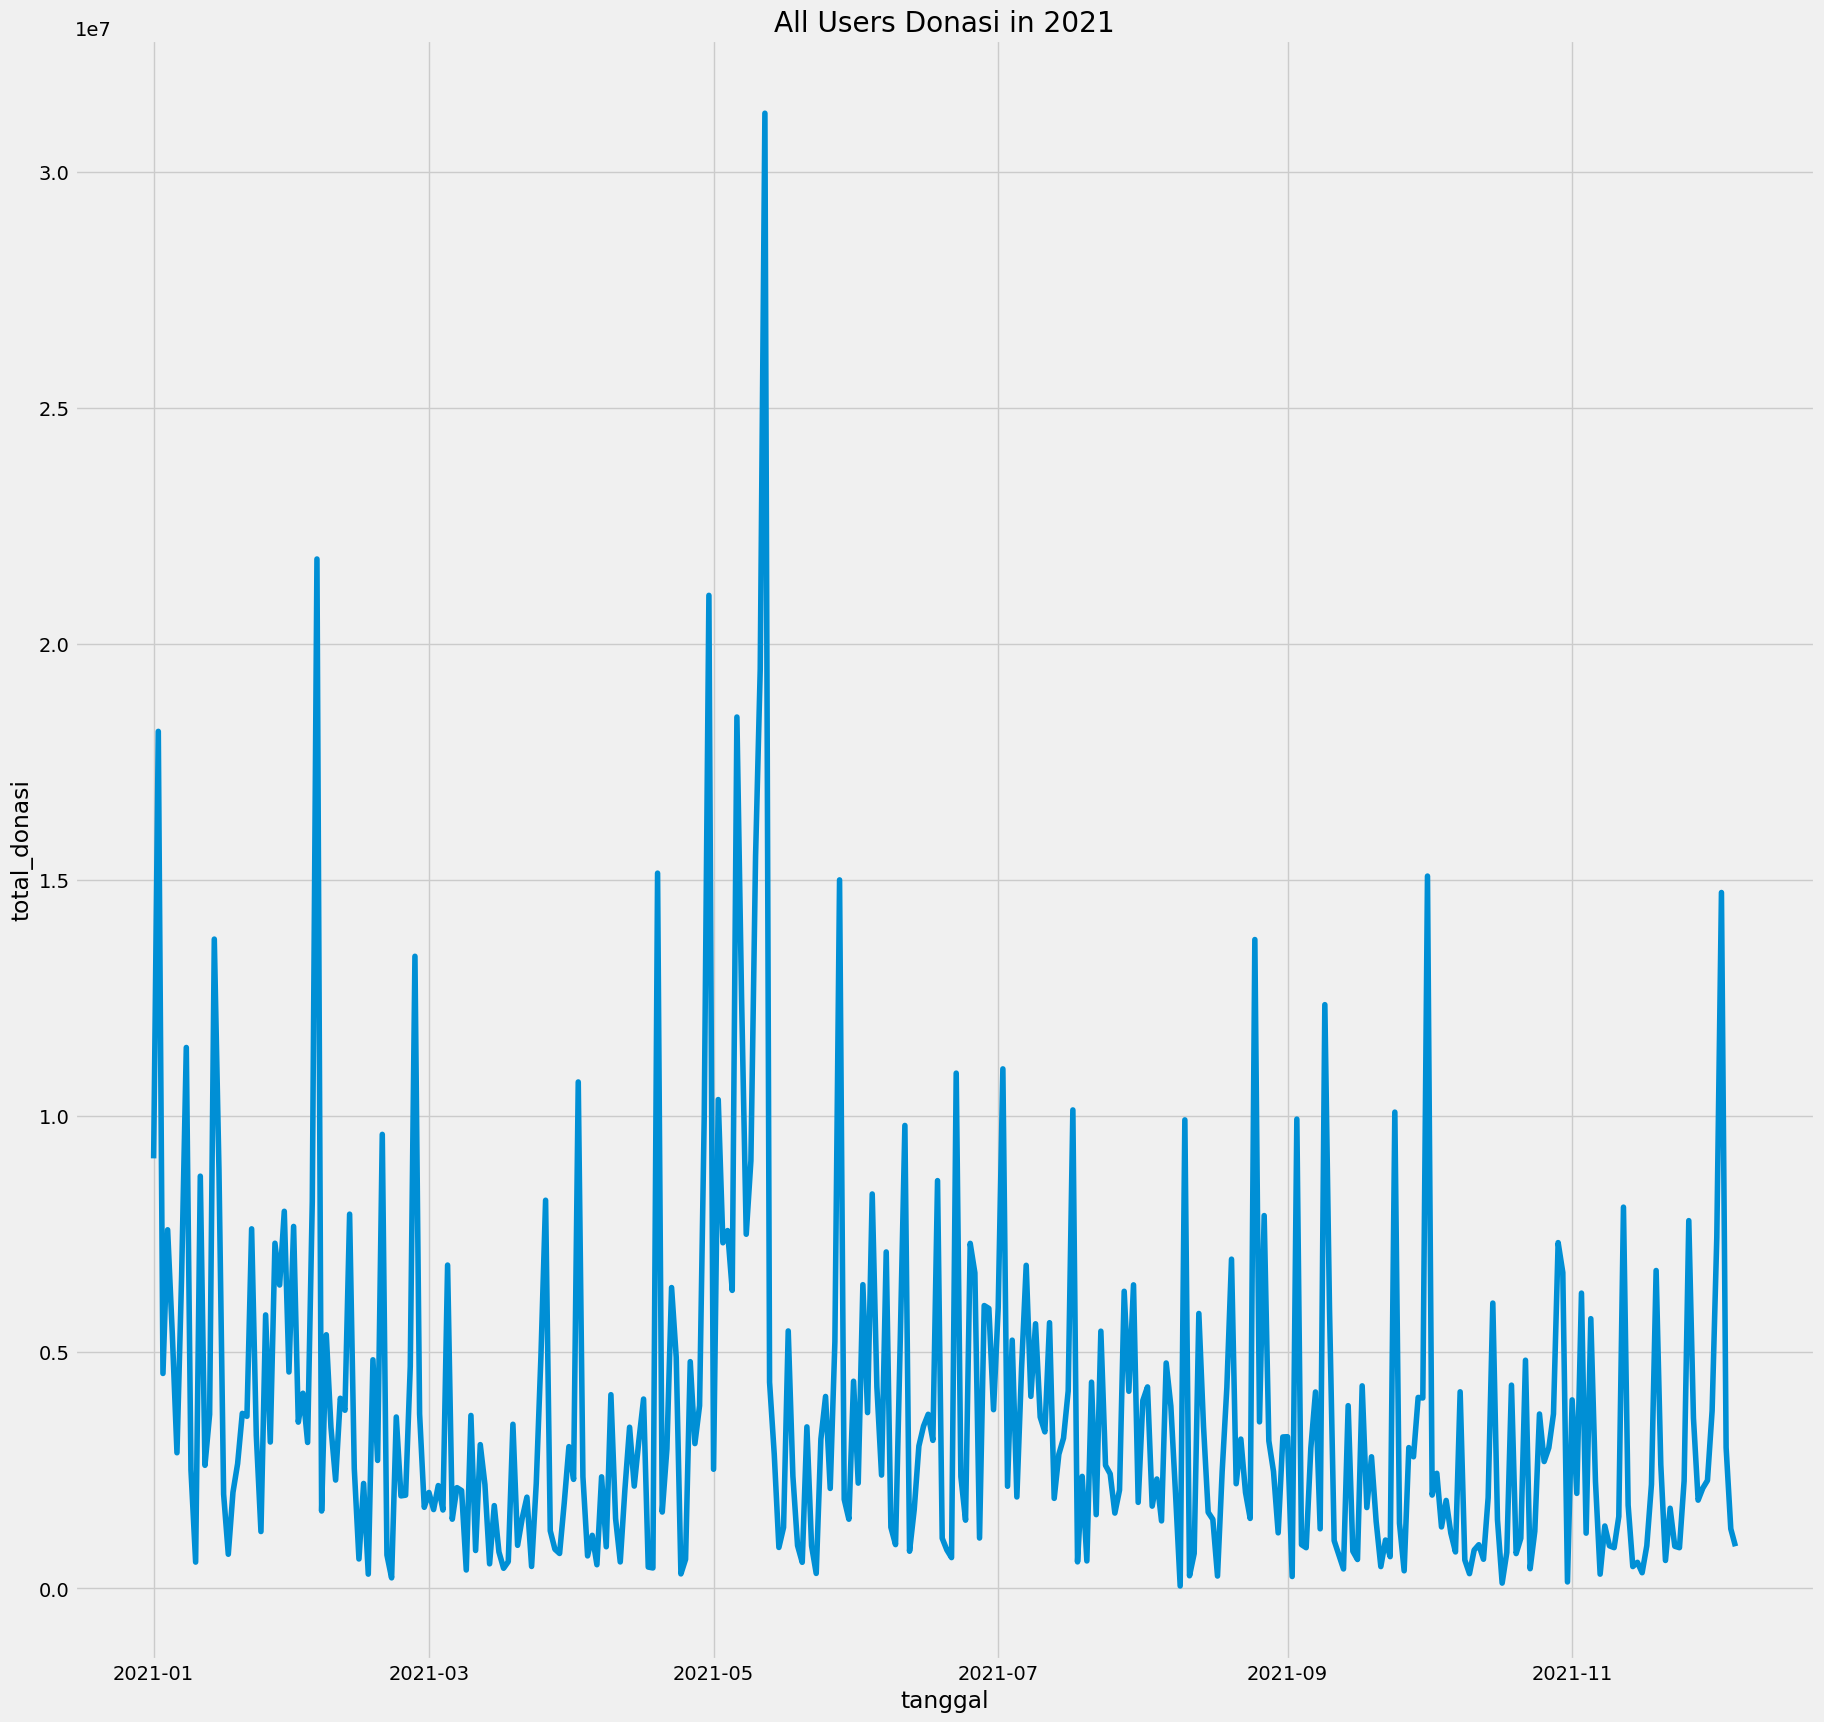

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,20))

# Add title
plt.title("All Users Donasi in 2021")

# Line chart showing Sales over Date mapped by Categorya
sns.lineplot(x='tanggal',y='total_donasi', data=list_of_online_sumbangan[2])

<Axes: title={'center': 'All Guest Zakat in 2021'}, xlabel='tanggal', ylabel='total_zakat'>

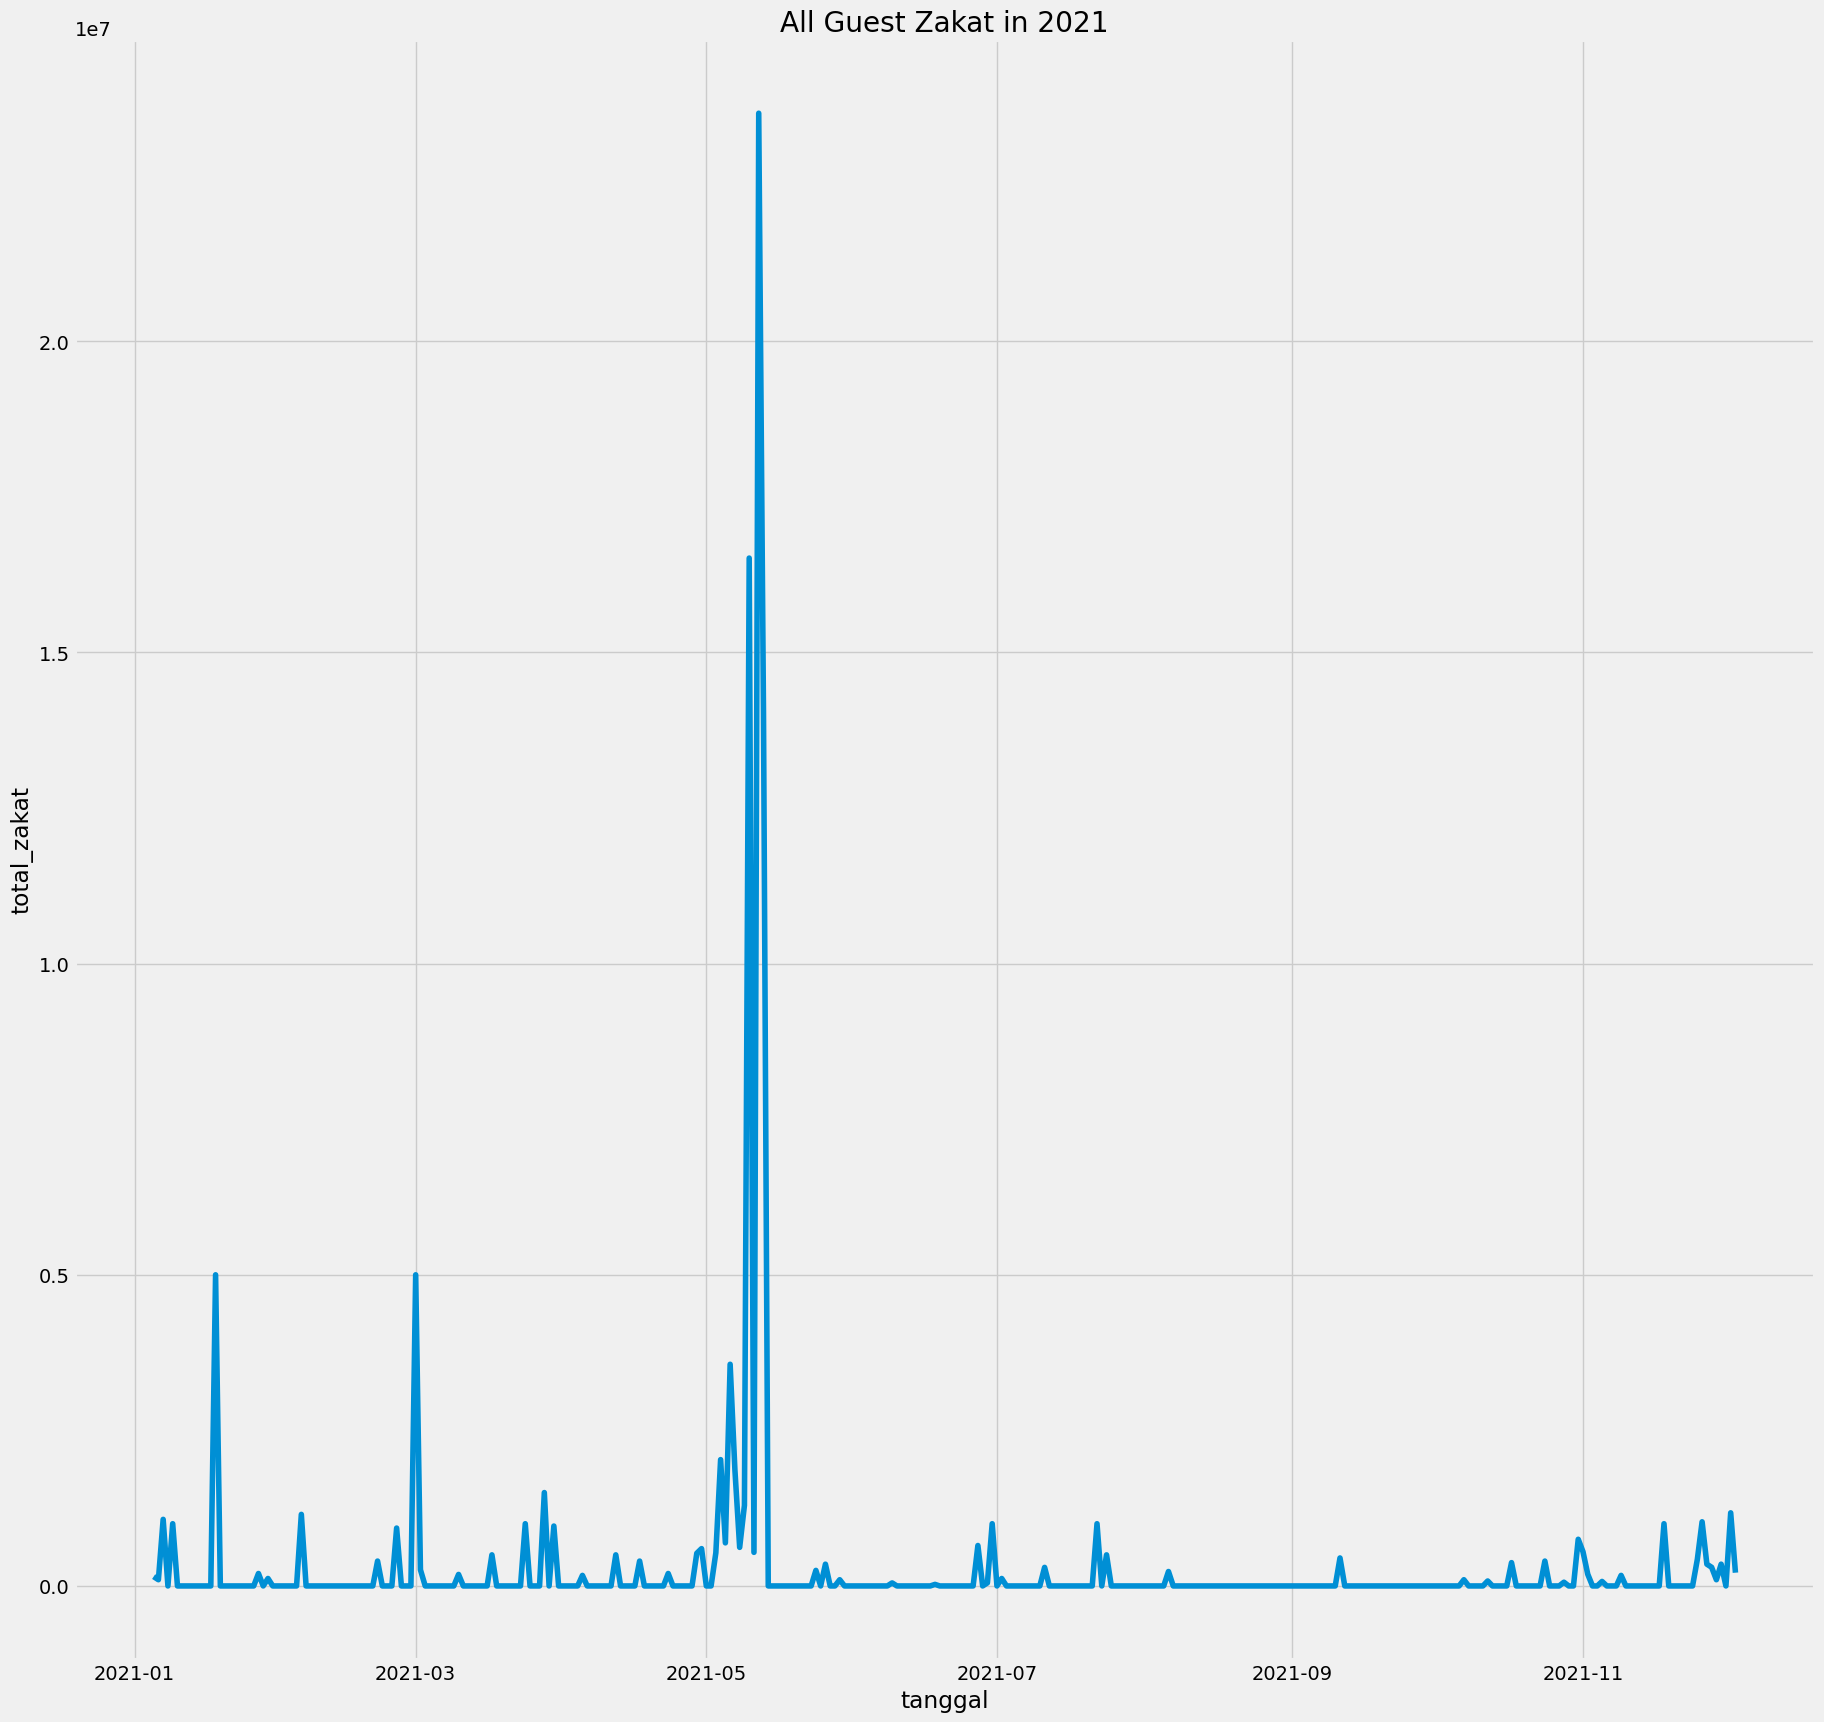

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,20))

# Add title
plt.title("All Guest Zakat in 2021")

# Line chart showing Sales over Date mapped by Category
sns.lineplot(x='tanggal',y='total_zakat', data=list_of_online_sumbangan[1])

<Axes: title={'center': 'All Guest Donasi in 2021'}, xlabel='tanggal', ylabel='total_donasi'>

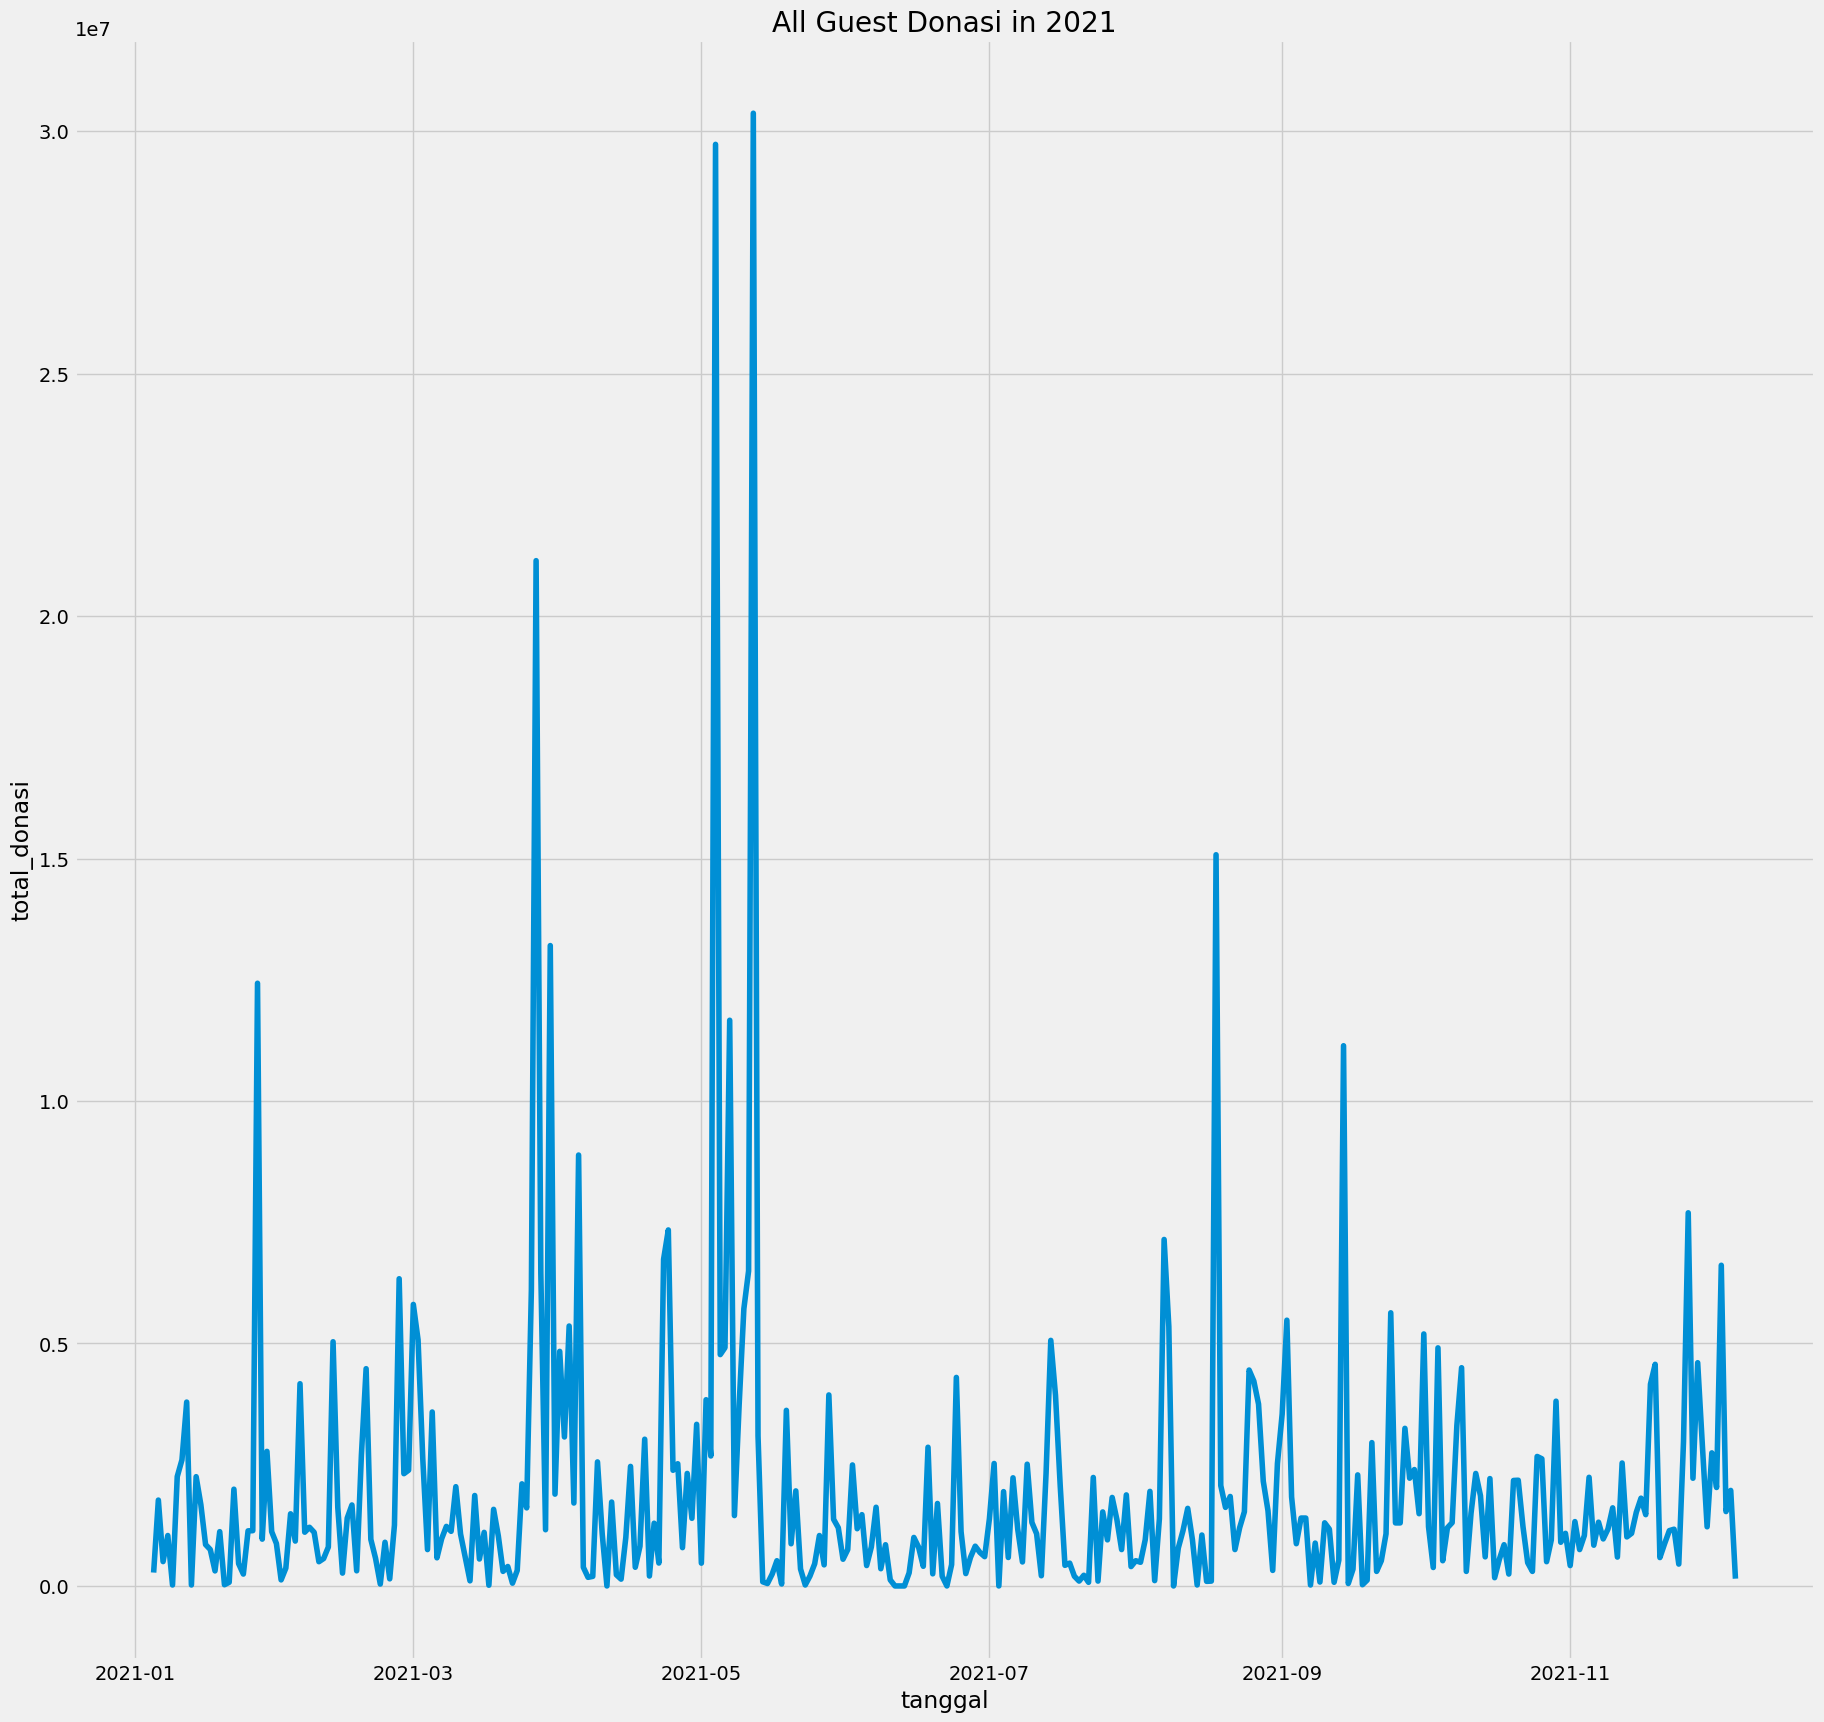

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,20))

# Add title
plt.title("All Guest Donasi in 2021")

# Line chart showing Sales over Date mapped by Category
sns.lineplot(x='tanggal',y='total_donasi', data=list_of_online_sumbangan[0])

In [ ]:
for i in range(4):
    nama_column = list_of_online_sumbangan[i].columns[0]
    list_of_online_sumbangan[i] = list_of_online_sumbangan[i][list_of_online_sumbangan[i][nama_column] != 0]
    list_of_online_sumbangan[i]

In [ ]:
list_of_online_sumbangan[0].min()

total_donasi    15000.0
dtype: float64

<Axes: title={'center': 'All Users Zakat in 2021'}, xlabel='tanggal', ylabel='total_zakat'>

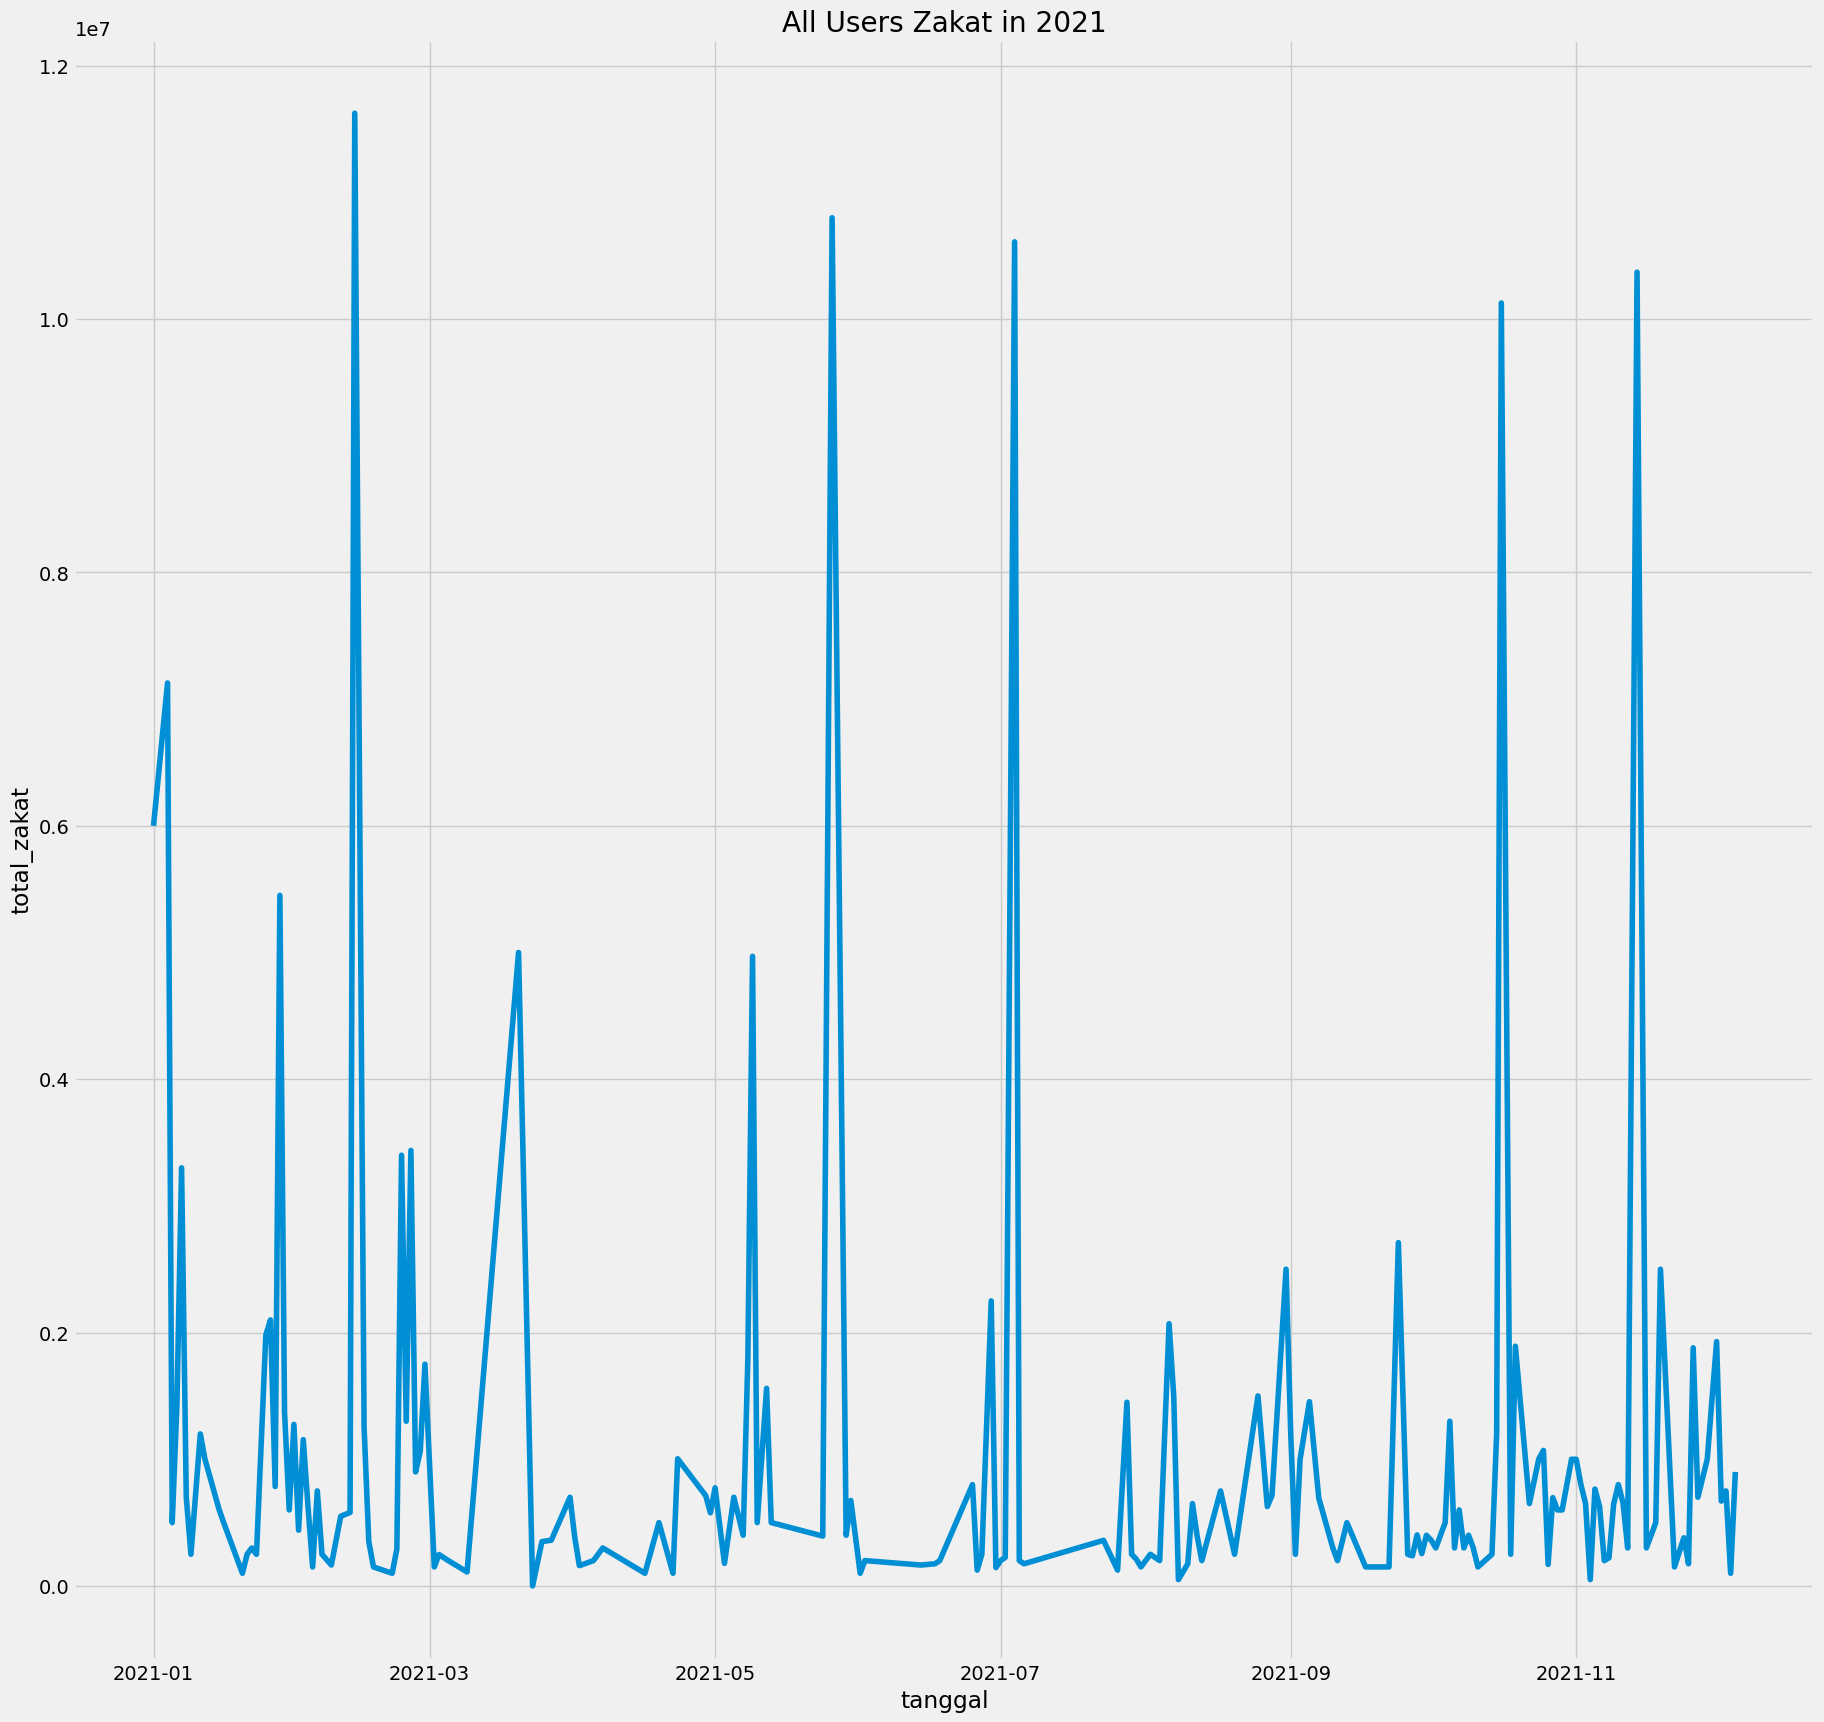

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,20))

# Add title
plt.title("All Users Zakat in 2021")

# Line chart showing Sales over Date mapped by Category
sns.lineplot(x='tanggal',y='total_zakat', data=list_of_online_sumbangan[3])

<Axes: title={'center': 'All Users Donasi in 2021'}, xlabel='tanggal', ylabel='total_donasi'>

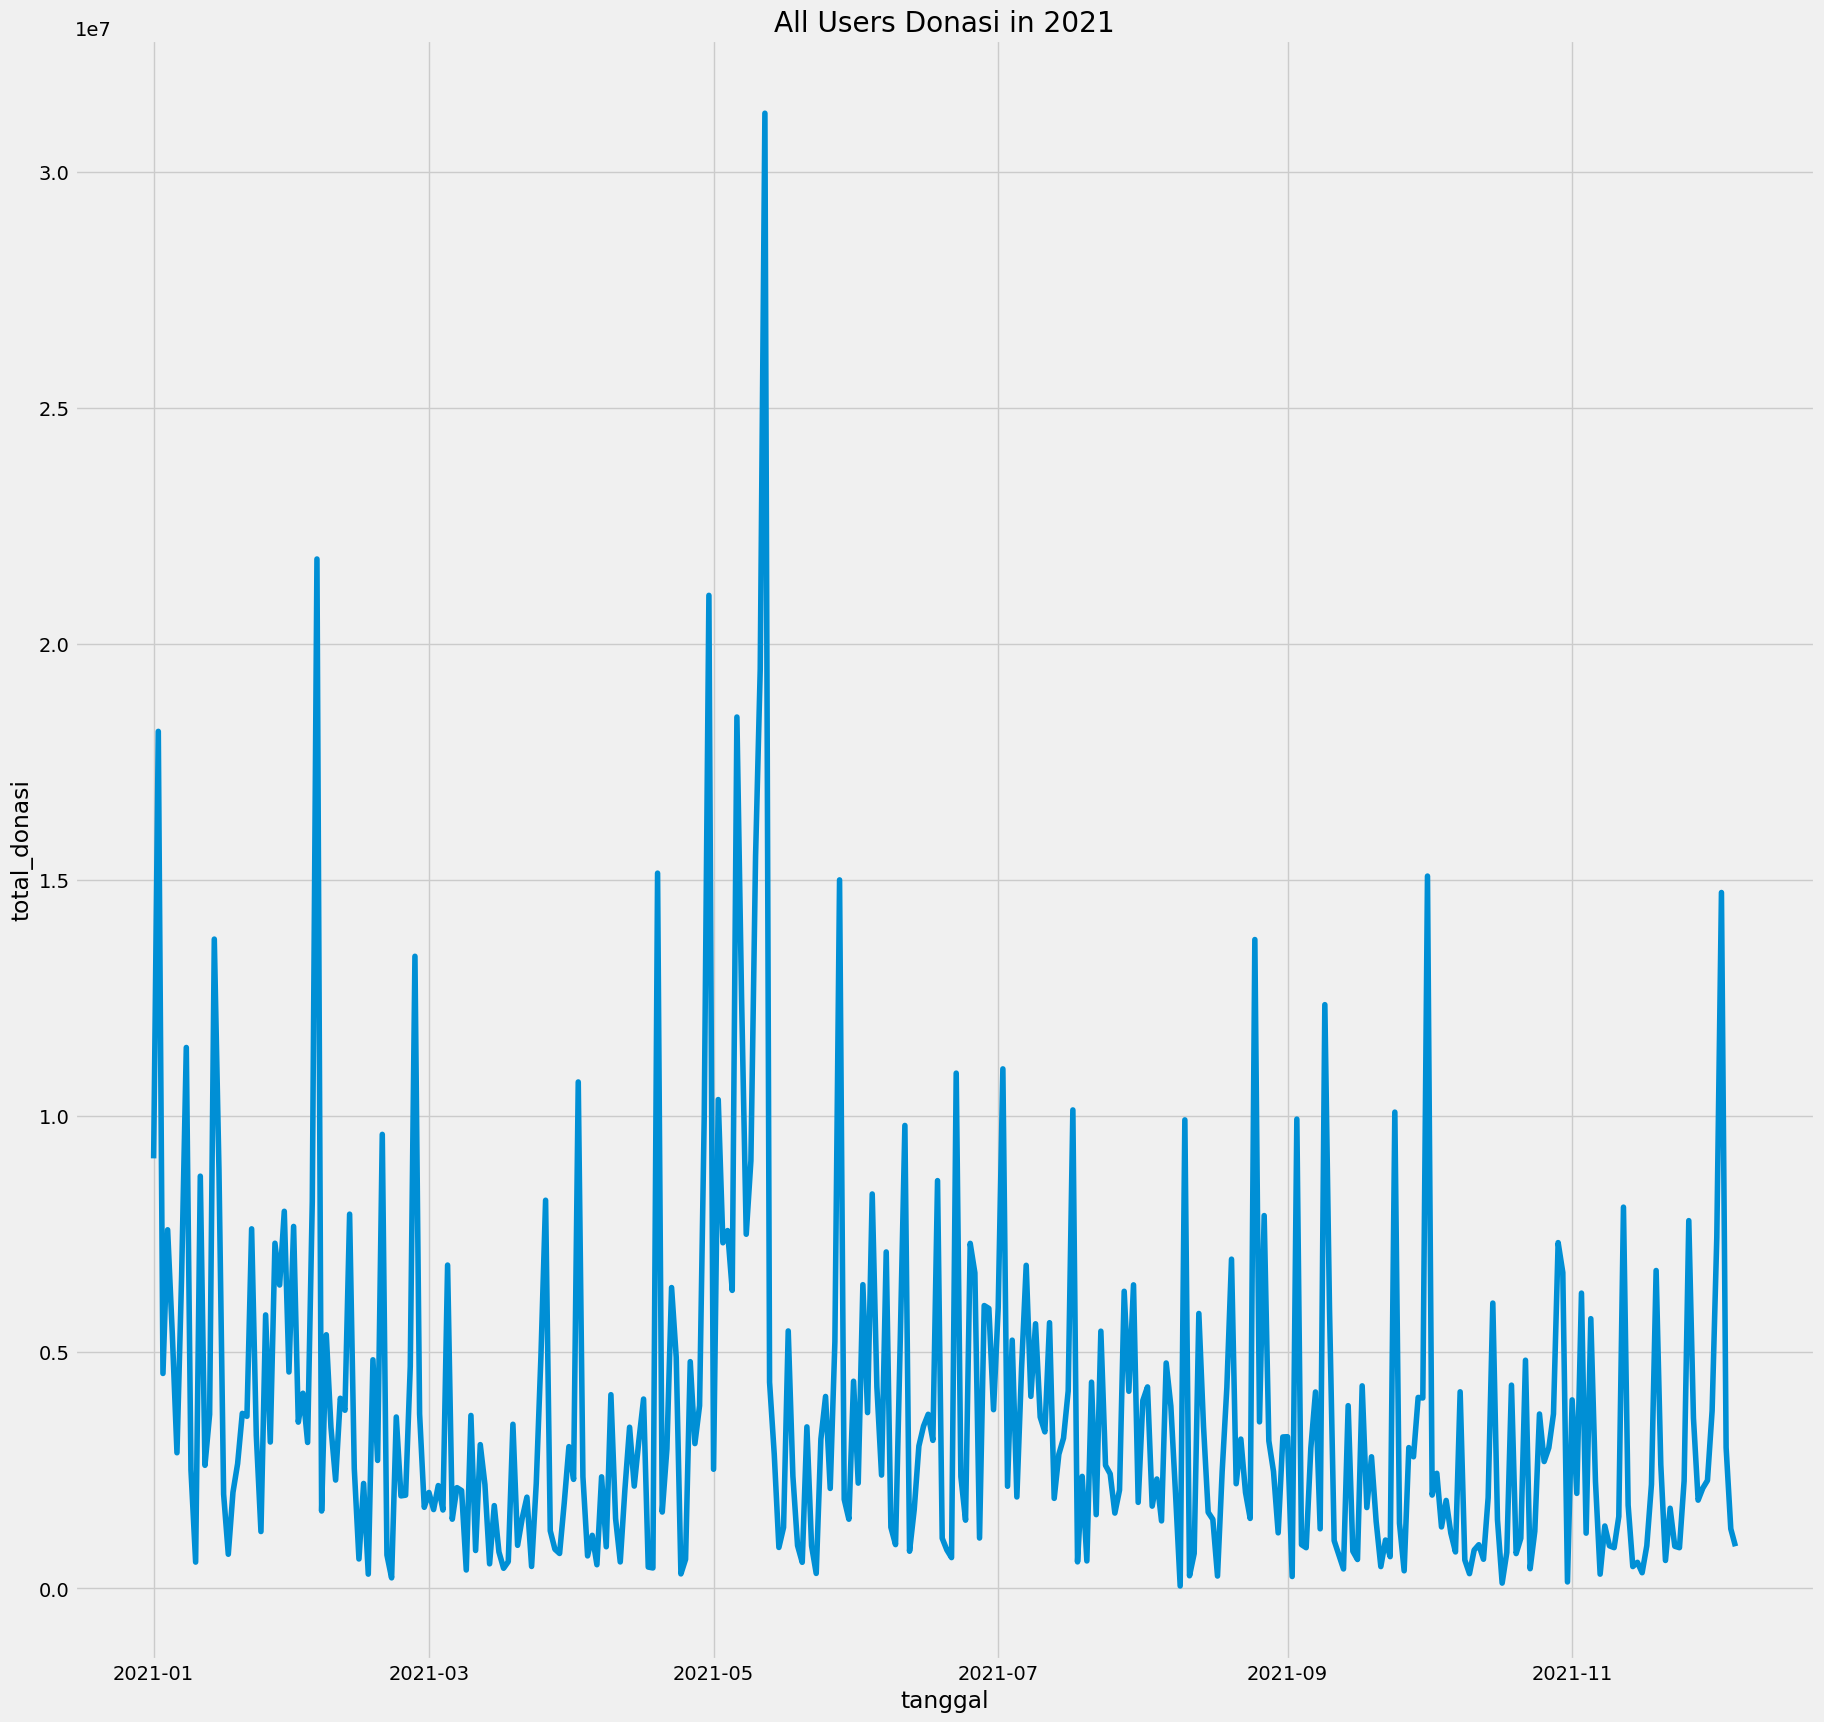

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,20))

# Add title
plt.title("All Users Donasi in 2021")

# Line chart showing Sales over Date mapped by Categorya
sns.lineplot(x='tanggal',y='total_donasi', data=list_of_online_sumbangan[2])

<Axes: title={'center': 'All Guest Zakat in 2021'}, xlabel='tanggal', ylabel='total_zakat'>

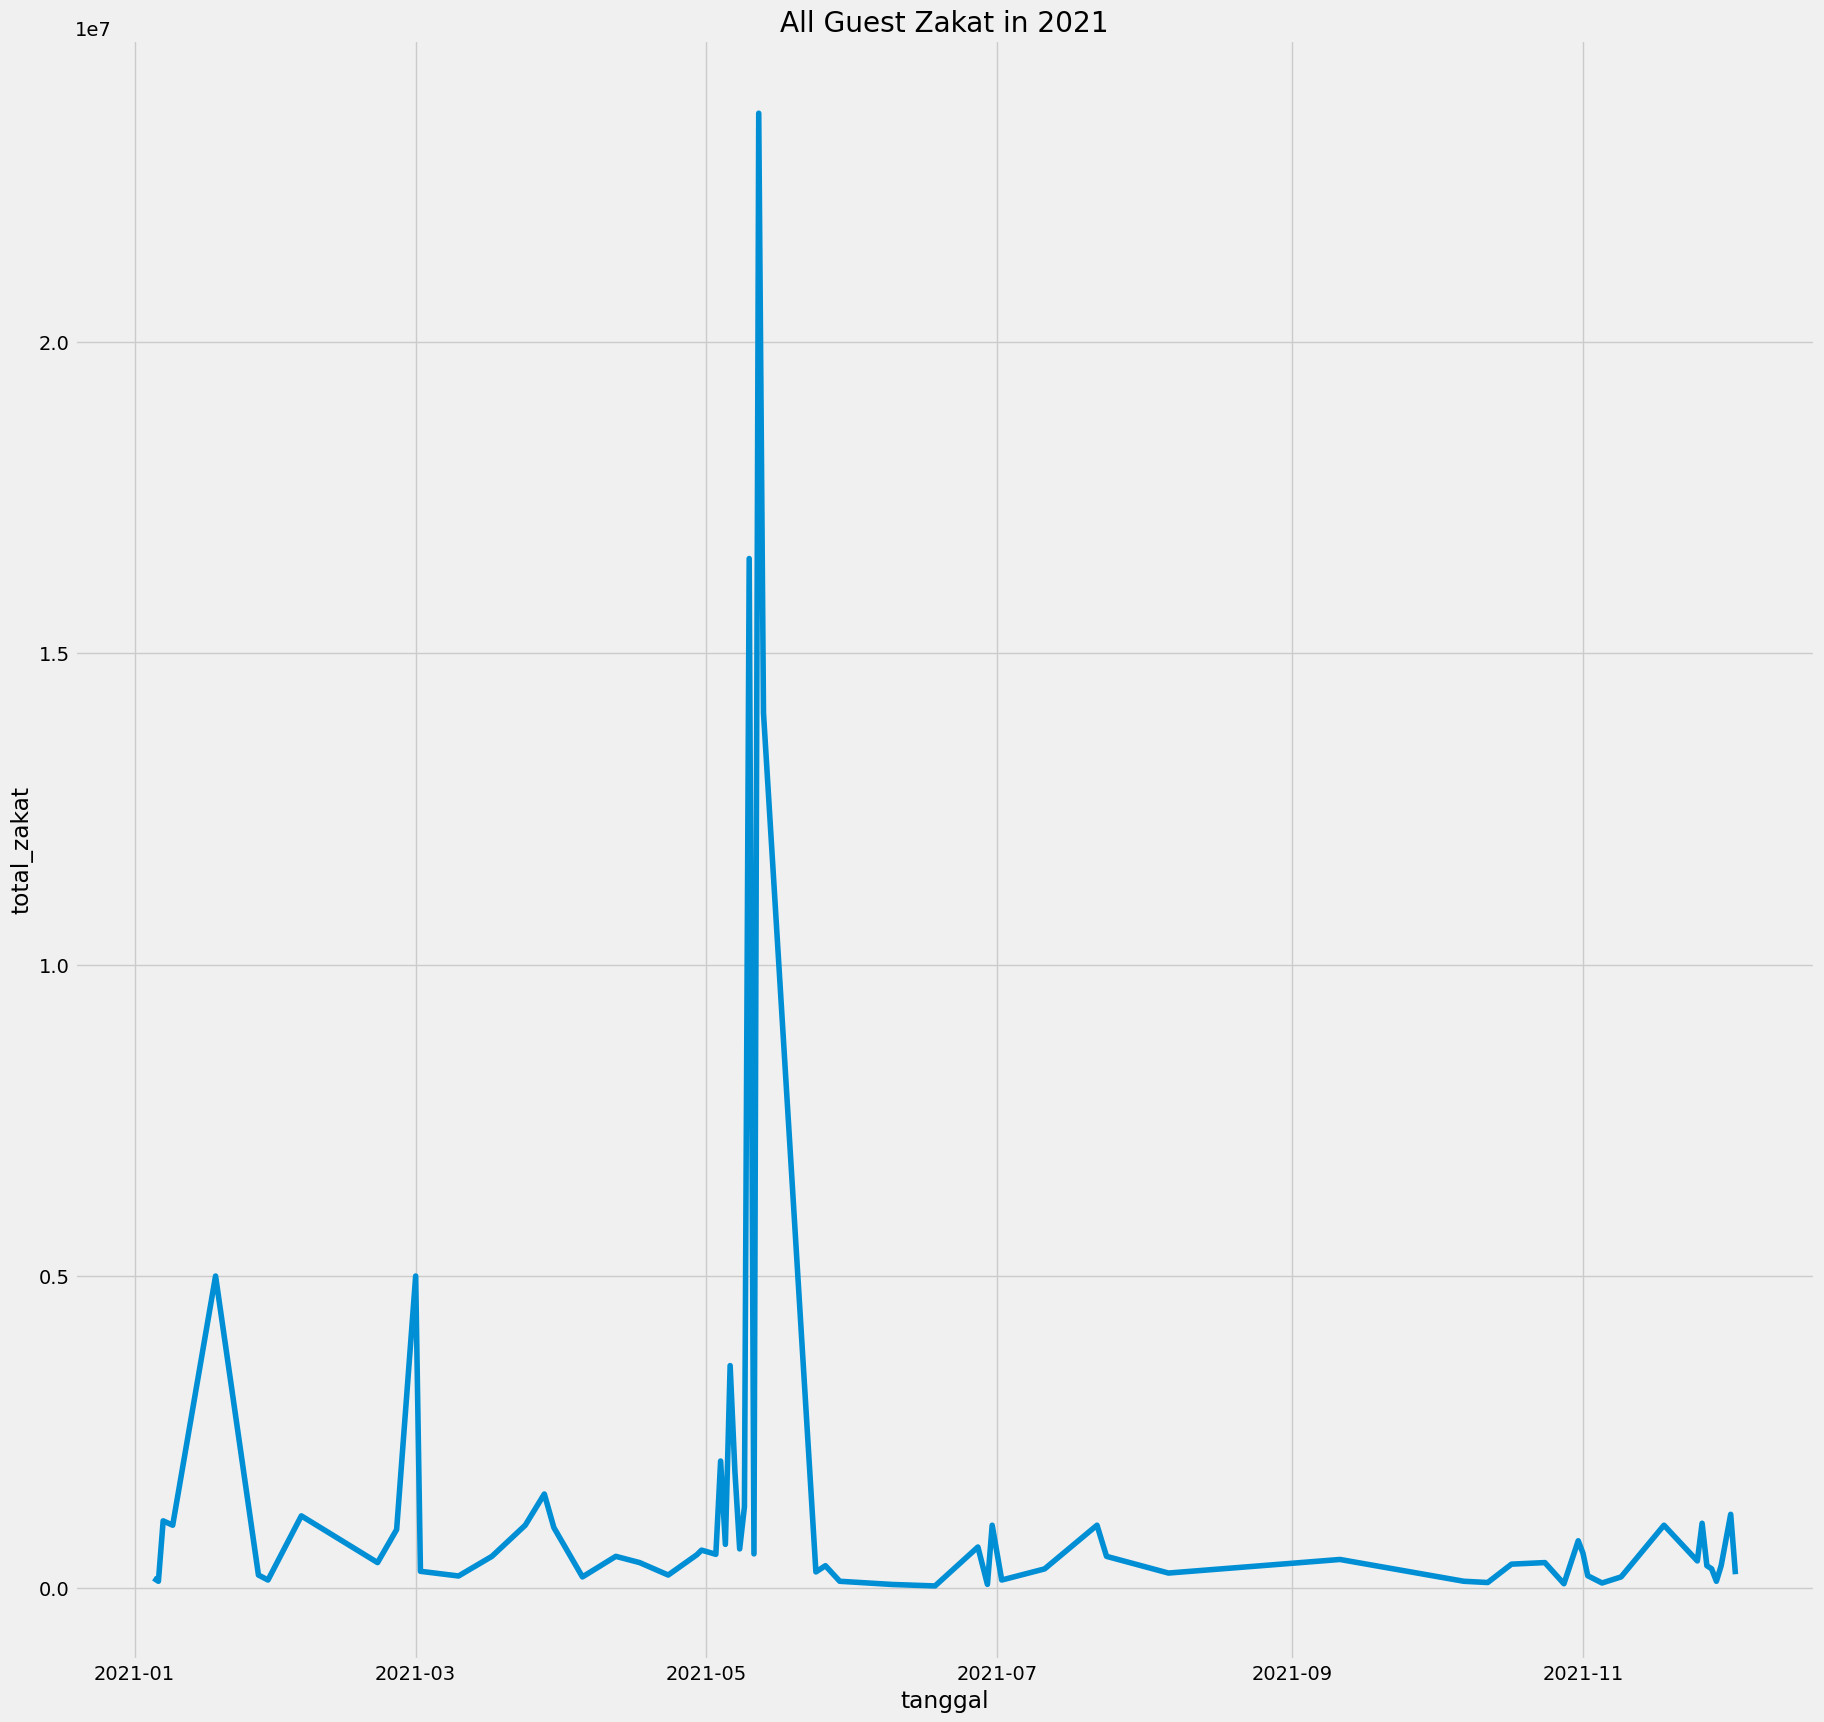

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,20))

# Add title
plt.title("All Guest Zakat in 2021")

# Line chart showing Sales over Date mapped by Category
sns.lineplot(x='tanggal',y='total_zakat', data=list_of_online_sumbangan[1])

<Axes: title={'center': 'All Guest Donasi in 2021'}, xlabel='tanggal', ylabel='total_donasi'>

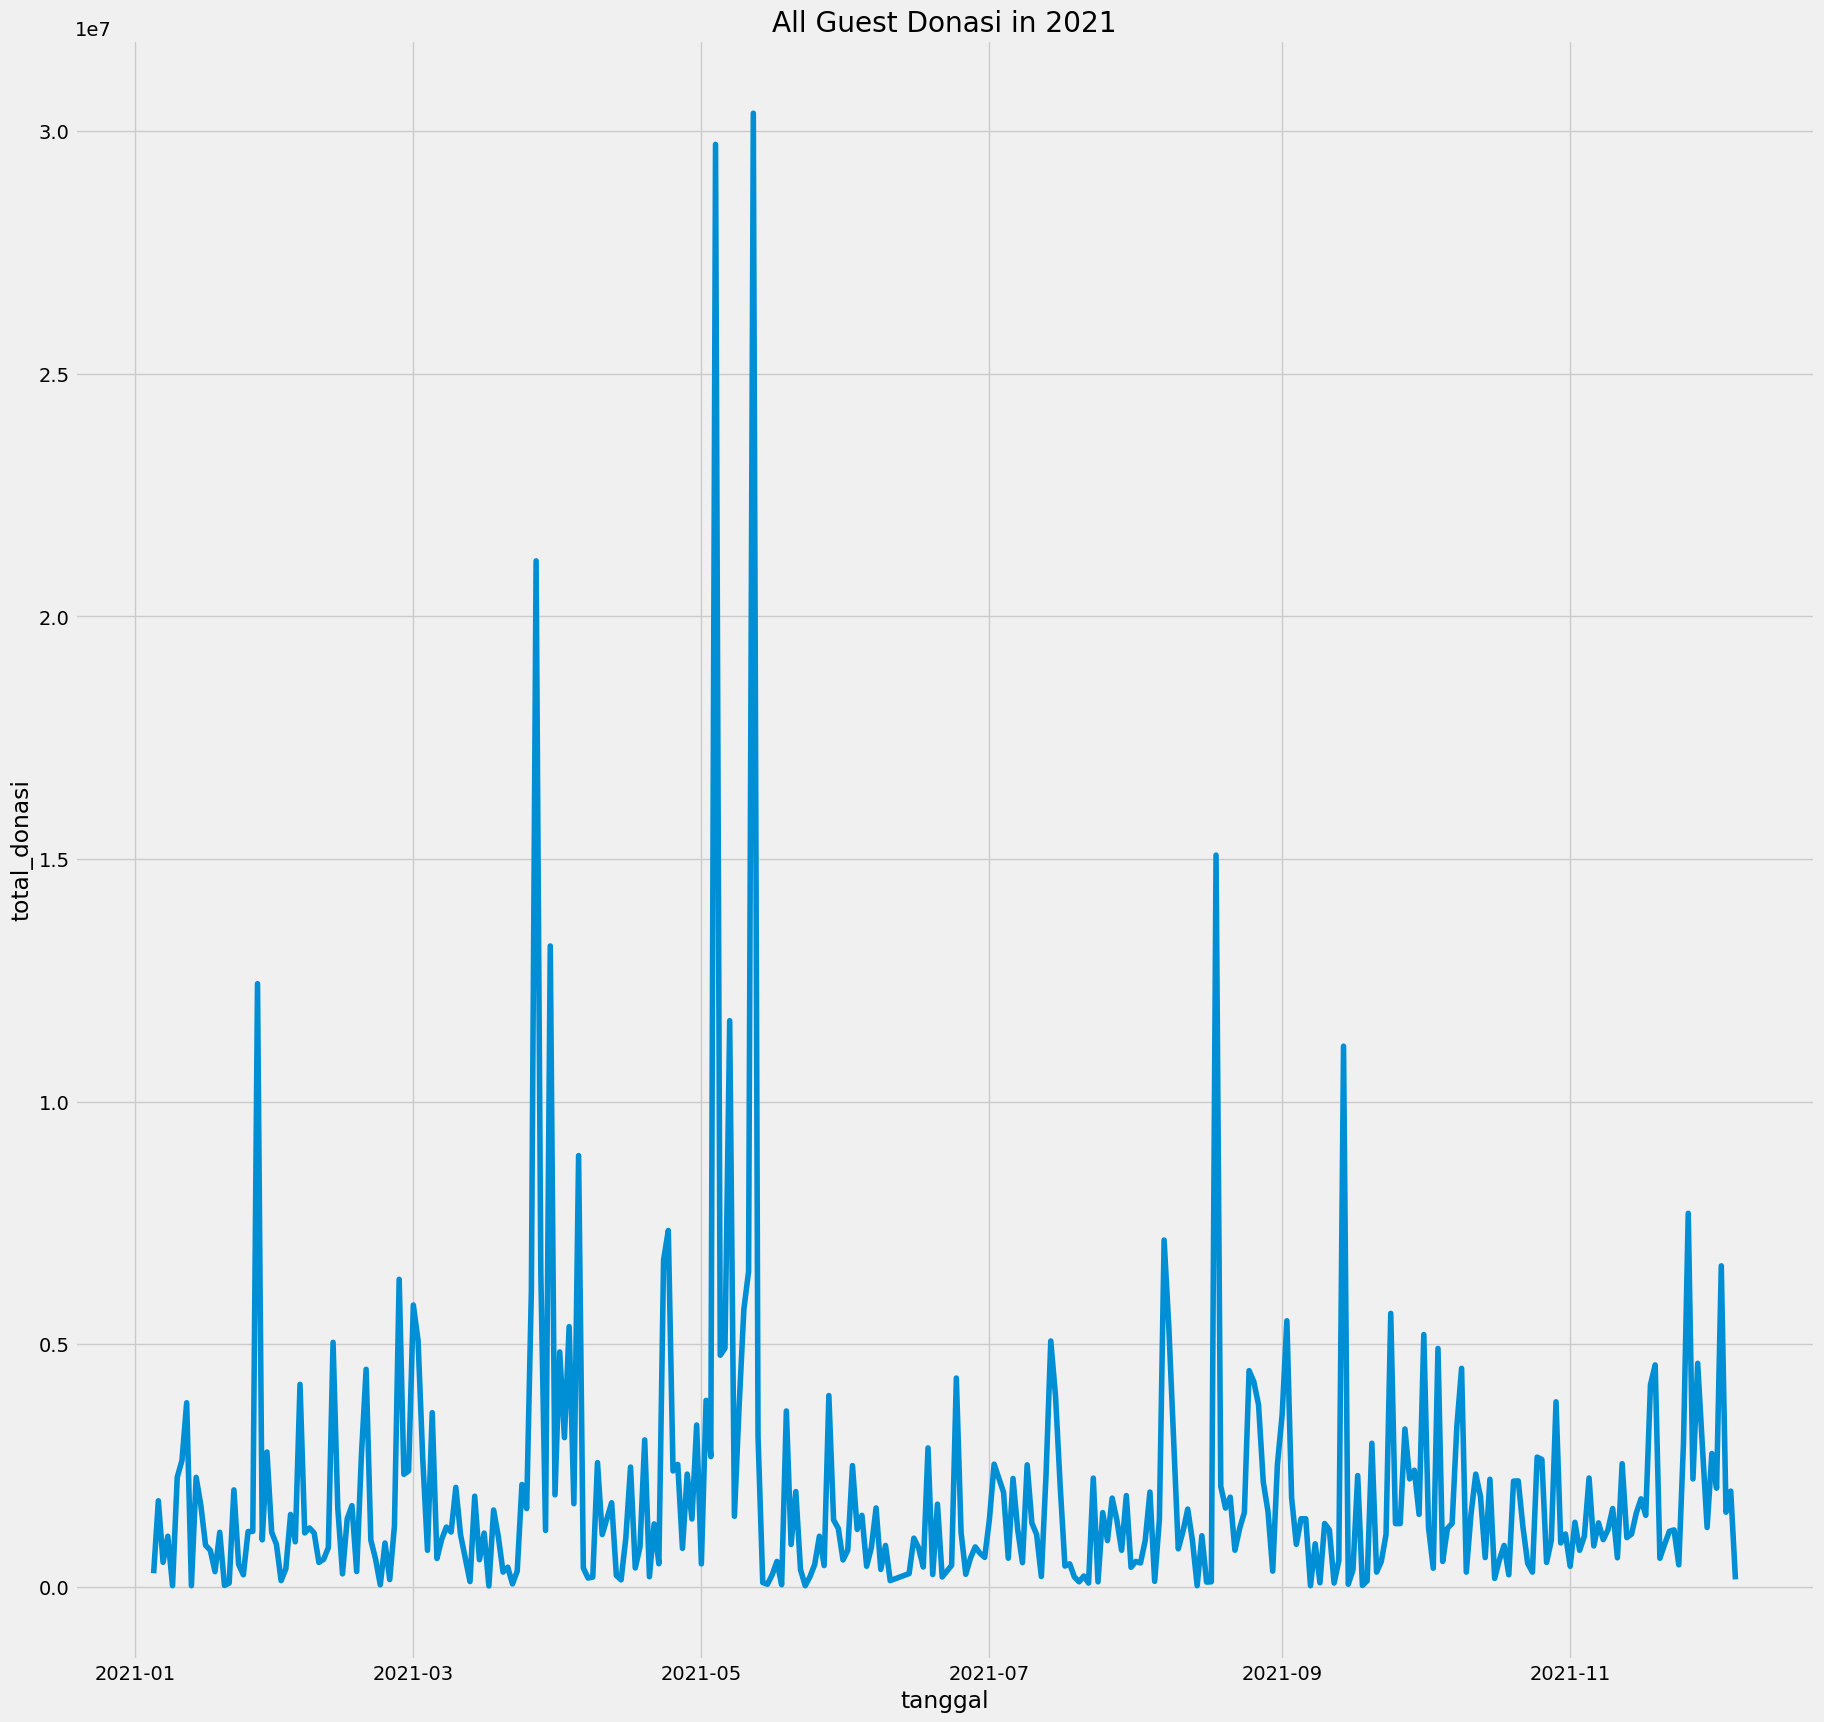

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,20))

# Add title
plt.title("All Guest Donasi in 2021")

# Line chart showing Sales over Date mapped by Category
sns.lineplot(x='tanggal',y='total_donasi', data=list_of_online_sumbangan[0])

# (Kalau ada) Buang outlier

In [ ]:
from scipy.stats import zscore

In [ ]:
list_of_new_df = []

In [ ]:
for sumbangan in list_of_online_sumbangan:
    z_scores = zscore(sumbangan)
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 3).all(axis=1)
    list_of_new_df.append(sumbangan[filtered_entries])

In [ ]:
list_of_new_df[1].max()

total_zakat    5000000.0
dtype: float64

In [ ]:
list_of_online_sumbangan[1].max()

total_zakat    23665892.0
dtype: float64

In [ ]:
list_of_new_df[2]

total_donasi
tanggal                 
2021-01-01     9104921.0
2021-01-03     4549815.0
2021-01-04     7592243.0
2021-01-05     5388900.0
2021-01-06     2870662.0
...                  ...
2021-12-02     7427500.0
2021-12-03    14735138.0
2021-12-04     2980042.0
2021-12-05     1260000.0
2021-12-06      890000.0

[334 rows x 1 columns]

# (Kalau masih ada outlier) buang pakai cara manual tadi

In [ ]:
list_of_new_df[0] = list_of_online_sumbangan[0].loc[list_of_online_sumbangan[0].total_donasi <= 1000000]

In [ ]:
test_ratio = 0.2


for idx,sumbangan in enumerate(list_of_new_df):
    number = idx+1

    test_set_size = int(len(sumbangan) * test_ratio)

    globals()['donation%s' % number+'_train'] = sumbangan[0:-test_set_size].copy()
    globals()['donation%s' % number+'_test'] = sumbangan[-test_set_size:].copy()

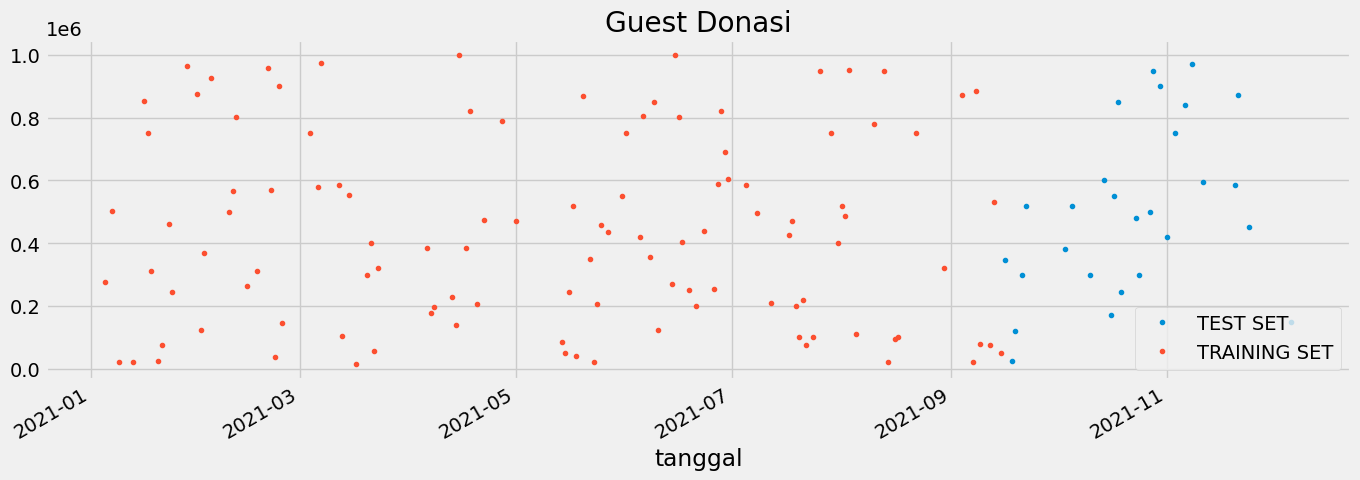

In [ ]:
# Plot train and test so you can see where we have split
donation1_test \
    .rename(columns={donation1_test.columns[0]: 'TEST SET'}) \
    .join(donation1_train.rename(columns={donation1_train.columns[0]: 'TRAINING SET'}),
          how='outer') \
    .plot.line(figsize=(15,5), title=list_of_name[0], style='.')
plt.show()

In [ ]:
# Format data for prophet model using ds and y
donation1_train.reset_index() \
    .rename(columns={'tanggal':'ds',
                     donation1_train.columns[0]:'y'}).head()

ds         y
0 2021-01-05  275802.0
1 2021-01-07  502000.0
2 2021-01-09   20000.0
3 2021-01-13   20000.0
4 2021-01-16  853000.0

In [ ]:
for idx in range(4):
    number = idx+1
    globals()['donation%s' % number+'_train'].reset_index(inplace=True)
    globals()['donation%s' % number+'_train'].rename(columns={
        globals()['donation%s' % number+'_train'].columns[0]:'ds',
        globals()['donation%s' % number+'_train'].columns[1]:'y'},inplace=True)

    missing_values_count = globals()['donation%s' % number+'_train'].isnull().sum()
    print(number)
    print(missing_values_count[0:2])

1
ds    0
y     0
dtype: int64
2
ds    0
y     0
dtype: int64
3
ds    0
y     0
dtype: int64
4
ds    0
y     0
dtype: int64


In [ ]:
donation1_train

ds         y
0   2021-01-05  275802.0
1   2021-01-07  502000.0
2   2021-01-09   20000.0
3   2021-01-13   20000.0
4   2021-01-16  853000.0
..         ...       ...
105 2021-09-08  884500.0
106 2021-09-09   80000.0
107 2021-09-12   75000.0
108 2021-09-13  530947.0
109 2021-09-15   50000.0

[110 rows x 2 columns]

# MODELLING

In [ ]:
# Setup and train model and fit
from prophet import Prophet
for idx in range(4):
    number = idx+1
    print(number)
    globals()['model%s' % number] = Prophet()
    globals()['model%s' % number].fit(globals()['donation%s' % number+'_train'])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp371uy31w/7e38cbtc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp371uy31w/3nutmz7k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25164', 'data', 'file=/tmp/tmp371uy31w/7e38cbtc.json', 'init=/tmp/tmp371uy31w/3nutmz7k.json', 'output', 'file=/tmp/tmp371uy31w/prophet_modelbbc3hvud/prophet_model-20240224095159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:51:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:51:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonalit

1
2


09:51:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:51:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp371uy31w/c97pz8ba.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp371uy31w/zq0kmzey.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22988', 'data', 'file=/tmp/tmp371uy31w/c97pz8ba.json', 'init=/tmp/tmp371uy31w/zq0kmzey.json', 'output', 'file=/tmp/tmp371uy31w/prophet_modelwevsamk8/prophet_model-20240224095159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:51:59 - cmdstanpy - INFO - Chain [1] 

3
4


09:52:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
for idx in range(4):
    number = idx+1
    globals()['donation%s' % number+'_test'].reset_index(inplace=True)
    globals()['donation%s' % number+'_test'].rename(columns={
        globals()['donation%s' % number+'_test'].columns[0]:'ds',
        globals()['donation%s' % number+'_test'].columns[1]:'y'},inplace=True)

    missing_values_count = globals()['donation%s' % number+'_test'].isnull().sum()
    print(number)
    print(missing_values_count[0:2])

1
ds    0
y     0
dtype: int64
2
ds    0
y     0
dtype: int64
3
ds    0
y     0
dtype: int64
4
ds    0
y     0
dtype: int64


In [ ]:
donation1_test

ds         y
0  2021-09-16  345000.0
1  2021-09-18   25000.0
2  2021-09-19  120000.0
3  2021-09-21  300000.0
4  2021-09-22  520000.0
5  2021-10-03  380503.0
6  2021-10-05  520235.0
7  2021-10-10  300000.0
8  2021-10-14  600000.0
9  2021-10-16  170000.0
10 2021-10-17  550000.0
11 2021-10-18  850045.0
12 2021-10-19  245000.0
13 2021-10-23  480000.0
14 2021-10-24  300000.0
15 2021-10-27  500000.0
16 2021-10-28  950000.0
17 2021-10-30  900752.0
18 2021-11-01  420000.0
19 2021-11-03  750000.0
20 2021-11-06  840000.0
21 2021-11-08  970000.0
22 2021-11-11  595700.0
23 2021-11-20  585000.0
24 2021-11-21  873000.0
25 2021-11-24  450964.0
26 2021-12-06  150000.0

In [ ]:
for idx in range(4):
    number = idx+1
    globals()['donation%s' % number+'_new_test'] = pd.DataFrame()
    globals()['donation%s' % number+'_new_test']['ds'] = globals()['donation%s' % number+'_test']['ds']

In [ ]:
donation1_new_test

ds
0  2021-09-16
1  2021-09-18
2  2021-09-19
3  2021-09-21
4  2021-09-22
5  2021-10-03
6  2021-10-05
7  2021-10-10
8  2021-10-14
9  2021-10-16
10 2021-10-17
11 2021-10-18
12 2021-10-19
13 2021-10-23
14 2021-10-24
15 2021-10-27
16 2021-10-28
17 2021-10-30
18 2021-11-01
19 2021-11-03
20 2021-11-06
21 2021-11-08
22 2021-11-11
23 2021-11-20
24 2021-11-21
25 2021-11-24
26 2021-12-06

In [ ]:
# Predict on training set with model
for idx in range(4):
    number = idx+1
    globals()['donation%s' % number+'_test_fcst'] = globals()['model%s' % number].predict(globals()['donation%s' % number+'_new_test'])
    print(number)

1
2
3
4


In [ ]:
donation1_test_fcst.head()

ds          trend     yhat_lower     yhat_upper    trend_lower  \
0 2021-09-16  421354.062232   78924.364444  839968.314882  421354.002590   
1 2021-09-18  420871.775975  -18288.989442  744720.717232  420871.458889   
2 2021-09-19  420630.632846  113168.578675  870038.280080  420629.971863   
3 2021-09-21  420148.346588   67445.271034  843919.161806  420147.177651   
4 2021-09-22  419907.203459  -35473.866813  712613.092497  419905.463591   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  421354.153172    52486.760000          52486.760000          52486.760000   
1  420872.116352   -64382.561639         -64382.561639         -64382.561639   
2  420631.390045    75577.677968          75577.677968          75577.677968   
3  420149.647513    15557.976324          15557.976324          15557.976324   
4  419909.110053   -93237.082730         -93237.082730         -93237.082730   

         weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0  52486.760000  52486.760000  52486.760000                   0.0   
1 -64382.561639 -64382.561639 -64382.561639                   0.0   
2  75577.677968  75577.677968  75577.677968                   0.0   
3  15557.976324  15557.976324  15557.976324                   0.0   
4 -93237.082730 -93237.082730 -93237.082730                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper           yhat  
0                         0.0                         0.0  473840.822232  
1                         0.0                         0.0  356489.214336  
2                         0.0                         0.0  496208.310814  
3                         0.0                         0.0  435706.322912  
4                         0.0                         0.0  326670.120729

In [ ]:
donation1_test.head()

ds         y
0 2021-09-16  345000.0
1 2021-09-18   25000.0
2 2021-09-19  120000.0
3 2021-09-21  300000.0
4 2021-09-22  520000.0

In [ ]:
help(model1.plot)

Help on method plot in module prophet.forecaster:

plot(fcst, ax=None, uncertainty=True, plot_cap=True, xlabel='ds', ylabel='y', figsize=(10, 6), include_legend=False) method of prophet.forecaster.Prophet instance
    Plot the Prophet forecast.
    
    Parameters
    ----------
    fcst: pd.DataFrame output of self.predict.
    ax: Optional matplotlib axes on which to plot.
    uncertainty: Optional boolean to plot uncertainty intervals.
    plot_cap: Optional boolean indicating if the capacity should be shown
        in the figure, if available.
    xlabel: Optional label name on X-axis
    ylabel: Optional label name on Y-axis
    figsize: Optional tuple width, height in inches.
    include_legend: Optional boolean to add legend to the plot.
    
    Returns
    -------
    A matplotlib figure.



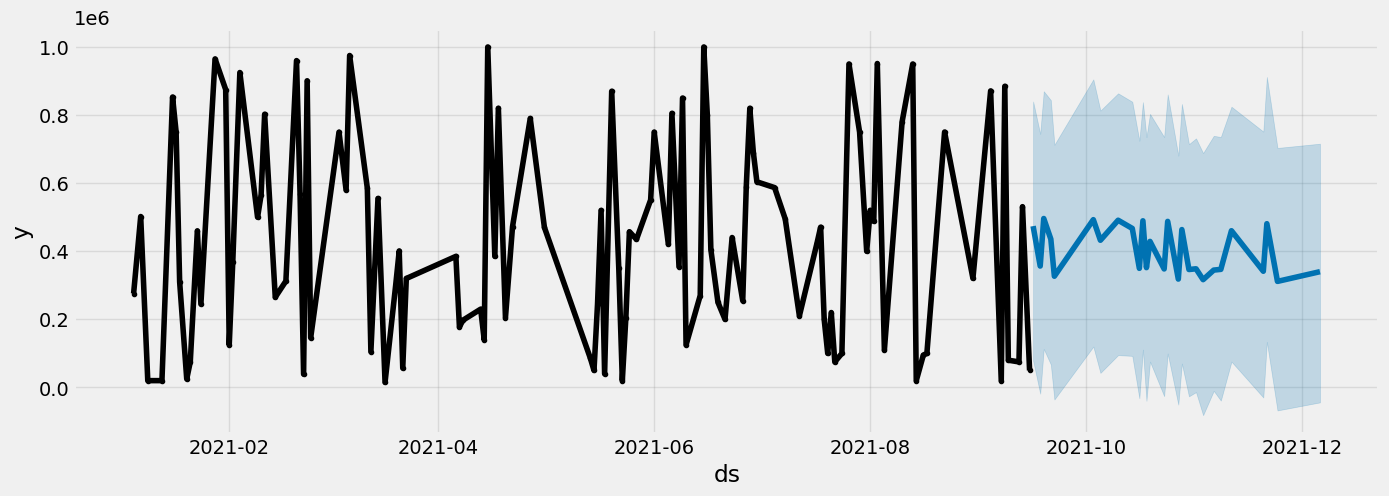

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(donation1_train['ds'], donation1_train['y'], color='black')
fig = model1.plot(donation1_test_fcst,
                 ax=ax)
plt.show()

In [ ]:
donation1_test

ds         y
0  2021-09-16  345000.0
1  2021-09-18   25000.0
2  2021-09-19  120000.0
3  2021-09-21  300000.0
4  2021-09-22  520000.0
5  2021-10-03  380503.0
6  2021-10-05  520235.0
7  2021-10-10  300000.0
8  2021-10-14  600000.0
9  2021-10-16  170000.0
10 2021-10-17  550000.0
11 2021-10-18  850045.0
12 2021-10-19  245000.0
13 2021-10-23  480000.0
14 2021-10-24  300000.0
15 2021-10-27  500000.0
16 2021-10-28  950000.0
17 2021-10-30  900752.0
18 2021-11-01  420000.0
19 2021-11-03  750000.0
20 2021-11-06  840000.0
21 2021-11-08  970000.0
22 2021-11-11  595700.0
23 2021-11-20  585000.0
24 2021-11-21  873000.0
25 2021-11-24  450964.0
26 2021-12-06  150000.0

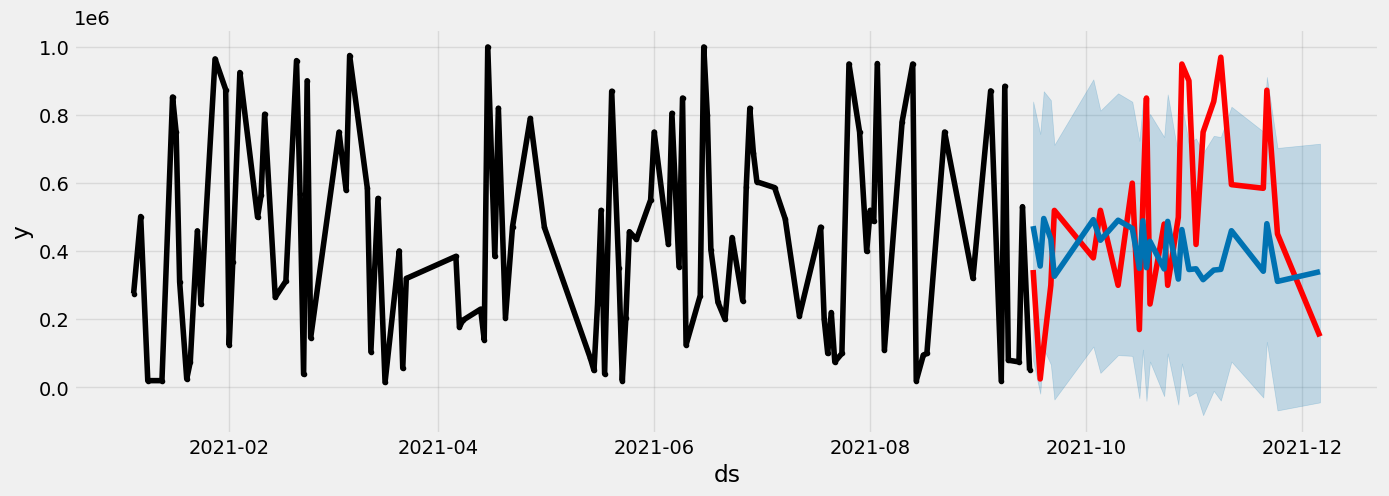

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(donation1_train['ds'], donation1_train['y'], color='black')
ax.plot(donation1_test['ds'], donation1_test['y'], color='red')
fig = model1.plot(donation1_test_fcst, ax=ax)

In [ ]:
((len(donation1_new_test) - 9)/ len(donation1_new_test)) * 100

66.66666666666666

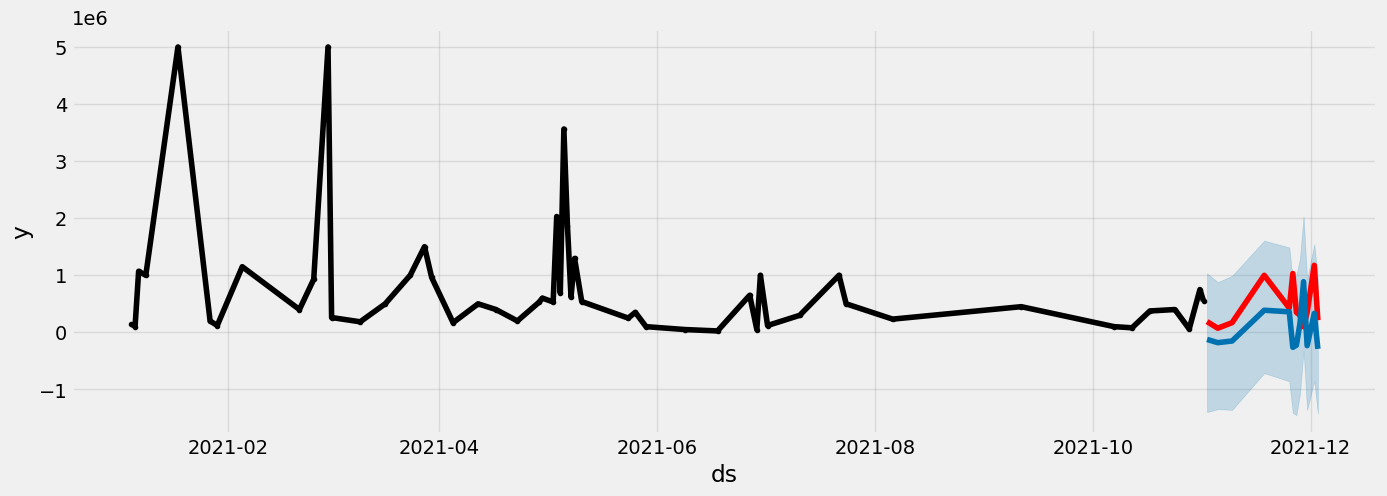

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(donation2_train['ds'], donation2_train['y'], color='black')
ax.plot(donation2_test['ds'], donation2_test['y'], color='red')
fig = model2.plot(donation2_test_fcst, ax=ax)

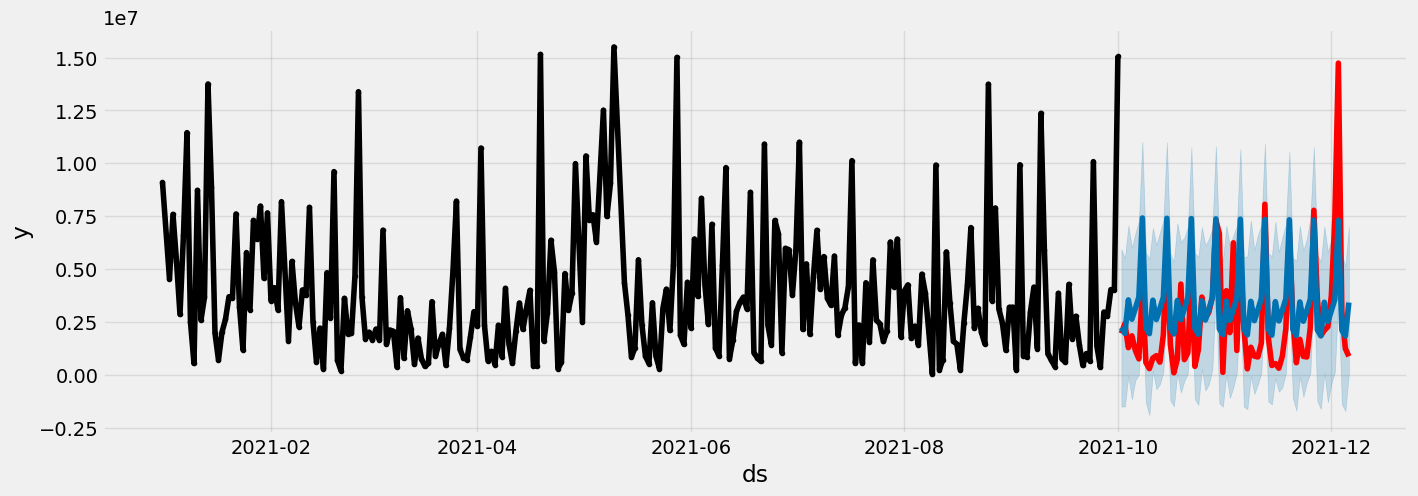

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(donation3_train['ds'], donation3_train['y'], color='black')
ax.plot(donation3_test['ds'], donation3_test['y'], color='red')
fig = model3.plot(donation3_test_fcst, ax=ax)

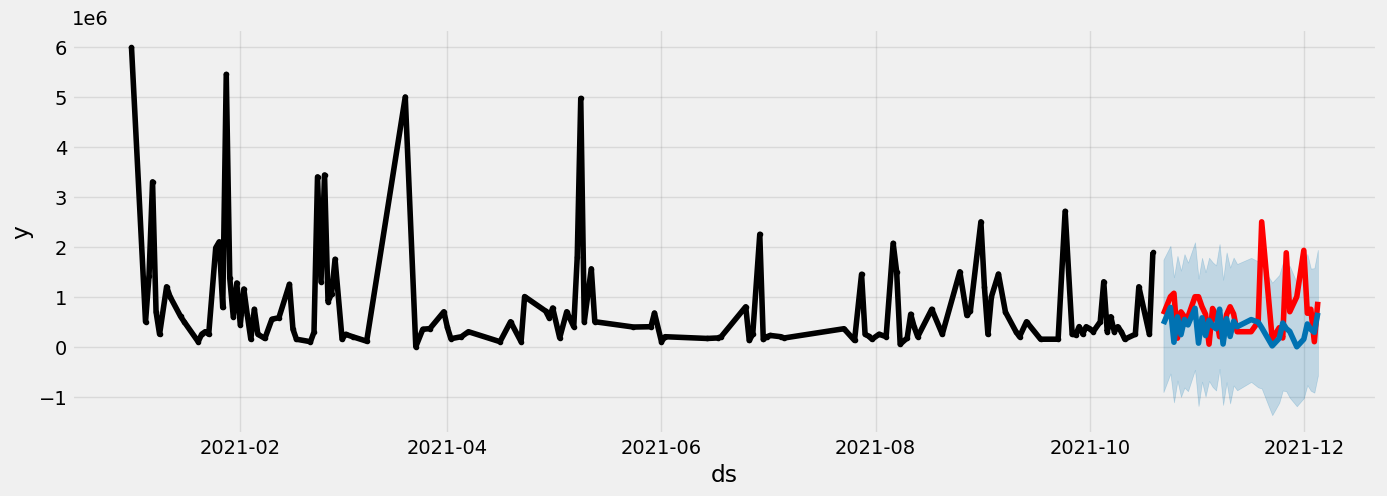

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(donation4_train['ds'], donation4_train['y'], color='black')
ax.plot(donation4_test['ds'], donation4_test['y'], color='red')
fig = model4.plot(donation4_test_fcst, ax=ax)

In [ ]:
list_of_new_df[0]

total_donasi
tanggal                 
2021-01-05      275802.0
2021-01-07      502000.0
2021-01-09       20000.0
2021-01-13       20000.0
2021-01-16      853000.0
...                  ...
2021-11-11      595700.0
2021-11-20      585000.0
2021-11-21      873000.0
2021-11-24      450964.0
2021-12-06      150000.0

[137 rows x 1 columns]

In [ ]:
for i in range(4):
    number = i + 1
    globals()['df%s' % number+'_test'] = pd.DataFrame(columns = ['ds'])
    globals()['df%s' % number+'_test']['ds'] = pd.date_range(start=list_of_new_df[0].index.max() + dt.timedelta(days=1) , periods = 30, freq='D')

In [ ]:
list_of_new_df[0].index.max() + dt.timedelta(days=1)

Timestamp('2021-12-07 00:00:00')

In [ ]:
list_of_name[0]

'Guest Donasi'

In [ ]:
df1_test

ds
0  2021-12-07
1  2021-12-08
2  2021-12-09
3  2021-12-10
4  2021-12-11
5  2021-12-12
6  2021-12-13
7  2021-12-14
8  2021-12-15
9  2021-12-16
10 2021-12-17
11 2021-12-18
12 2021-12-19
13 2021-12-20
14 2021-12-21
15 2021-12-22
16 2021-12-23
17 2021-12-24
18 2021-12-25
19 2021-12-26
20 2021-12-27
21 2021-12-28
22 2021-12-29
23 2021-12-30
24 2021-12-31
25 2022-01-01
26 2022-01-02
27 2022-01-03
28 2022-01-04
29 2022-01-05

In [ ]:
# Predict on training set with model
for idx in range(4):
    number = idx+1
    globals()['donation%s' % number+'_after_last_day'] = globals()['model%s' % number].predict(globals()['df%s' % number+'_test'])
    print(number)

1
2
3
4


In [ ]:
donation1_after_last_day

ds          trend     yhat_lower     yhat_upper    trend_lower  \
0  2021-12-07  401580.325664   48804.542902  797079.380870  401580.325664   
1  2021-12-08  401339.182535  -58301.047753  706524.549535  401339.182535   
2  2021-12-09  401098.039406  113439.119385  816070.133813  401098.013284   
3  2021-12-10  400856.896277   99244.440365  869688.833633  400856.810357   
4  2021-12-11  400615.753148  -31775.891163  699731.225186  400615.593616   
5  2021-12-12  400374.610019  116791.806402  850256.390204  400374.362955   
6  2021-12-13  400133.466890  -26610.975632  702263.282298  400133.129953   
7  2021-12-14  399892.323761   18519.021767  780575.208337  399891.877770   
8  2021-12-15  399651.180632  -77465.853423  690228.511989  399650.601271   
9  2021-12-16  399410.037504   84492.599306  830850.887517  399409.320779   
10 2021-12-17  399168.894375  129717.816864  862331.226564  399167.988266   
11 2021-12-18  398927.751246  -62950.164644  693053.932173  398926.703369   
12 2021-12-19  398686.608117   89216.581429  853888.215357  398685.430336   
13 2021-12-20  398445.464988  -45708.599790  692857.516157  398444.051100   
14 2021-12-21  398204.321859   28032.834026  784292.991991  398202.665771   
15 2021-12-22  397963.178730  -61874.559332  705663.449294  397961.323170   
16 2021-12-23  397722.035601   78871.242599  809626.195556  397719.986397   
17 2021-12-24  397480.892472   86385.002130  887244.110646  397478.655046   
18 2021-12-25  397239.749344  -59162.180374  736740.162506  397237.312879   
19 2021-12-26  396998.606215  104729.433567  852334.023886  396995.959609   
20 2021-12-27  396757.463086  -52374.539850  721497.105486  396754.619493   
21 2021-12-28  396516.319957   65070.383928  815717.148857  396513.155822   
22 2021-12-29  396275.176828  -90839.708765  660518.175694  396271.689338   
23 2021-12-30  396034.033699   61070.535454  837299.517145  396030.318164   
24 2021-12-31  395792.890570   98583.938265  854107.668718  395788.864403   
25 2022-01-01  395551.747441  -67533.152639  738310.582178  395547.478636   
26 2022-01-02  395310.604312   84068.406670  843904.549300  395306.053063   
27 2022-01-03  395069.461184  -57584.504898  711060.266710  395064.671711   
28 2022-01-04  394828.318055   33059.435561  798359.635212  394823.262887   
29 2022-01-05  394587.174926  -82076.652948  691482.219156  394581.892084   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   401580.325664    15557.976325          15557.976325          15557.976325   
1   401339.182535   -93237.082730         -93237.082730         -93237.082730   
2   401098.054556    52486.760000          52486.760000          52486.760000   
3   400856.945020    75778.454148          75778.454148          75778.454148   
4   400615.851266   -64382.561639         -64382.561639         -64382.561639   
5   400374.783771    75577.677968          75577.677968          75577.677968   
6   400133.736839   -61781.224072         -61781.224072         -61781.224072   
7   399892.703167    15557.976325          15557.976325          15557.976325   
8   399651.667592   -93237.082730         -93237.082730         -93237.082730   
9   399410.629848    52486.760000          52486.760000          52486.760000   
10  399169.650951    75778.454147          75778.454147          75778.454147   
11  398928.648825   -64382.561639         -64382.561639         -64382.561639   
12  398687.671165    75577.677968          75577.677968          75577.677968   
13  398446.750271   -61781.224072         -61781.224072         -61781.224072   
14  398205.816584    15557.976325          15557.976325          15557.976325   
15  397964.874417   -93237.082730         -93237.082730         -93237.082730   
16  397723.913147    52486.760000          52486.760000          52486.760000   
17  397483.001286    75778.454147          75778.454147          75778.454147   
18  397242.084967   -64382.561638         -64382.561638         -64382.561638   
19 

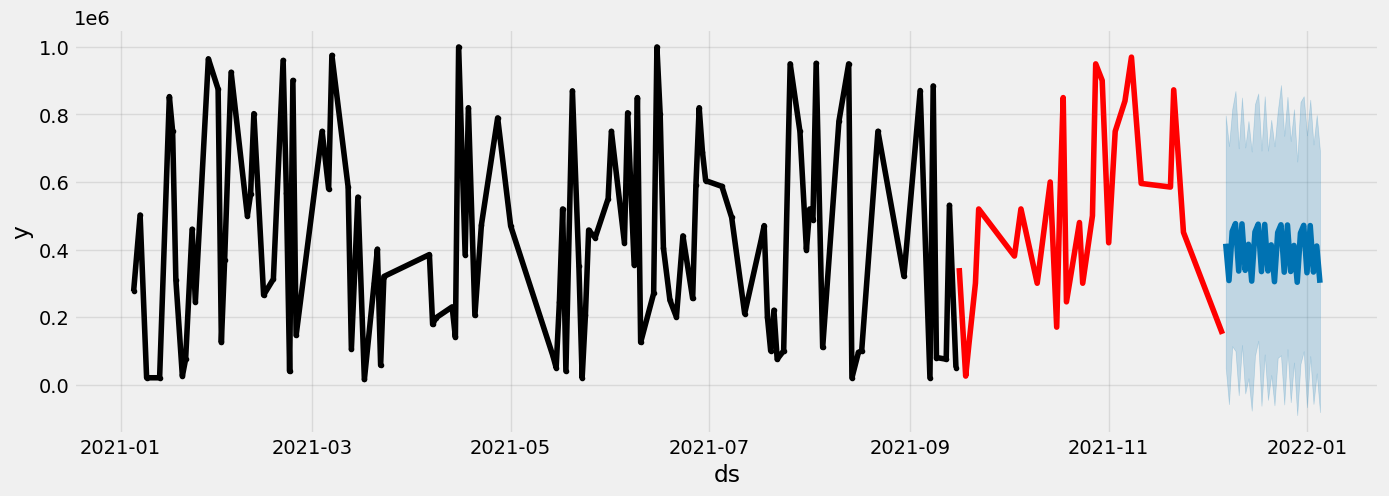

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(donation1_train['ds'], donation1_train['y'], color='black')
ax.plot(donation1_test['ds'], donation1_test['y'], color='r')
fig = model1.plot(donation1_after_last_day,
                 ax=ax)
plt.show()

In [ ]:
list_of_name[3]

'Users Zakat'

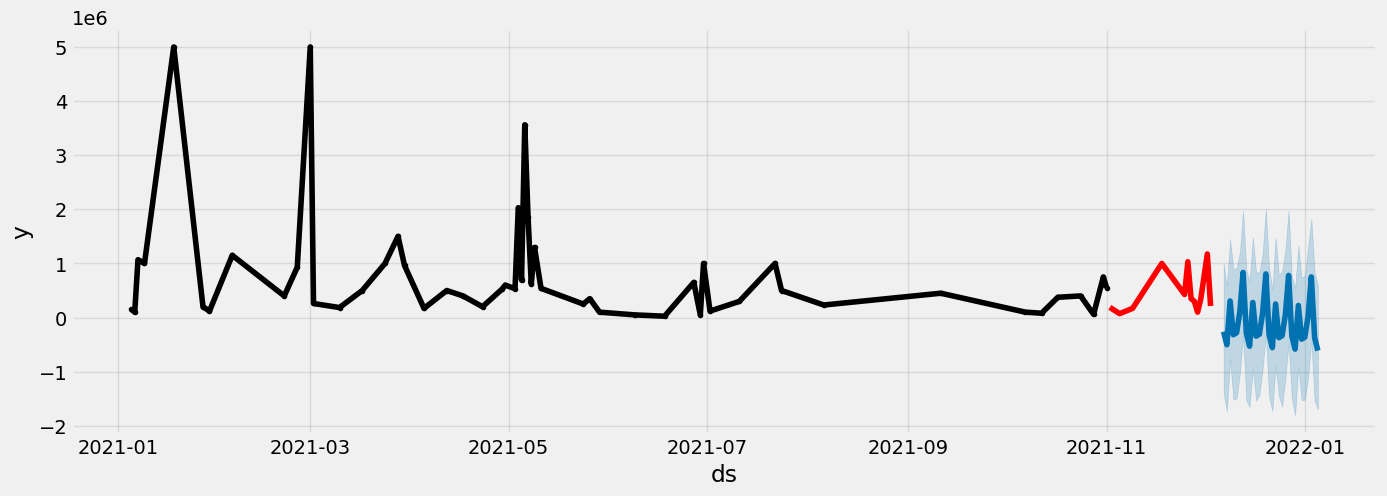

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(donation2_train['ds'], donation2_train['y'], color='black')
ax.plot(donation2_test['ds'], donation2_test['y'], color='r')
fig = model2.plot(donation2_after_last_day,
                 ax=ax)
plt.show()

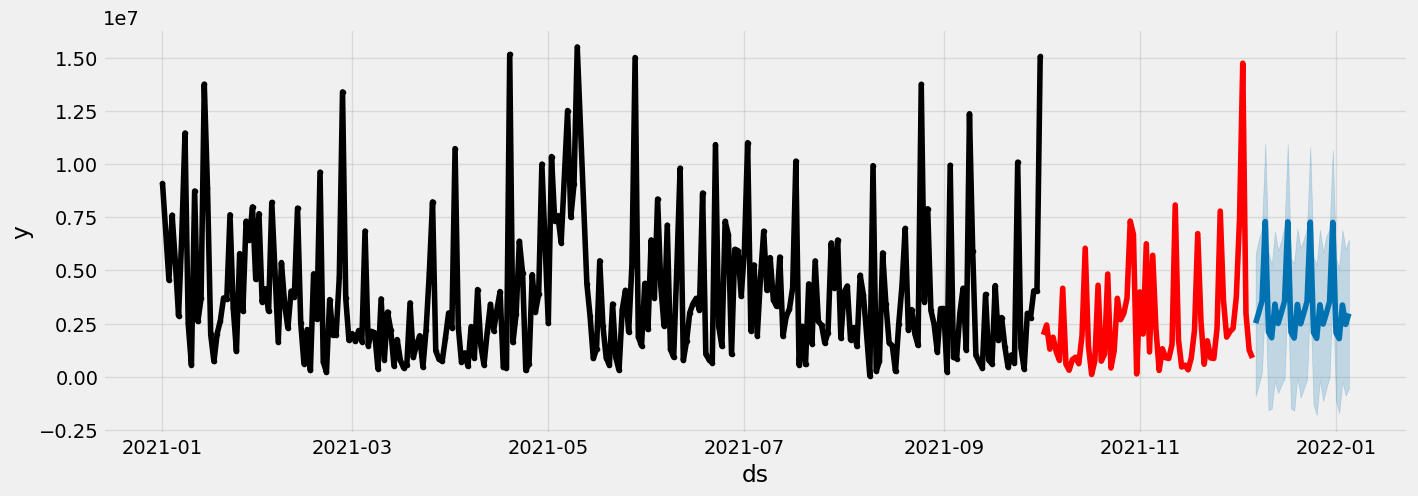

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(donation3_train['ds'], donation3_train['y'], color='black')
ax.plot(donation3_test['ds'], donation3_test['y'], color='r')
fig = model3.plot(donation3_after_last_day,
                 ax=ax)
plt.show()

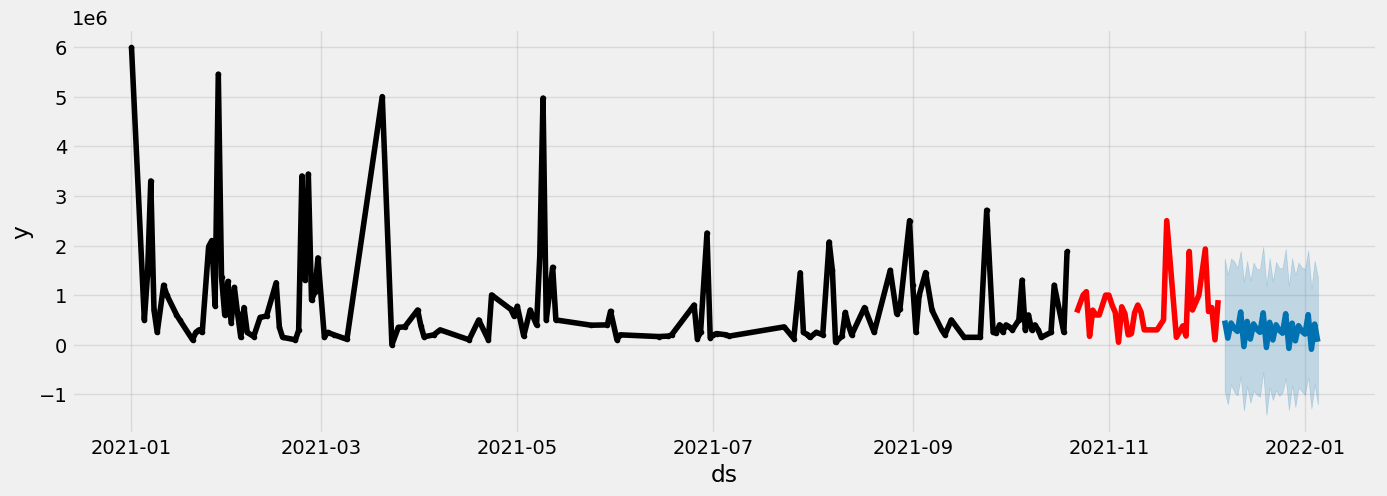

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(donation4_train['ds'], donation4_train['y'], color='black')
ax.plot(donation4_test['ds'], donation4_test['y'], color='r')
fig = model4.plot(donation4_after_last_day,
                 ax=ax)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [ ]:
donation1_test

ds         y
0  2021-09-16  345000.0
1  2021-09-18   25000.0
2  2021-09-19  120000.0
3  2021-09-21  300000.0
4  2021-09-22  520000.0
5  2021-10-03  380503.0
6  2021-10-05  520235.0
7  2021-10-10  300000.0
8  2021-10-14  600000.0
9  2021-10-16  170000.0
10 2021-10-17  550000.0
11 2021-10-18  850045.0
12 2021-10-19  245000.0
13 2021-10-23  480000.0
14 2021-10-24  300000.0
15 2021-10-27  500000.0
16 2021-10-28  950000.0
17 2021-10-30  900752.0
18 2021-11-01  420000.0
19 2021-11-03  750000.0
20 2021-11-06  840000.0
21 2021-11-08  970000.0
22 2021-11-11  595700.0
23 2021-11-20  585000.0
24 2021-11-21  873000.0
25 2021-11-24  450964.0
26 2021-12-06  150000.0

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    """Calculates MAPE given y_true and y_pred"""

    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mse_li = []
for idx in range (4):
    number = idx+1
    nilai_mse = mean_squared_error(y_true=globals()['donation%s' % number+'_test']['y'],
                   y_pred=globals()['donation%s' % number+'_test_fcst']['yhat'])
    mse_li.append(nilai_mse)
    print("{}, MSE = {}".format(list_of_name[idx], nilai_mse))

print("Total rata rata MSE dari 4 Model {}".format(sum(mse_li)/len(mse_li)))

Guest Donasi, MSE = 91095048588.63104
Guest Zakat, MSE = 382526634709.094
Users Donasi, MSE = 4175713852352.3125
Users Zakat, MSE = 451981064187.76013
Total rata rata MSE dari 4 Model 1275329149959.4492


In [ ]:
mape_li = []
for idx in range(4):
    number = idx+1
    nilai_mape = mean_absolute_percentage_error(y_true=globals()['donation%s' % number+'_test']['y'],
                   y_pred=globals()['donation%s' % number+'_test_fcst']['yhat'])
    mape_li.append(nilai_mape)
    print("{}, MAPE = {}".format(list_of_name[idx], nilai_mape))

print("Total rata rata MAPE dari 4 Model {}".format(sum(mape_li)/len(mape_li)))

Guest Donasi, MAPE = 105.4092203838517
Guest Zakat, MAPE = 198.26728805023797
Users Donasi, MAPE = 186.36848885705845
Users Zakat, MAPE = 98.60502429732726
Total rata rata MAPE dari 4 Model 147.16250539711885
